# Indian Road Accidents Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import csv
import os
from collections import defaultdict
import math as m



**1.df = roadAccStats13-16.csv**

In [3]:
df=pd.read_csv(r"C:\Users\Prathamesh\Downloads\Databases-20231228T062726Z-001\Databases\roadAccStats13-16.csv")

In [4]:
pip install xlrd>=2.0.1


Note: you may need to restart the kernel to use updated packages.


In [5]:
df.head()

SI. No.         States/UTs  \
0       1     Andhra Pradesh   
1       2  Arunachal Pradesh   
2       3              Assam   
3       4              Bihar   
4       5       Chhattisgarh   

   State/UT-Wise Total Number of Road Accidents during - 2013  \
0                                            43482.0            
1                                              308.0            
2                                             7211.0            
3                                            10200.0            
4                                            13657.0            

   State/UT-Wise Total Number of Road Accidents during - 2014  \
0                                              24440            
1                                                205            
2                                               7144            
3                                               9556            
4                                              13821            

   State/UT-Wise Total Number of Road Accidents during - 2015  \
0                                              24258            
1                                                284            
2                                               6959            
3                                               9555            
4                                              14446            

   State/UT-Wise Total Number of Road Accidents during - 2016  \
0                                              24888            
1                                                249            
2                                               7435            
3                                               8222            
4                                              13580            

   Share of States/UTs in Total Number of Road Accidents - 2013  \
0                                                8.9              
1                                                0.1              
2                                                1.5              
3                                                2.1              
4                                                2.8              

   Share of States/UTs in Total Number of Road Accidents - 2014  \
0                                                5.0              
1                                                0.0              
2                                                1.5              
3                                                2.0              
4                                                2.8              

   Share of States/UTs in Total Number of Road Accidents - 2015  \
0                                                4.8              
1                                                0.1              
2                                                1.4              
3                                                1.9              
4                                                2.9              

   Share of States/UTs in Total Number of Road Accidents - 2016  \
0                                                5.2              
1                                                0.1              
2                                                1.5              
3                                                1.7              
4                                                2.8              

   Total Number of Accidents Per Lakh Population - 2013  \
0                                               50.4      
1                                               24.3      
2                                               23.0      
3                                               10.2      
4                                               54.8      

   Total Number of Accidents Per Lakh Population - 2014  \
0                                               28.1      
1                                               16.0      
2                                               22.5      
3                                         

In [6]:
df.shape

(37, 20)

In [7]:
df.dtypes

SI. No.                                                          object
States/UTs                                                       object
State/UT-Wise Total Number of Road Accidents during - 2013      float64
State/UT-Wise Total Number of Road Accidents during - 2014        int64
State/UT-Wise Total Number of Road Accidents during - 2015        int64
State/UT-Wise Total Number of Road Accidents during - 2016        int64
Share of States/UTs in Total Number of Road Accidents - 2013    float64
Share of States/UTs in Total Number of Road Accidents - 2014    float64
Share of States/UTs in Total Number of Road Accidents - 2015    float64
Share of States/UTs in Total Number of Road Accidents - 2016    float64
Total Number of Accidents Per Lakh Population - 2013            float64
Total Number of Accidents Per Lakh Population - 2014            float64
Total Number of Accidents Per Lakh Population - 2015            float64
Total Number of Accidents Per Lakh Population - 2016            

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   SI. No.                                                       37 non-null     object 
 1   States/UTs                                                    37 non-null     object 
 2   State/UT-Wise Total Number of Road Accidents during - 2013    36 non-null     float64
 3   State/UT-Wise Total Number of Road Accidents during - 2014    37 non-null     int64  
 4   State/UT-Wise Total Number of Road Accidents during - 2015    37 non-null     int64  
 5   State/UT-Wise Total Number of Road Accidents during - 2016    37 non-null     int64  
 6   Share of States/UTs in Total Number of Road Accidents - 2013  37 non-null     float64
 7   Share of States/UTs in Total Number of Road Accidents - 2014  37 non-null

# Calculating the Usefulness of colums.

In [9]:
row, column = df.shape

In [10]:
round(((row - df.isnull().sum())/row) * 100,2)

SI. No.                                                         100.0
States/UTs                                                      100.0
State/UT-Wise Total Number of Road Accidents during - 2013       97.3
State/UT-Wise Total Number of Road Accidents during - 2014      100.0
State/UT-Wise Total Number of Road Accidents during - 2015      100.0
State/UT-Wise Total Number of Road Accidents during - 2016      100.0
Share of States/UTs in Total Number of Road Accidents - 2013    100.0
Share of States/UTs in Total Number of Road Accidents - 2014    100.0
Share of States/UTs in Total Number of Road Accidents - 2015    100.0
Share of States/UTs in Total Number of Road Accidents - 2016    100.0
Total Number of Accidents Per Lakh Population - 2013             97.3
Total Number of Accidents Per Lakh Population - 2014             97.3
Total Number of Accidents Per Lakh Population - 2015             97.3
Total Number of Accidents Per Lakh Population - 2016             97.3
Total Number of Road

In [11]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
dtype: bool

#Check for repeatition of values.

In [12]:
df['States/UTs'].value_counts()

States/UTs
Andhra Pradesh               1
Odisha                       1
Rajasthan                    1
Sikkim                       1
Tamil Nadu                   1
Telangana                    1
Tripura                      1
Uttarakhand                  1
Uttar Pradesh                1
West Bengal                  1
Andaman & Nicobar Islands    1
Chandigarh                   1
Dadra & Nagar Haveli         1
Daman & Diu                  1
Delhi                        1
Lakshadweep                  1
Puducherry                   1
Punjab                       1
Nagaland                     1
Arunachal Pradesh            1
Mizoram                      1
Assam                        1
Bihar                        1
Chhattisgarh                 1
Goa                          1
Gujarat                      1
Haryana                      1
Himachal Pradesh             1
Jammu & Kashmir              1
Jharkhand                    1
Karnataka                    1
Kerala                      

# No repeatition present.

#------------------------------------------------------------------------------------------------------#

# df1 dataset shows vehicle types involved in accidents around the country.
**df1 = Details_of_road_accident_deaths_by_situation_state_2014.csv**

In [13]:
df1 = pd.read_csv(r"C:\Users\Prathamesh\Downloads\Databases-20231228T062726Z-001\Databases\Details_of_road_accident_deaths_by_situation_state_2014.csv")

In [14]:
df1.head()

States/UTs  Year                                 CrimeHead  \
0  Andhra Pradesh  2014                       Truck/Lorry (Total)   
1  Andhra Pradesh  2014       Truck/Lorry - Normal Goods Carriers   
2  Andhra Pradesh  2014  Truck/Lorry - Trailer/Container Carriers   
3  Andhra Pradesh  2014                     Truck/Lorry - Tankers   
4  Andhra Pradesh  2014                      Truck/Lorry - Others   

   Offenders (Driver/Pedestrian) Died_Male  \
0                                      445   
1                                      357   
2                                       12   
3                                       10   
4                                       66   

   Offenders (Driver/Pedestrian) Died_Female  \
0                                         30   
1                                         25   
2                                          0   
3                                          0   
4                                          5   

   Offenders (Driver/Pedestrian) Died_Transgender  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Offenders (Driver/Pedestrian) Died_Total  Victims Died_Male  \
0                                       475                871   
1                                       382                577   
2                                        12                 25   
3                                        10                102   
4                                        71                167   

   Victims Died_Female  Victims Died_Transgender  Victims Died_Total  
0                  135                         0                1006  
1                  101                         0                 678  
2                    0                         0                  25  
3                   15                         0                 117  
4                   19                         0                 186

In [96]:
df1['CrimeHead'].unique()


array(['Truck/Lorry (Total)', 'Truck/Lorry - Normal Goods Carriers',
       'Truck/Lorry - Trailer/Container Carriers',
       'Truck/Lorry - Tankers', 'Truck/Lorry - Others', 'Bus (Total)',
       'Bus - Government', 'Bus - Private', 'Bus - School Bus',
       'SUV (7 & 8 Seater)/Station Wagon/etc. (Total)',
       'SUV (7 & 8 Seater)/Station Wagon/etc. - Government',
       'SUV (7 & 8 Seater)/Station Wagon/etc. - Private',
       'SUV (7 & 8 Seater)/Station Wagon/etc. - Taxi',
       'Car (4 & 5 Seater) (Total)', 'Car (4 & 5 Seater) - Government',
       'Car (4 & 5 Seater) - Private', 'Car (4 & 5 Seater) - Taxi',
       'Jeep (Total)', 'Jeep - Government', 'Jeep - Private',
       'Tractor (Total)', 'Three Wheeler/Auto rickshaw (Total)',
       'Three Wheeler/Auto rickshaw - Passenger Carriers',
       'Three Wheeler/Auto rickshaw - Goods Carriers',
       'Two Wheeler (Total)', 'Two Wheeler - Motor Cycle',
       'Two Wheeler - Scooter', 'Two Wheeler - Others',
       'Other Motor

In [97]:
df1['CrimeHead'].nunique()

37

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443 entries, 0 to 1442
Data columns (total 11 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   States/UTs                                      1443 non-null   object
 1   Year                                            1443 non-null   int64 
 2   CrimeHead                                       1443 non-null   object
 3   Offenders (Driver/Pedestrian) Died_Male         1443 non-null   int64 
 4   Offenders (Driver/Pedestrian) Died_Female       1443 non-null   int64 
 5   Offenders (Driver/Pedestrian) Died_Transgender  1443 non-null   int64 
 6   Offenders (Driver/Pedestrian) Died_Total        1443 non-null   int64 
 7   Victims Died_Male                               1443 non-null   int64 
 8   Victims Died_Female                             1443 non-null   int64 
 9   Victims Died_Transgender                        1443

In [17]:
df1.shape

(1443, 11)

In [18]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

In [19]:
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1438    False
1439    False
1440    False
1441    False
1442    False
Length: 1443, dtype: bool

Calculating the Usefulness of colums.

In [20]:
round(((row - df1.isnull().sum())/row) * 100, 2)

States/UTs                                        100.0
Year                                              100.0
CrimeHead                                         100.0
Offenders (Driver/Pedestrian) Died_Male           100.0
Offenders (Driver/Pedestrian) Died_Female         100.0
Offenders (Driver/Pedestrian) Died_Transgender    100.0
Offenders (Driver/Pedestrian) Died_Total          100.0
Victims Died_Male                                 100.0
Victims Died_Female                               100.0
Victims Died_Transgender                          100.0
Victims Died_Total                                100.0
dtype: float64

# The percentage of road accidents during all the years.

# DF - 
This dataset is about **Number of accidents** per state, accidents sharing multiple states and TOTAL number of accidents overall 
per year per state.
### 1. Calculating the Percentage of State wise Total number of Road Accidents.

In [21]:
sum2013=df["State/UT-Wise Total Number of Road Accidents during - 2013"].sum()
print('Total Number of Accidents Happened in all states in year 2013 : ', sum2013)

Total Number of Accidents Happened in all states in year 2013 :  972952.0


In [22]:
sum2014 = df['State/UT-Wise Total Number of Road Accidents during - 2014'].sum()
print('Total Number of Accidents Happened in all states in year 2014 : ', sum2014)

Total Number of Accidents Happened in all states in year 2014 :  978800


In [23]:
sum2015 = df['State/UT-Wise Total Number of Road Accidents during - 2015'].sum()
print('Total Number of Accidents Happened in all states in year 2014 : ', sum2015)

Total Number of Accidents Happened in all states in year 2014 :  1002846


In [24]:
sum2016 = df['State/UT-Wise Total Number of Road Accidents during - 2016'].sum()
print('Total Number of Accidents Happened in all states in year 2014 : ', sum2016)

Total Number of Accidents Happened in all states in year 2014 :  961304


In [25]:
total_accidents_2013_16 = (sum2013 + sum2014 + sum2015 + sum2016 )
print(total_accidents_2013_16)

3915902.0


 ## After getting total of all year accidents now finding the percentage of each year accidents

In [26]:
per2013 = (sum2013/total_accidents_2013_16) * 100
print("Percentage of accidents happened in all states in year 2013: {}".format(per2013))

Percentage of accidents happened in all states in year 2013: 24.846178479441008


In [27]:
per2014 = (sum2014/total_accidents_2013_16) * 100
print("Percentage of accidents happened in all states in year 2014: {}".format(per2014))

Percentage of accidents happened in all states in year 2014: 24.995518273950676


In [28]:
per2015 = (sum2015/total_accidents_2013_16) * 100
print("Percentage of accidents happened in all states in year 2015: {}".format(per2015))

Percentage of accidents happened in all states in year 2015: 25.60957858495948


In [29]:
per2016 = (sum2016/total_accidents_2013_16) * 100
print("Percentage of accidents happened in all states in year 2016: {}".format(per2016))

Percentage of accidents happened in all states in year 2016: 24.548724661648833


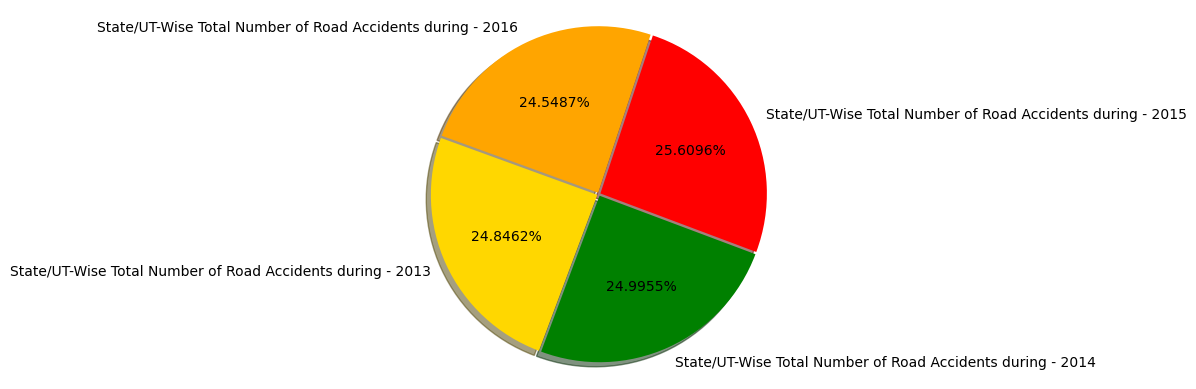

In [30]:
labels = 'State/UT-Wise Total Number of Road Accidents during - 2013', 'State/UT-Wise Total Number of Road Accidents during - 2014', 'State/UT-Wise Total Number of Road Accidents during - 2015', 'State/UT-Wise Total Number of Road Accidents during - 2016'
sizes = [per2013, per2014, per2015, per2016]
colors = ['gold', 'green', 'red', 'orange']
explode = (0.01, 0.01, 0.01, 0.01)
plt.pie(sizes, labels = labels, colors = colors, explode = explode,
       shadow = True, autopct = '%.4f%%', startangle = 160)
plt.axis('equal')
plt.show()

It is clearly visible that, the percentage of road accidents are **almost constant during all years.**
It indicates that the government is making less efforts to prevent accidents by creating wider, good quality roads or creating new safety rules.

## 2. Calculating mean of total number of accidents per lakh population over the years

In [31]:
yr13 = np.mean(df['Total Number of Accidents Per Lakh Population - 2013'])
print("Mean of accidents per lakh population in 2013 : {}".format(yr13))

Mean of accidents per lakh population in 2013 : 41.91111111111111


In [32]:
yr14 = np.mean(df['Total Number of Accidents Per Lakh Population - 2014'])
print("Mean of accidents per lakh population in 2013 : {}".format(yr14))

Mean of accidents per lakh population in 2013 : 39.87777777777777


In [33]:
yr15 = np.mean(df['Total Number of Accidents Per Lakh Population - 2015'])
print("Mean of accidents per lakh population in 2013 : {}".format(yr15))

Mean of accidents per lakh population in 2013 : 40.83333333333332


In [34]:
yr16 = np.mean(df['Total Number of Accidents Per Lakh Population - 2016'])
print("Mean of accidents per lakh population in 2013 : {}".format(yr16))

Mean of accidents per lakh population in 2013 : 39.63611111111111


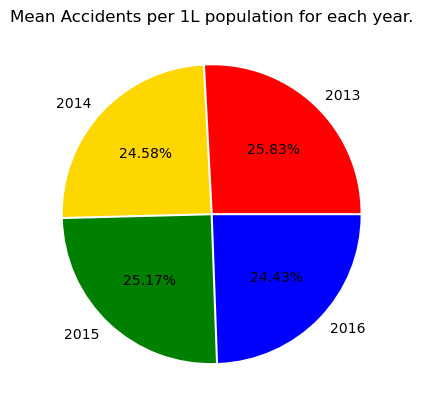

In [35]:
labels = ('2013','2014','2015','2016')
explode = (0.01,0.01,0.01,0.01)
performance = [yr13, yr14, yr15, yr16]
colors = ['red','gold','green','blue']
plt.pie(performance, labels = labels, colors  = colors ,  autopct = '%.2f%%', center = (0,0), explode = explode )
plt.title("Mean Accidents per 1L population for each year.")
plt.show()

3. The highest number of accident states and least number of accident states.

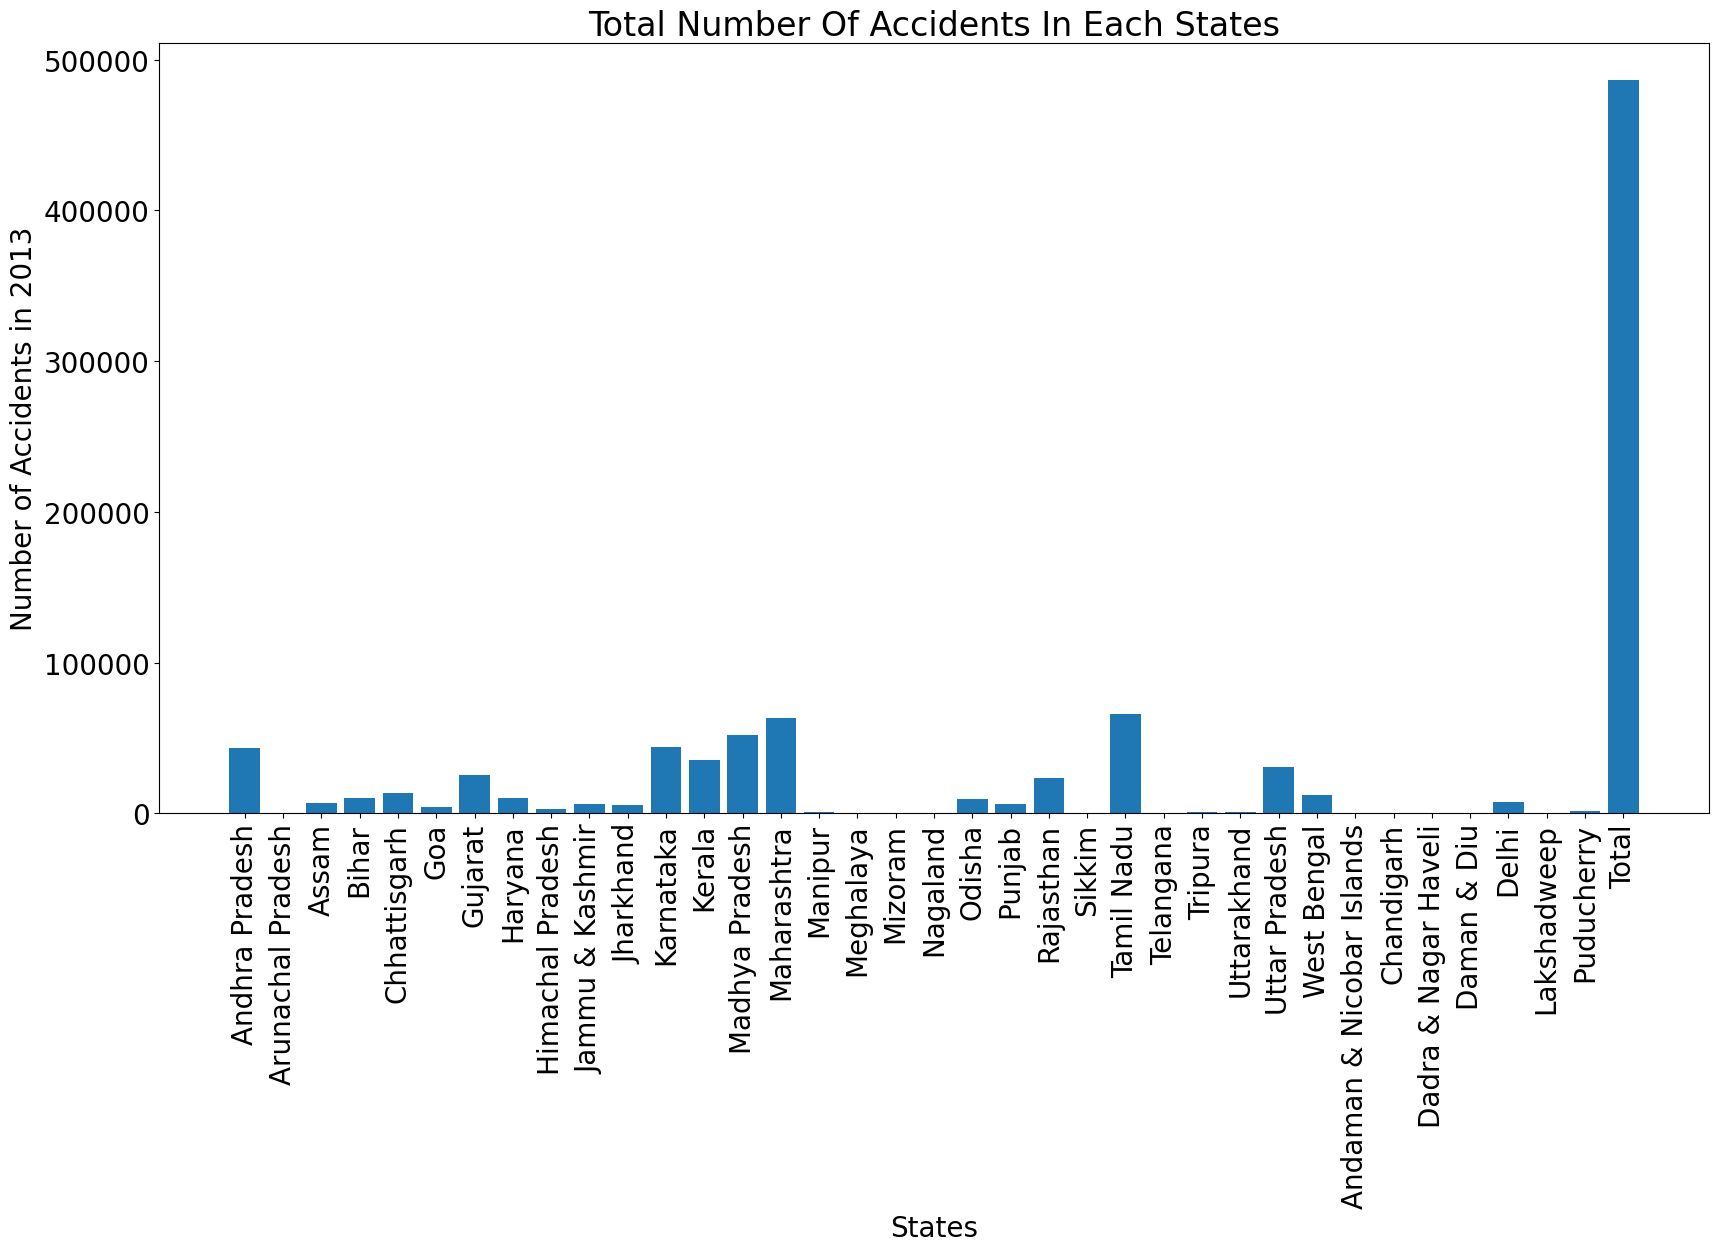

In [36]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size':20})   # rcParams use for font size, fig size etc
y = df['State/UT-Wise Total Number of Road Accidents during - 2013']
yd = df['States/UTs']
p = df['States/UTs'].nunique()
d = np.linspace(1,p,p)  # refer the notes at the end of bar chart
plt.bar(d,y, align = 'center')
plt.xticks(d, yd, rotation = 90)
plt.xlabel('States')
plt.ylabel('Number of Accidents in 2013')
plt.title('Total Number Of Accidents In Each States')
plt.show()

**Maharashtra** and **Tamil Nadu** have the highest number of accidents. Further investigation needs to be done to understand the case. **Arunachal, Manipur, Meghalaya, Mizoram, Nagaland, Tripura** have the least number of accidents. They surprisingly all belong to the **north-eastern area.**

**linspace()**
y = linspace(x1,x2,n) generates n points. The spacing between the points is (x2-x1)/(n-1).

linspace is similar to the colon operator, “:”, but gives direct control over the number of points and always includes the endpoints. “lin” in the name “linspace” refers to generating linearly spaced values as opposed to the sibling function logspace, which generates logarithmically spaced values.

In [37]:
min13 = np.min(df['Total Number of Accidents Per Lakh Population - 2013'])
max13 = np.max(df['Total Number of Accidents Per Lakh Population - 2013'])

In [38]:
min14 = np.min(df['Total Number of Accidents Per Lakh Population - 2014'])
max14 = np.max(df['Total Number of Accidents Per Lakh Population - 2014'])

In [39]:
min15 = np.min(df['Total Number of Accidents Per Lakh Population - 2015'])
max15 = np.max(df['Total Number of Accidents Per Lakh Population - 2015'])

In [40]:
min16 = np.min(df['Total Number of Accidents Per Lakh Population - 2016'])
max16 = np.max(df['Total Number of Accidents Per Lakh Population - 2016'])

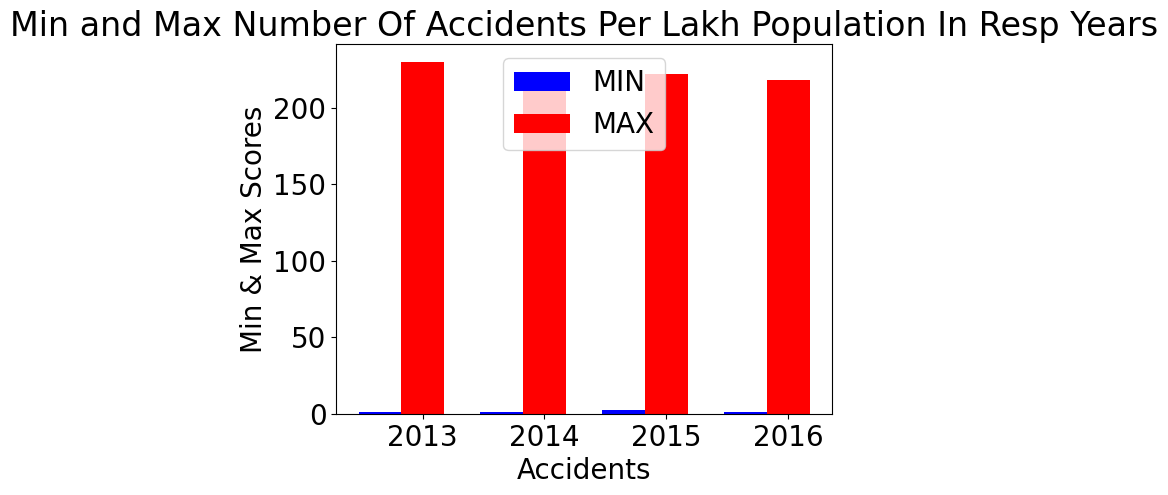

In [41]:
n = 4 
minx = (min13,min14,min15,min16)
maxx = (max13,max14,max15,max16)
index = np.arange(n)
bar_width = 0.35

r1 = plt.bar(index, minx, bar_width, align = 'center', color = 'blue', label = 'MIN')
r2 = plt.bar(index + bar_width, maxx, bar_width, align = 'center', color = 'red', label = 'MAX')

plt.xlabel('Accidents')
plt.ylabel('Min & Max Scores')
plt.title('Min and Max Number Of Accidents Per Lakh Population In Resp Years')
plt.xticks(index + bar_width ,('2013','2014','2015','2016')) # xticks use for showing xlabels data in vertically
plt.legend(loc = 'upper center')
plt.show()

**DF1 :
This dataset shows the number of offenders and victims who died according to gender as well the as the total deaths.**

In [42]:
df1.head(5)

States/UTs  Year                                 CrimeHead  \
0  Andhra Pradesh  2014                       Truck/Lorry (Total)   
1  Andhra Pradesh  2014       Truck/Lorry - Normal Goods Carriers   
2  Andhra Pradesh  2014  Truck/Lorry - Trailer/Container Carriers   
3  Andhra Pradesh  2014                     Truck/Lorry - Tankers   
4  Andhra Pradesh  2014                      Truck/Lorry - Others   

   Offenders (Driver/Pedestrian) Died_Male  \
0                                      445   
1                                      357   
2                                       12   
3                                       10   
4                                       66   

   Offenders (Driver/Pedestrian) Died_Female  \
0                                         30   
1                                         25   
2                                          0   
3                                          0   
4                                          5   

   Offenders (Driver/Pedestrian) Died_Transgender  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Offenders (Driver/Pedestrian) Died_Total  Victims Died_Male  \
0                                       475                871   
1                                       382                577   
2                                        12                 25   
3                                        10                102   
4                                        71                167   

   Victims Died_Female  Victims Died_Transgender  Victims Died_Total  
0                  135                         0                1006  
1                  101                         0                 678  
2                    0                         0                  25  
3                   15                         0                 117  
4                   19                         0                 186

In [43]:
df1.dtypes

States/UTs                                        object
Year                                               int64
CrimeHead                                         object
Offenders (Driver/Pedestrian) Died_Male            int64
Offenders (Driver/Pedestrian) Died_Female          int64
Offenders (Driver/Pedestrian) Died_Transgender     int64
Offenders (Driver/Pedestrian) Died_Total           int64
Victims Died_Male                                  int64
Victims Died_Female                                int64
Victims Died_Transgender                           int64
Victims Died_Total                                 int64
dtype: object

Offenders and victims who died according to gender as well the as the total deaths

In [44]:
meanoffmale = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Male']))

In [45]:
meanofffemale = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Female']))

In [46]:
meanoftrans = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Transgender']))
print(meanoffmale, meanofffemale, meanoftrans)

251.59251559251558 21.717255717255718 0.0


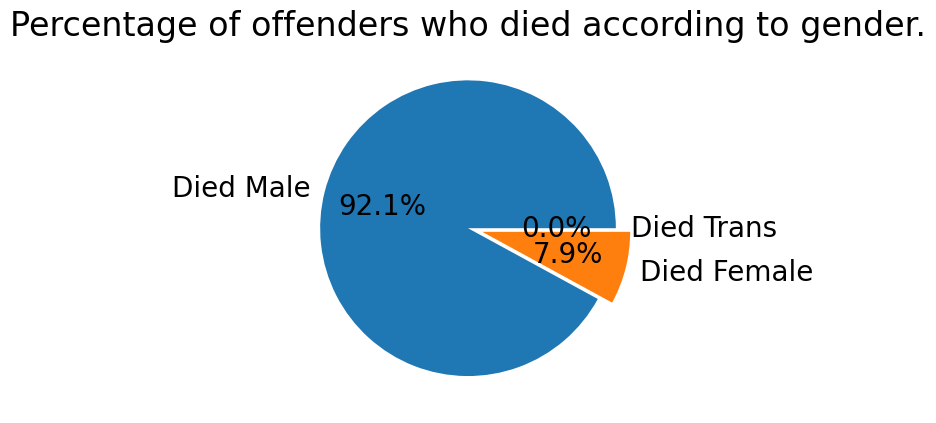

In [47]:
sizes = [meanoffmale, meanofffemale, meanoftrans]
labels = ['Died Male', 'Died Female', 'Died Trans']
explode = (0, 0.1, 0)
plt.pie(sizes, labels = labels, explode = explode, autopct = '%.1f%%')
plt.title('Percentage of offenders who died according to gender.')
plt.show()

**Victims who died according to gender.**

In [48]:
meanvictmale = (np.mean(df1['Victims Died_Male']))

In [49]:
meanvictfemale = (np.mean(df1['Victims Died_Female']))

In [50]:
meanvicttrans = (np.mean(df1['Victims Died_Transgender']))
print(meanvictmale, meanvictfemale, meanvicttrans)

705.8731808731809 138.59667359667358 0.13513513513513514


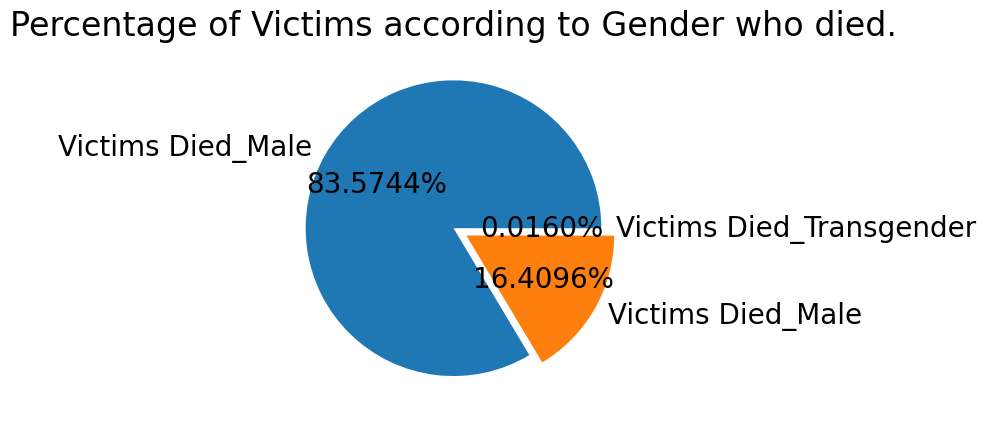

In [51]:
sizes = [meanvictmale,meanvictfemale,meanvicttrans]
labels = ['Victims Died_Male', 'Victims Died_Male', 'Victims Died_Transgender']
explode = (0,0.1,0)
plt.pie(sizes, labels = labels, explode = explode ,autopct = '%.4f%%')
plt.title('Percentage of Victims according to Gender who died.')
plt.show()

In [52]:
meanofftotal = (np.mean(df1['Offenders (Driver/Pedestrian) Died_Total']))
meanVicttotal = (np.mean(df1['Victims Died_Total']))
print(meanofftotal,meanVicttotal)

273.3097713097713 844.6049896049896


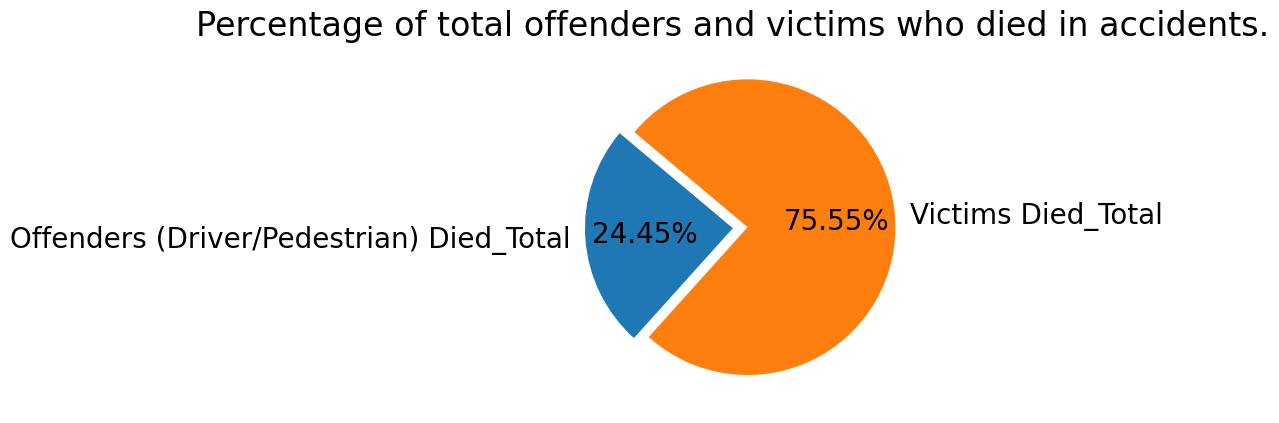

In [53]:
labels = 'Offenders (Driver/Pedestrian) Died_Total','Victims Died_Total'
sizes = [meanofftotal,meanVicttotal]
explode = (0,0.1)
plt.title('Percentage of total offenders and victims who died in accidents.')
plt.pie(sizes, labels = labels, explode = explode,autopct = '%.2f%%', startangle = 140)
plt.show()

# DF2 -
**This dataset is about the deaths that occured due to the ignorance for safety accessories like Helmets, Belts per gender.**
**df2 = Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv**

In [54]:
df2 = pd.read_csv(r"C:\Users\Prathamesh\Downloads\Databases-20231228T062726Z-001\Databases\Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv")

In [55]:
df2.head(5)

S. No.          State/ UT  Non-wearing of Helmet - Male  \
0      1     Andhra Pradesh                           459   
1      2  Arunachal Pradesh                            10   
2      3              Assam                             0   
3      4              Bihar                             0   
4      5       Chhattisgarh                            89   

   Non-wearing of Helmet - Female  Non-wearing of Helmet - Total  \
0                              18                            477   
1                               4                             14   
2                               0                              0   
3                               0                              0   
4                               7                             96   

   Non-wearing of seat belt - Male  Non-wearing of seat belt - Female  \
0                              222                                 15   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                6                                  0   

   Non-wearing of seat belt - Total  
0                               237  
1                                 0  
2                                 0  
3                                 0  
4                                 6

**Percentage of Deaths occurring due to non-wearing of helmets between male and female.**

In [56]:
helmetMale = (np.mean(df2['Non-wearing of Helmet - Male']))
helmetFemale =(np.mean(df2['Non-wearing of Helmet - Female']))
print(helmetMale,helmetFemale)

465.72972972972974 82.10810810810811


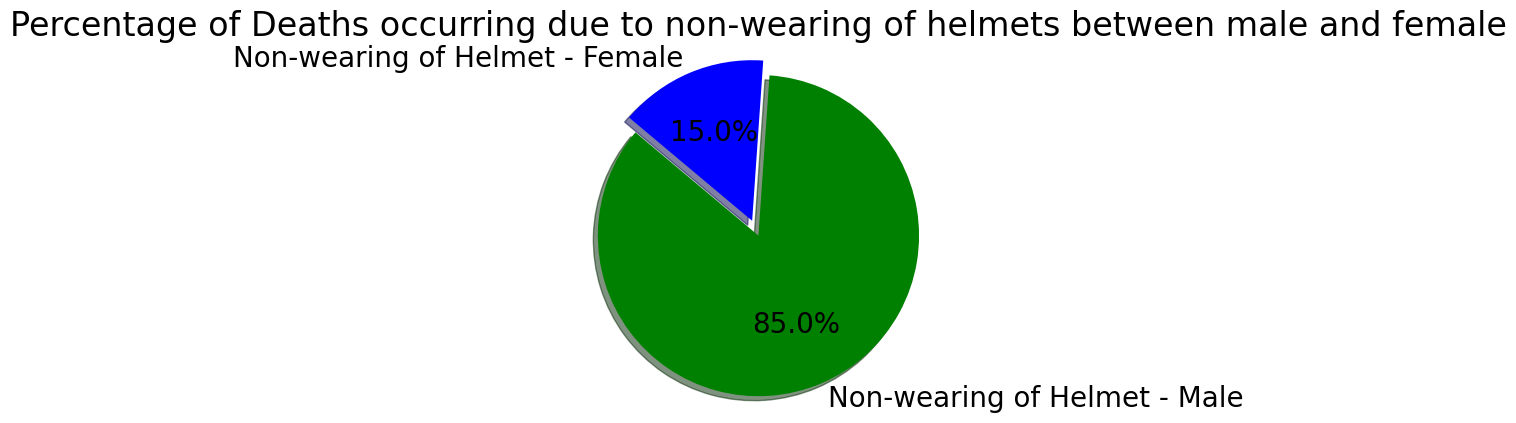

In [57]:
labels  = 'Non-wearing of Helmet - Male','Non-wearing of Helmet - Female'
sizes = [helmetMale,helmetFemale]
colors = ['green','blue']
explode = (0.1,0) # its use for slicing the pie chart
plt.pie(sizes, labels = labels, colors = colors, explode = explode, autopct = "%1.1f%%", shadow = True , startangle = 140)
plt.title('Percentage of Deaths occurring due to non-wearing of helmets between male and female')
plt.axis('equal')
plt.show()

In [58]:
max1 = df2['Non-wearing of Helmet - Total'].max()
max2 = df2['Non-wearing of seat belt - Total'].max()
print('Non-wearing of Helmet - Total - ',max1)
print('Non-wearing of seat belt - Total - ',max2)

Non-wearing of Helmet - Total -  10135
Non-wearing of seat belt - Total -  5638


# DF3
**This data set shows the number of accidents happening per state from the year 2003 to 2016**

**df3 = datafile.xls - total number of accidents from 2003 to 16 per state**

In [59]:
df3 = pd.read_excel(r"C:\Users\Prathamesh\Downloads\Databases-20231228T062726Z-001\Databases\accidents03-16.xls")

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [60]:
df3.head(5)

States/Uts    2003    2004    2005     2006     2007     2008  \
0     Andhra Pradesh  8616.0  9343.0  9126.0  11378.0  11885.0  12233.0   
1  Arunachal Pradesh    65.0    79.0    63.0     87.0     81.0     90.0   
2              Assam  1120.0  1177.0  1420.0   1627.0   1483.0   1641.0   
3              Bihar  2138.0  1579.0  1462.0   2315.0   3074.0   3514.0   
4       Chhattisgarh  1788.0  1892.0  2049.0   2288.0   2496.0   2600.0   

      2009     2010     2011     2012     2013  2014  2015  2016  
0  12676.0  13932.0  13783.0  13560.0  13175.0  7277  7524  7851  
1    114.0    108.0     96.0     94.0    120.0    92   117   103  
2   1735.0   1924.0   2015.0   2011.0   2162.0  2169  2122  2445  
3   4038.0   4513.0   4676.0   4706.0   4612.0  4505  4771  4425  
4   2566.0   2668.0   2659.0   2783.0   3059.0  3570  3710  3527

In [61]:
df3['States/Uts']

0                Andhra Pradesh
1             Arunachal Pradesh
2                         Assam
3                         Bihar
4                  Chhattisgarh
5                           Goa
6                       Gujarat
7                       Haryana
8              Himachal Pradesh
9               Jammu & Kashmir
10                    Jharkhand
11                    Karnataka
12                       Kerala
13               Madhya Pradesh
14                  Maharashtra
15                      Manipur
16                    Meghalaya
17                      Mizoram
18                     Nagaland
19                       Odisha
20                       Punjab
21                    Rajasthan
22                       Sikkim
23                   Tamil Nadu
24                    Telangana
25                      Tripura
26                  Uttarakhand
27                Uttar Pradesh
28                  West Bengal
29    Andaman & Nicobar Islands
30                   Chandigarh
31      

**The number of accidents happening per state from the year 2003 to 2016**

In [62]:
df8 = pd.DataFrame(columns = ['Year','Count'])
print(df8)

Empty DataFrame
Columns: [Year, Count]
Index: []


In [63]:
df8['Year'] = df3[df3['States/Uts'] == 'All India'].columns[1:]
print(df8['Year'])

0     2003
1     2004
2     2005
3     2006
4     2007
5     2008
6     2009
7     2010
8     2011
9     2012
10    2013
11    2014
12    2015
13    2016
Name: Year, dtype: object


In [64]:
df8 = df3[df3['States/Uts'] == 'All India']
df9 = df8.T
print(df9)

                   36
States/Uts  All India
2003          73589.0
2004          79357.0
2005          83491.0
2006          93917.0
2007         101161.0
2008         106591.0
2009         110993.0
2010         119558.0
2011         121618.0
2012         123093.0
2013         122589.0
2014           125828
2015           131726
2016           136071


In [65]:
df9.to_csv(r"C:\Users\Prathamesh\Downloads\Databases-20231228T062726Z-001\Databases\accidentRate.csv")
df9

36
States/Uts  All India
2003          73589.0
2004          79357.0
2005          83491.0
2006          93917.0
2007         101161.0
2008         106591.0
2009         110993.0
2010         119558.0
2011         121618.0
2012         123093.0
2013         122589.0
2014           125828
2015           131726
2016           136071

<Figure size 2000x1000 with 0 Axes>

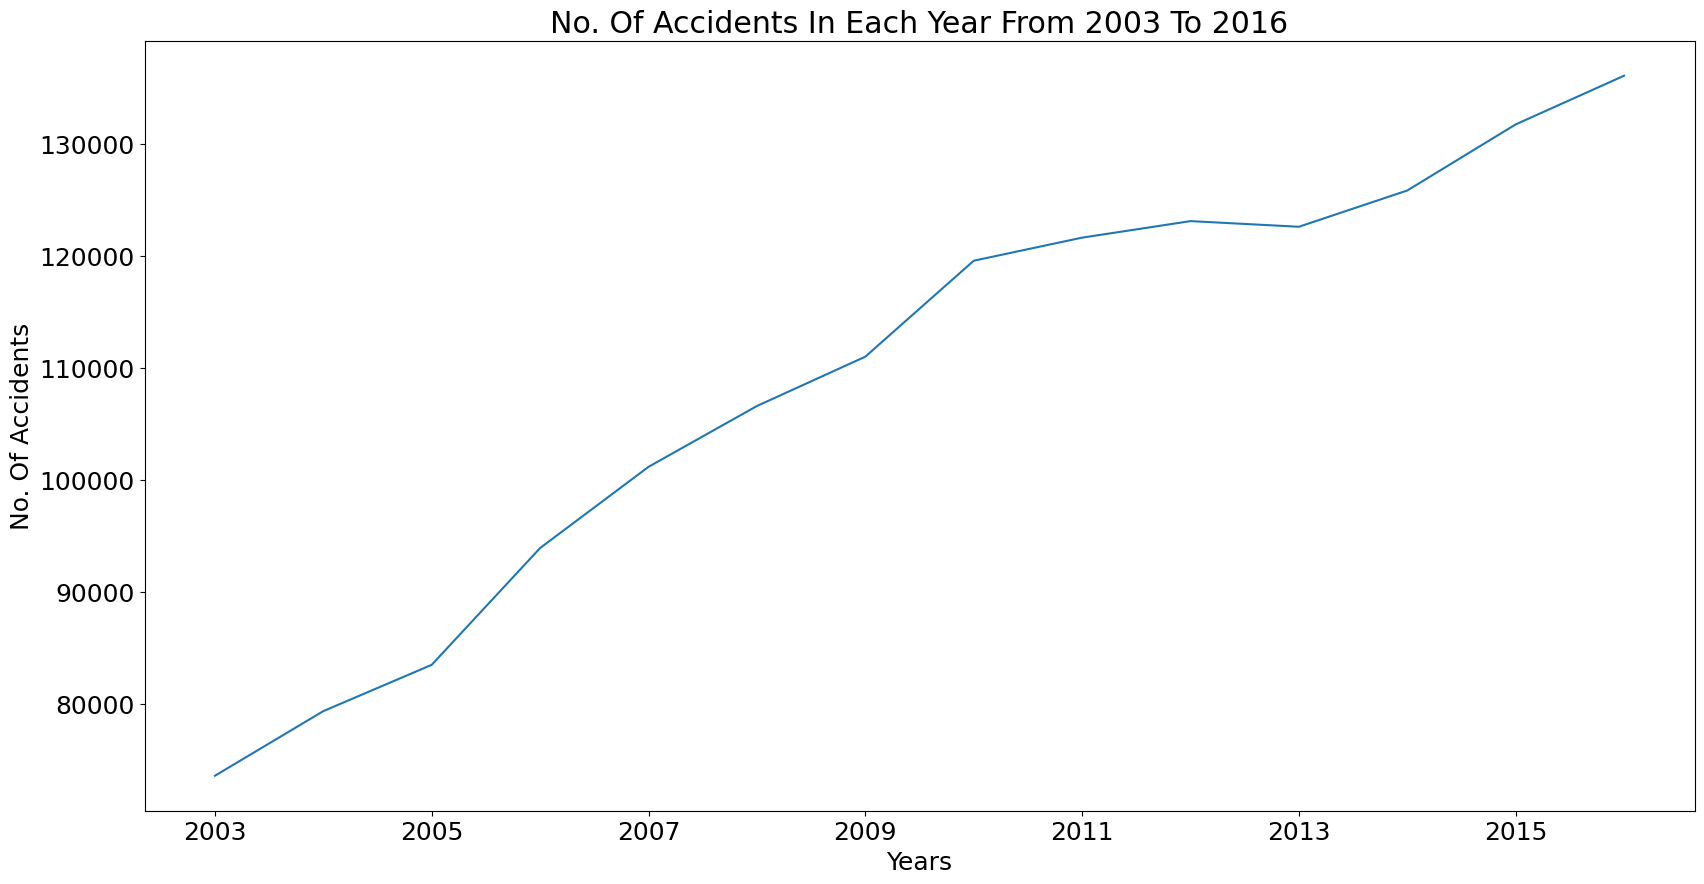

In [66]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size': 18} )

df9.iloc[1:].plot(figsize = (20,10), legend = False)
plt.xlabel('Years')
plt.ylabel('No. Of Accidents')
plt.title('No. Of Accidents In Each Year From 2003 To 2016')
plt.show()

# DF4
**This data set contains number of accidents/deaths/injuries occuring as per number of lanes**

**df4 = laneAccidents.csv**

In [67]:
df4 = pd.read_csv(r"C:\Users\Prathamesh\Downloads\Databases-20231228T062726Z-001\Databases\laneAccidents.csv")

In [68]:
df4.head()

S.No           State/UT  Single Lane - Accident - 2014  \
0    1     Andhra Pradesh                         8634.0   
1    2  Arunachal Pradesh                           90.0   
2    3              Assam                         3888.0   
3    4              Bihar                         3731.0   
4    5       Chhattisgarh                         7961.0   

   Single Lane - Accident - 2014 per 1L people  Single Lane - Killed - 2014  \
0                                    16.473750                       2958.0   
1                                     6.504173                         60.0   
2                                    12.459312                       1217.0   
3                                     3.584073                       1815.0   
4                                    31.164370                       2244.0   

   Single Lane - Killed - 2014 per 1L people  Single Lane - Injured - 2014  \
0                                   5.643891                       13541.0   
1                                   4.336115                         152.0   
2                                   3.899944                        3195.0   
3                                   1.743525                        2475.0   
4                                   8.784430                        7762.0   

   Single Lane - Injured - 2014 per 1L people  Two Lanes - Accident - 2014  \
0                                   25.836350                      10327.0   
1                                   10.984826                        115.0   
2                                   10.238555                       2432.0   
3                                    2.377534                       4156.0   
4                                   30.385359                       4696.0   

   Two Lanes - Accident - 2014 per 1L people  ...  \
0                                  19.704009  ...   
1                                   8.310888  ...   
2                                   7.793479  ...   
3                                   3.992336  ...   
4                                  18.383103  ...   

   3 Lanes or more w.o Median - Killed - 2014 per 1L people  \
0                                           0.755572          
1                                           0.000000          
2                                           0.080114          
3                                           0.374642          
4                                           0.000000          

   3 Lanes or more w.o Median - Injured - 2014  \
0                                       1199.0   
1                                          0.0   
2                                         42.0   
3                                        485.0   
4                                          0.0   

   3 Lanes or more w.o Median - Injured - 2014 per 1L people  \
0                                           2.287703           
1                                           0.000000           
2                                           0.134591           
3                                           0.465901           
4                                           0.000000           

   4 Lanes with Median - Accident - 2014  \
0                                 4291.0   
1                                    0.0   
2                                  768.0   
3                                  913.0   
4                                 1164.0   

   4 Lanes with Median - Accident - 2014 per 1L people  \
0                                           8.187267     
1                                           0.000000     
2                                           2.461099     
3                                           0.877046     
4                                           4.556629     

   4 Lanes with Median - Killed - 2014  \
0                               1560.0   
1                                  0.0   
2                                245.0   
3                                612.0   
4                   

In [69]:
df4.dtypes

S.No                                                           object
State/UT                                                       object
Single Lane - Accident - 2014                                 float64
Single Lane - Accident - 2014 per 1L people                   float64
Single Lane - Killed - 2014                                   float64
Single Lane - Killed - 2014 per 1L people                     float64
Single Lane - Injured - 2014                                  float64
Single Lane - Injured - 2014 per 1L people                    float64
Two Lanes - Accident - 2014                                   float64
Two Lanes - Accident - 2014 per 1L people                     float64
Two Lanes - Killed - 2014                                     float64
Two Lanes - Killed - 2014 per 1L people                       float64
Two Lanes - Injured - 2014                                    float64
Two Lanes - Injured - 2014 per 1L people                      float64
3 Lanes or more w.o 

In [70]:
df4.dropna(axis = 0, how = 'any', inplace = True)

**Number of ACCIDENTS for 1,2,3,4 lanes per 1L population.**

In [71]:
singleLaneAcc = df4['Single Lane - Accident - 2014 per 1L people']
twoLaneAcc = df4['Two Lanes - Accident - 2014 per 1L people']
threeLaneAcc = df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people']
fourLaneAcc = df4['4 Lanes with Median - Accident - 2014 per 1L people']

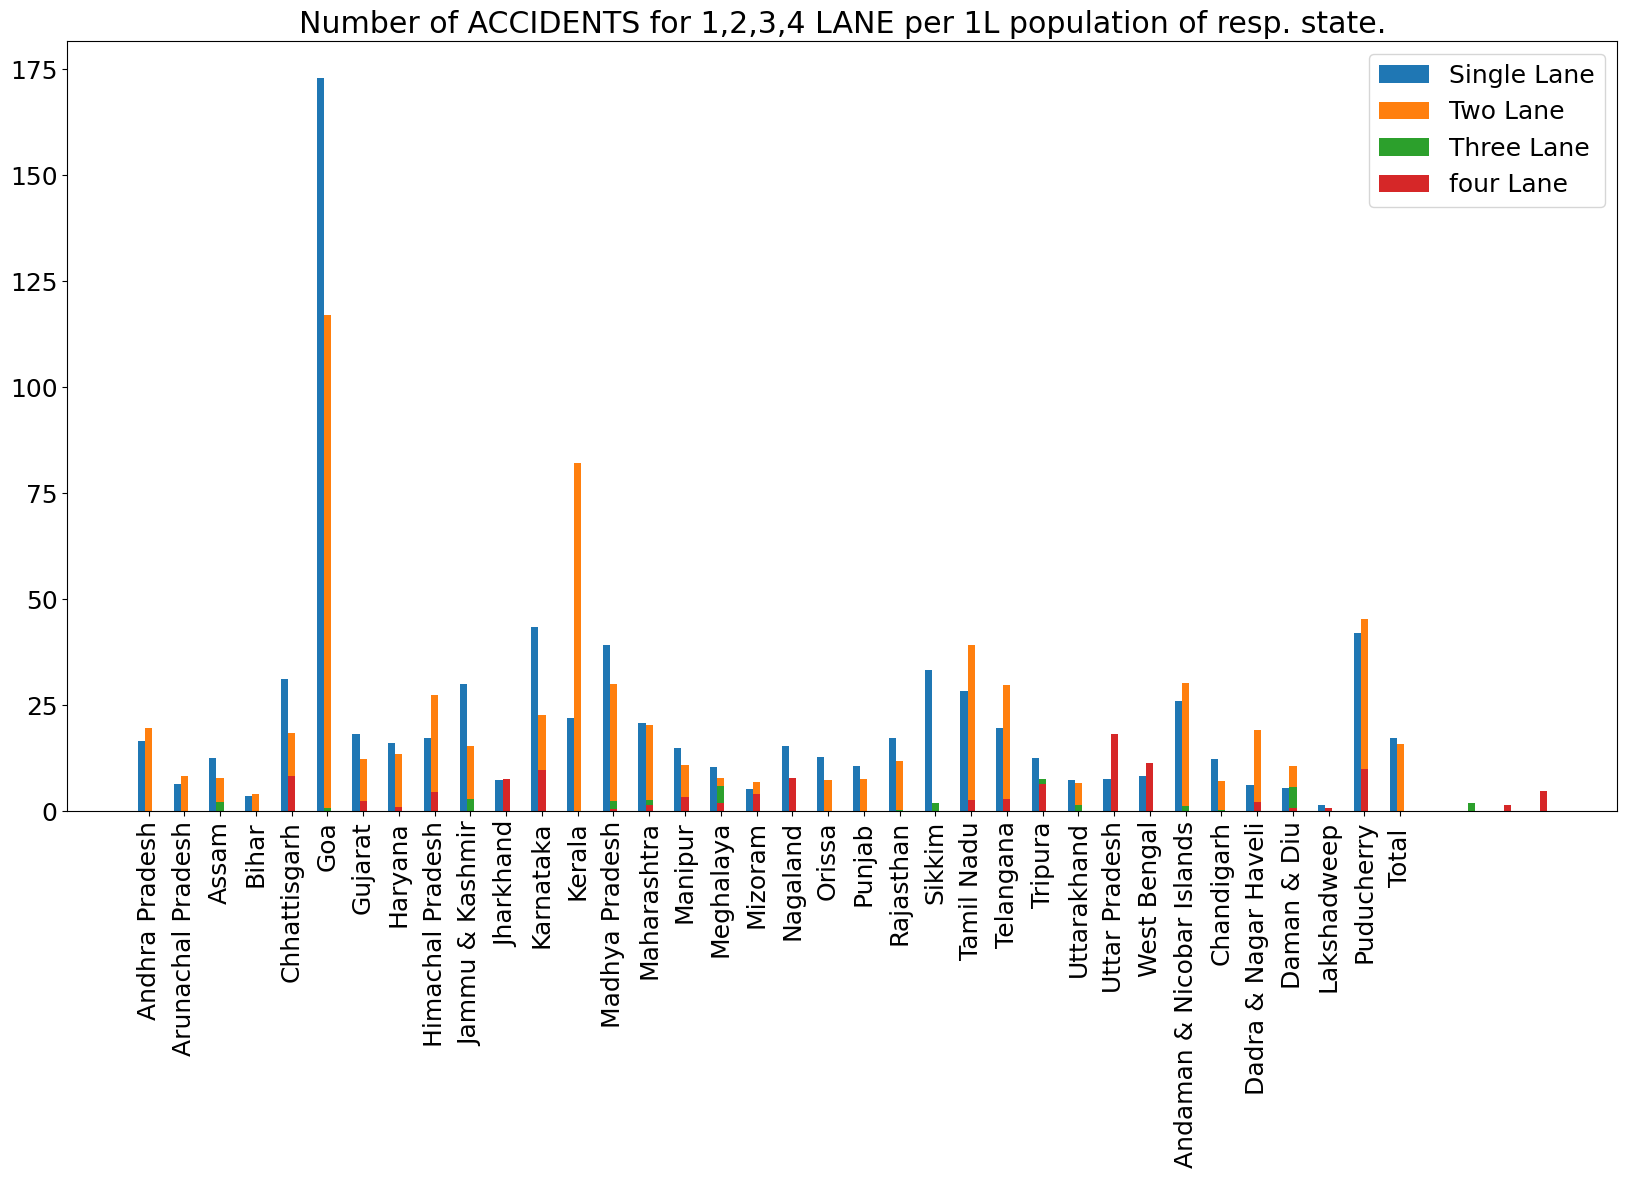

In [72]:
plt.figure(figsize = (20,10))
plt.rcParams.update = ({'font.size' : 18})
UT = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])

plt.bar(UT-0.2, singleLaneAcc, label = 'Single Lane', width = 0.2,align = 'center')

plt.bar(UT,twoLaneAcc, label = 'Two Lane', width = 0.2,align = 'center')

plt.bar(UT + 2, threeLaneAcc, label = 'Three Lane', width = 0.2,align = 'center')

plt.bar(UT + 4 , fourLaneAcc, label = 'four Lane', width = 0.2,align = 'center')

plt.xticks(UT,df4['State/UT'], rotation = 'vertical')
plt.legend(loc = 'best')
plt.title('Number of ACCIDENTS for 1,2,3,4 LANE per 1L population of resp. state.')
plt.show()

Number of people INJURED for 1,2,3,4 number of lanes per 1L population.

In [73]:
df4.head(2)

S.No           State/UT  Single Lane - Accident - 2014  \
0    1     Andhra Pradesh                         8634.0   
1    2  Arunachal Pradesh                           90.0   

   Single Lane - Accident - 2014 per 1L people  Single Lane - Killed - 2014  \
0                                    16.473750                       2958.0   
1                                     6.504173                         60.0   

   Single Lane - Killed - 2014 per 1L people  Single Lane - Injured - 2014  \
0                                   5.643891                       13541.0   
1                                   4.336115                         152.0   

   Single Lane - Injured - 2014 per 1L people  Two Lanes - Accident - 2014  \
0                                   25.836350                      10327.0   
1                                   10.984826                        115.0   

   Two Lanes - Accident - 2014 per 1L people  ...  \
0                                  19.704009  ...   
1                                   8.310888  ...   

   3 Lanes or more w.o Median - Killed - 2014 per 1L people  \
0                                           0.755572          
1                                           0.000000          

   3 Lanes or more w.o Median - Injured - 2014  \
0                                       1199.0   
1                                          0.0   

   3 Lanes or more w.o Median - Injured - 2014 per 1L people  \
0                                           2.287703           
1                                           0.000000           

   4 Lanes with Median - Accident - 2014  \
0                                 4291.0   
1                                    0.0   

   4 Lanes with Median - Accident - 2014 per 1L people  \
0                                           8.187267     
1                                           0.000000     

   4 Lanes with Median - Killed - 2014  \
0                               1560.0   
1                                  0.0   

   4 Lanes with Median - Killed - 2014 per 1L people  \
0                                           2.976494   
1                                           0.000000   

   4 Lanes with Median - Injured - 2014  \
0                                5069.0   
1                                   0.0   

   4 Lanes with Median - Injured - 2014 per 1L people  Population  
0                                           9.671698     52410653  
1                                           0.000000      1383727  

[2 rows x 27 columns]

In [74]:
singleInjured = df4['Single Lane - Injured - 2014 per 1L people']
twoLaneInjured = df4['Two Lanes - Accident - 2014 per 1L people']
threeLaneInjured = df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people']
fourLaneInjured = df4['4 Lanes with Median - Injured - 2014 per 1L people']

<function matplotlib.pyplot.show(close=None, block=None)>

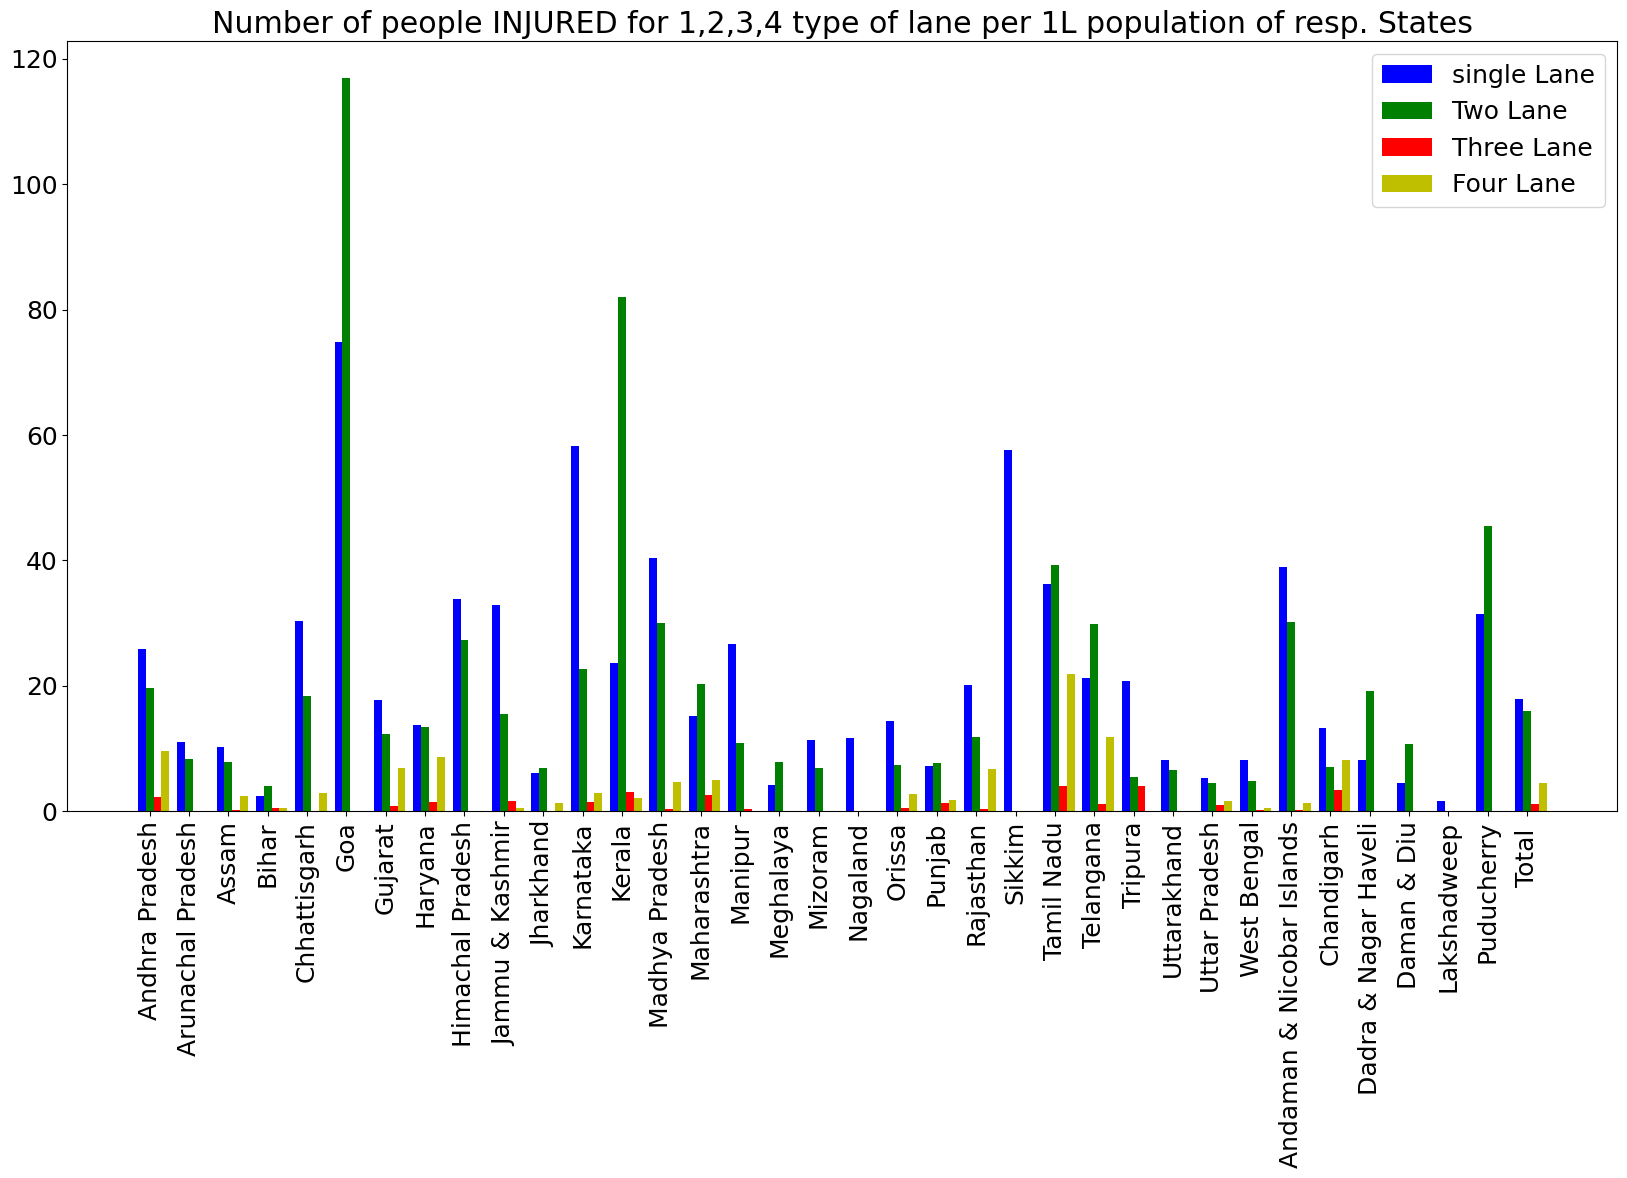

In [75]:
plt.figure(figsize = (20,10))
plt.rcParams.update = ({'font.size' : 18})
UT = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])

plt.bar(UT - 0.2,singleInjured, width = 0.2 , label = 'single Lane', align = 'center', color = 'b' )

plt.bar(UT , twoLaneInjured , width = 0.2 , label = 'Two Lane' , align = 'center', color = 'g')

plt.bar(UT + 0.2 , threeLaneInjured , width = 0.2 , label = 'Three Lane' , align = 'center', color = 'r' )

plt.bar(UT + 0.4, fourLaneInjured, width = 0.2 , label = 'Four Lane' , align = 'center', color = 'y' )

plt.xticks(UT, df4['State/UT'], rotation = 'vertical')
plt.legend(loc = 'best')
plt.title('Number of people INJURED for 1,2,3,4 type of lane per 1L population of resp. States')
plt.show


Number of people KILLED for 1,2,3,4 Lanes per 1L population.

In [76]:
singleLaneKilled = df4['Single Lane - Killed - 2014 per 1L people']
twoLaneKilled = df4['Two Lanes - Killed - 2014 per 1L people']
threeLaneKilled = df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people']
fourLaneKilled = df4['4 Lanes with Median - Killed - 2014 per 1L people']

<function matplotlib.pyplot.show(close=None, block=None)>

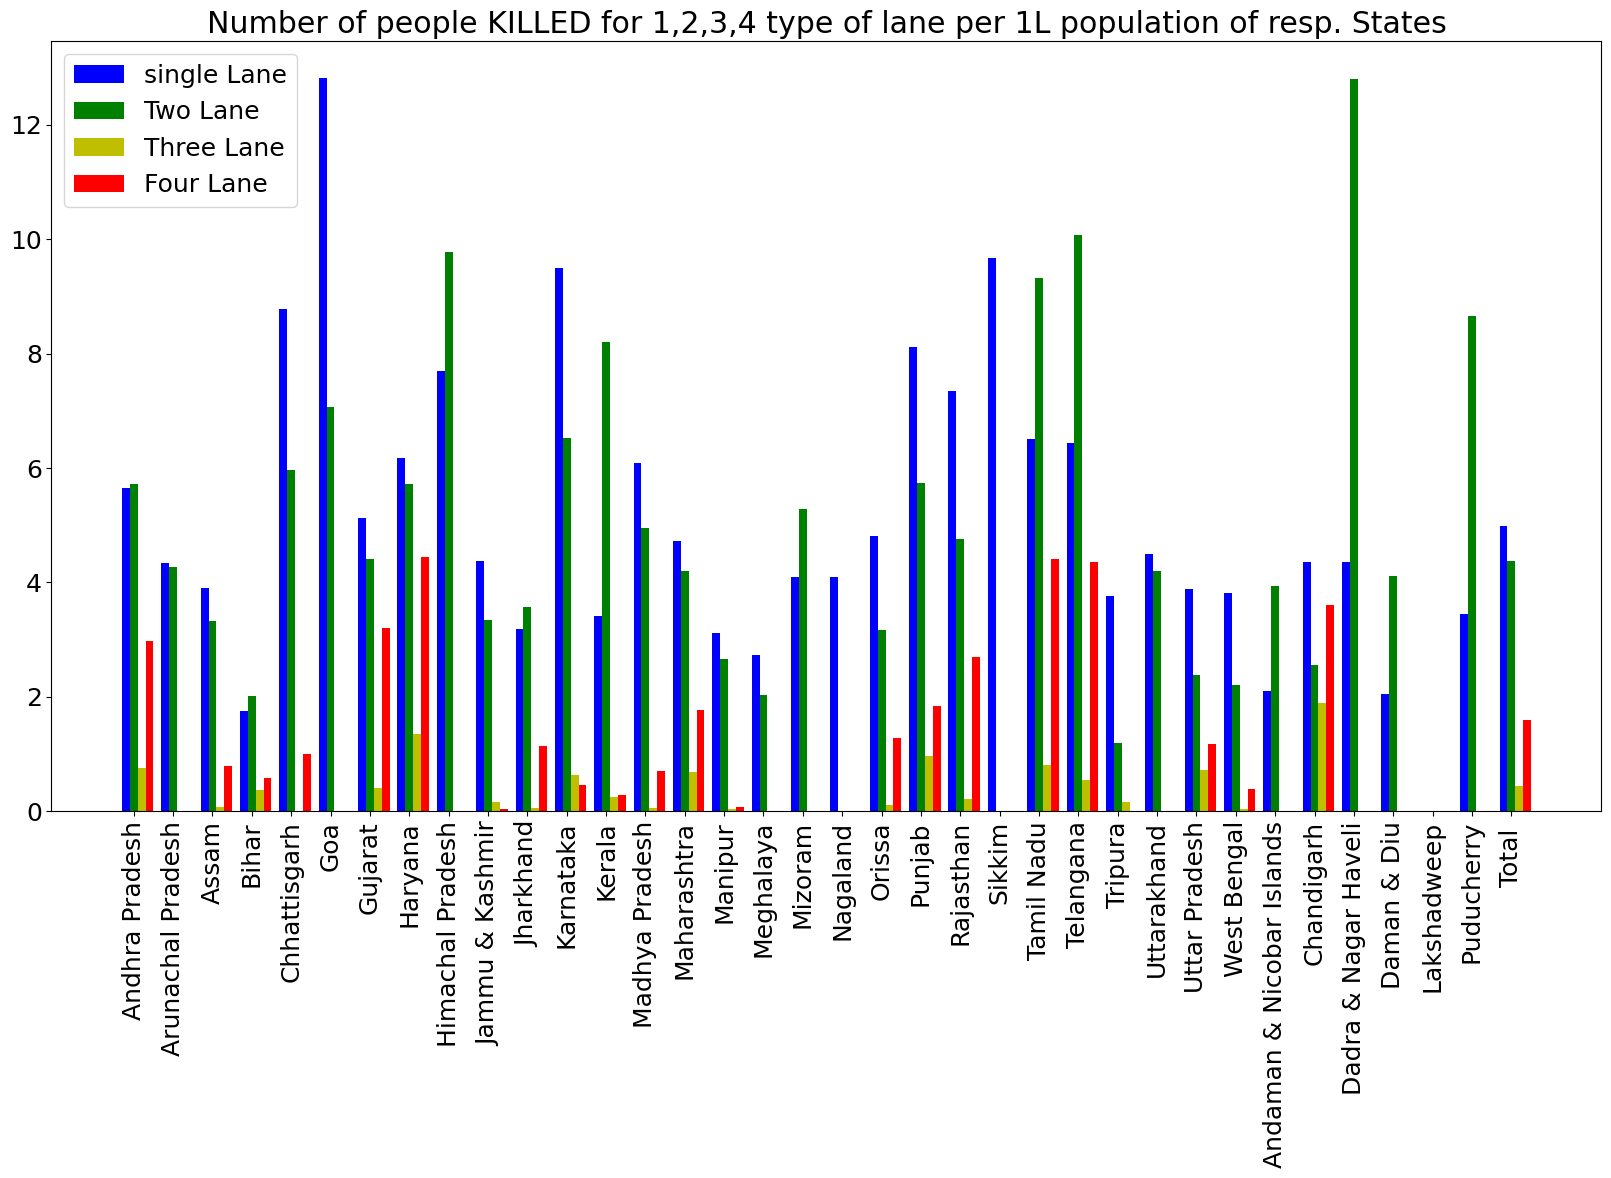

In [77]:
plt.figure(figsize=(20,10))


UT = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])

plt.bar(UT - 0.2,singleLaneKilled, width = 0.2 , label = 'single Lane', align = 'center', color = 'b' )

plt.bar(UT , twoLaneKilled , width = 0.2 , label = 'Two Lane' , align = 'center', color = 'g')

plt.bar(UT + 0.2 , threeLaneKilled , width = 0.2 , label = 'Three Lane' , align = 'center', color = 'y' )

plt.bar(UT + 0.4, fourLaneKilled, width = 0.2 , label = 'Four Lane' , align = 'center', color = 'r' )

plt.xticks(UT, df4['State/UT'], rotation = 'vertical')
plt.legend(loc = 'best')
plt.title('Number of people KILLED for 1,2,3,4 type of lane per 1L population of resp. States')
plt.show


Number of accidents, people injured, killed on SINGLE LANE per 1L population.

In [78]:
df4.dtypes

S.No                                                           object
State/UT                                                       object
Single Lane - Accident - 2014                                 float64
Single Lane - Accident - 2014 per 1L people                   float64
Single Lane - Killed - 2014                                   float64
Single Lane - Killed - 2014 per 1L people                     float64
Single Lane - Injured - 2014                                  float64
Single Lane - Injured - 2014 per 1L people                    float64
Two Lanes - Accident - 2014                                   float64
Two Lanes - Accident - 2014 per 1L people                     float64
Two Lanes - Killed - 2014                                     float64
Two Lanes - Killed - 2014 per 1L people                       float64
Two Lanes - Injured - 2014                                    float64
Two Lanes - Injured - 2014 per 1L people                      float64
3 Lanes or more w.o 

In [79]:
singleLaneAcc = df4['Single Lane - Accident - 2014 per 1L people']
singleLaneKilled = df4['Single Lane - Killed - 2014 per 1L people']
singleLaneInjured = df4['Single Lane - Injured - 2014 per 1L people']

<function matplotlib.pyplot.show(close=None, block=None)>

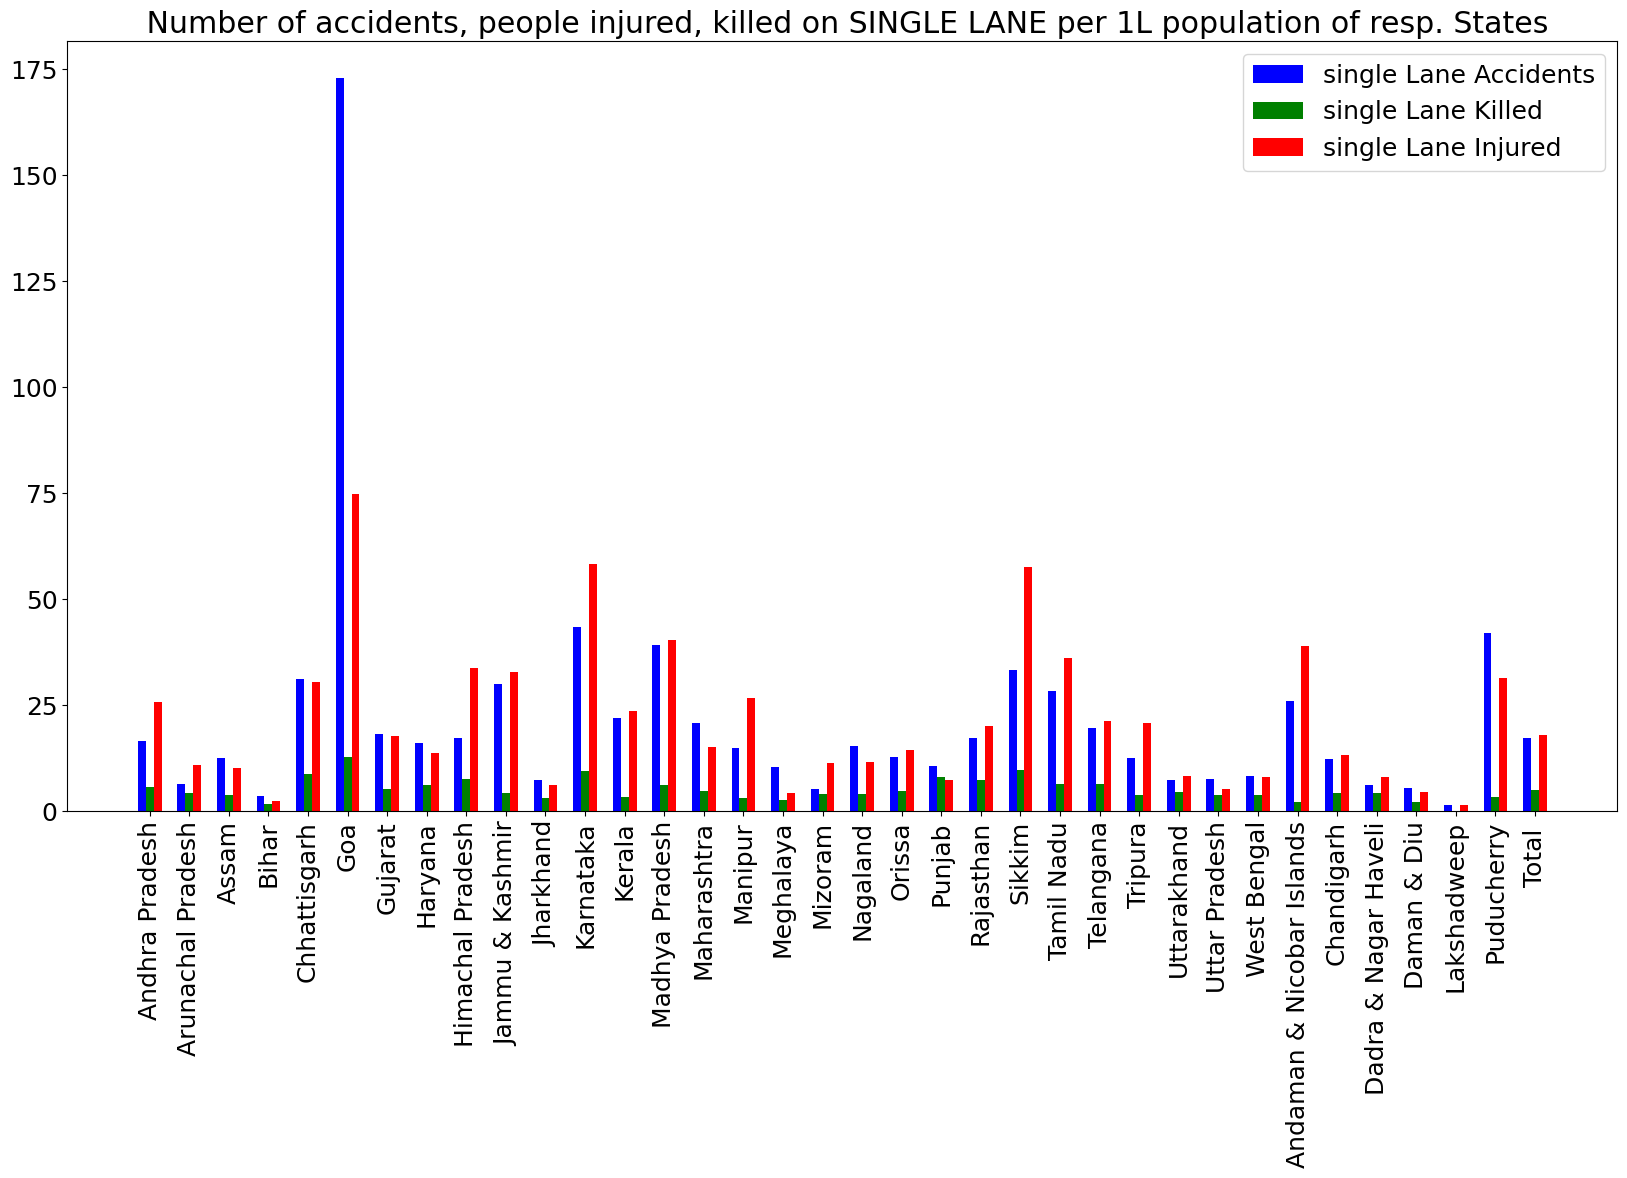

In [80]:
plt.figure(figsize = (20,10))
plt.rcParams.update = ({'font.size' : 18})
UT = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])

plt.bar(UT - 0.2, singleLaneAcc , width = 0.2 , label = 'single Lane Accidents', align = 'center', color = 'b' )

plt.bar(UT , singleLaneKilled , width = 0.2 , label = 'single Lane Killed' , align = 'center', color = 'g')

plt.bar(UT + 0.2 , singleLaneInjured , width = 0.2 , label = 'single Lane Injured' , align = 'center', color = 'r' )


plt.xticks(UT, df4['State/UT'], rotation = 'vertical')
plt.legend(loc = 'best')
plt.title(' Number of accidents, people injured, killed on SINGLE LANE per 1L population of resp. States')
plt.show

Number of accidents, people injured, killed on DOUBLE LANE per 1L population.

In [81]:
twoLaneAcc = df4['Two Lanes - Accident - 2014 per 1L people']
twoLaneKilled = df4['Two Lanes - Killed - 2014 per 1L people']
twoLaneInjured = df4['Two Lanes - Injured - 2014 per 1L people']

<function matplotlib.pyplot.show(close=None, block=None)>

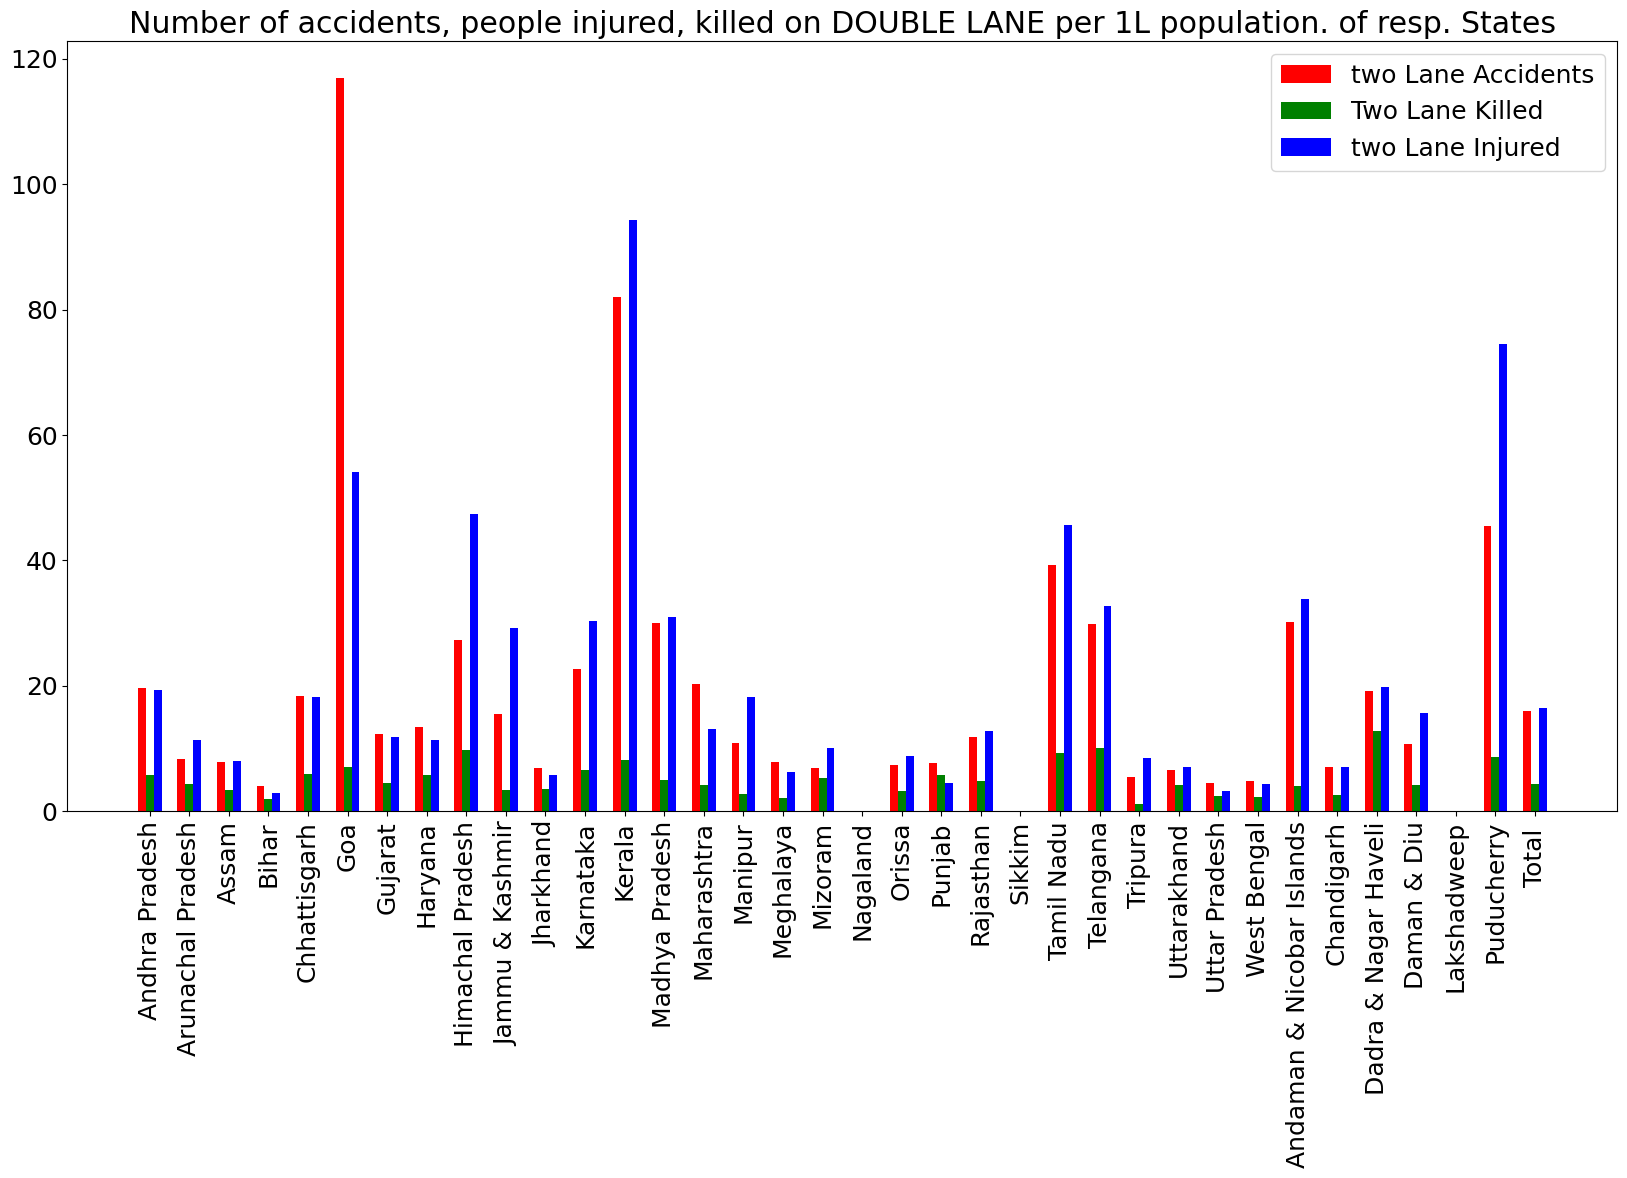

In [82]:
plt.figure(figsize = (20,10))
plt.rcParams.update = ({'font.size' : 18})
UT = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36])

plt.bar(UT - 0.2,twoLaneAcc, width = 0.2 , label = 'two Lane Accidents', align = 'center', color = 'r' )

plt.bar(UT , twoLaneKilled , width = 0.2 , label = 'Two Lane Killed' , align = 'center', color = 'g')

plt.bar(UT + 0.2 , twoLaneInjured , width = 0.2 , label = 'two Lane Injured' , align = 'center', color = 'b' )

plt.xticks(UT, df4['State/UT'], rotation = 'vertical')
plt.legend(loc = 'best')
plt.title('Number of accidents, people injured, killed on DOUBLE LANE per 1L population. of resp. States')
plt.show

Number of accidents, people injured, killed for THREE LANE per 1L population.

In [83]:
threeLaneTotalInjured = df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people']
threeLaneTotalKilled = df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people']
threeLaneTotalAccidents = df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people']

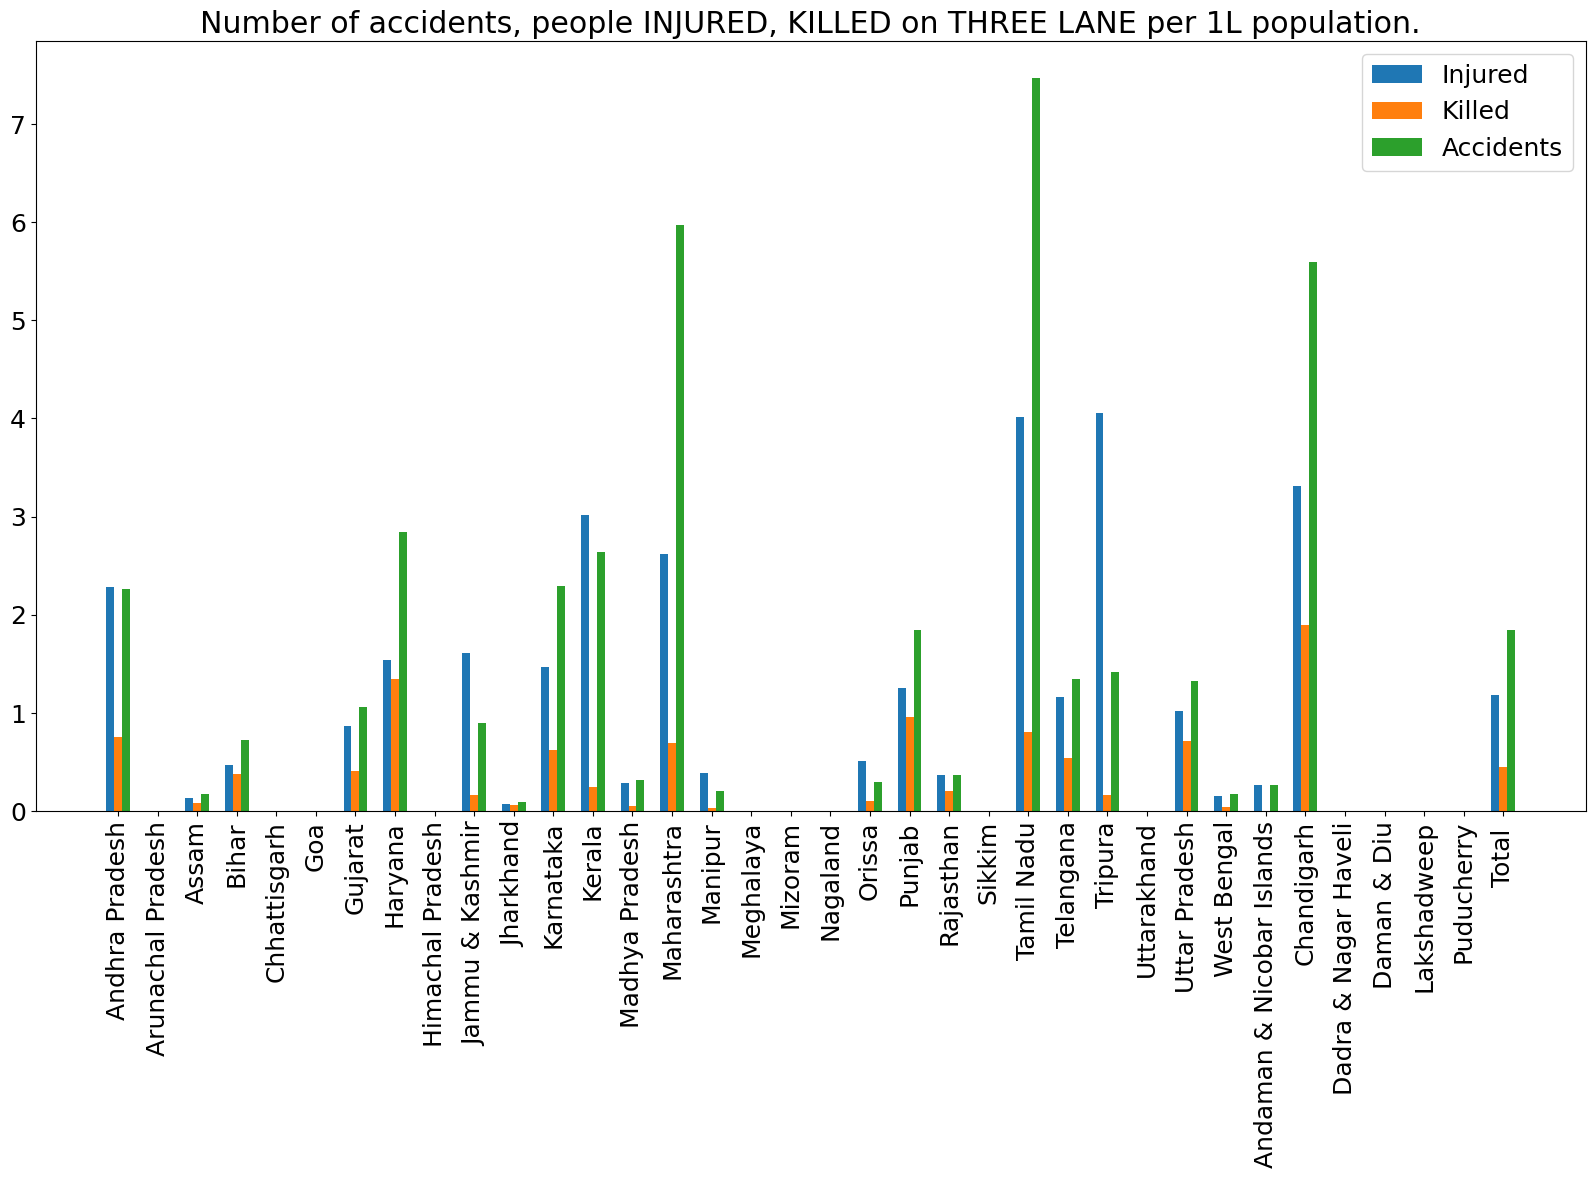

In [84]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size' : 18})

plt.bar(UT-0.2, threeLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, threeLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, threeLaneTotalAccidents, width=0.2, align='center', label="Accidents")

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of accidents, people INJURED, KILLED on THREE LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

*Number of accidents, people INJURED, KILLED on **FOUR LANE** per 1L population.*

In [85]:
fourLaneTotalInjured = df4['4 Lanes with Median - Injured - 2014 per 1L people']
fourLaneTotalKilled = df4['4 Lanes with Median - Killed - 2014 per 1L people']
fourLaneTotalAccidents = df4['4 Lanes with Median - Accident - 2014 per 1L people']

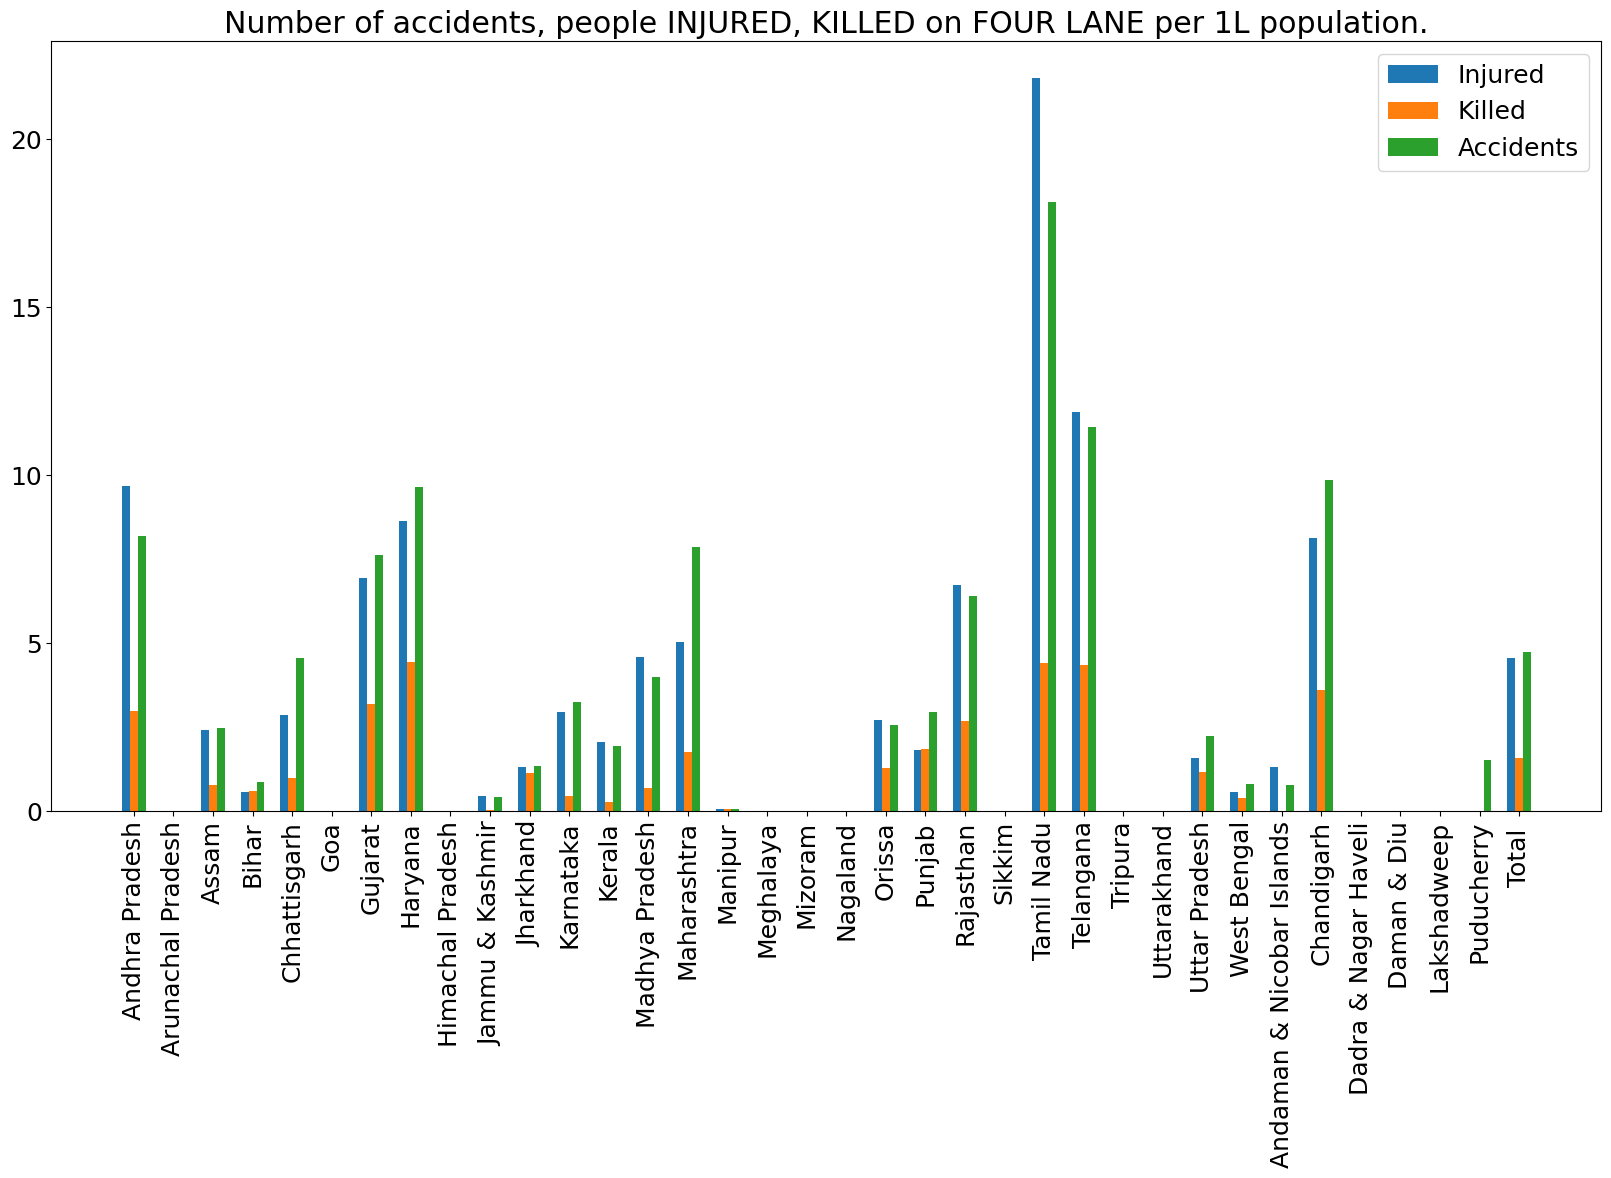

In [86]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size' : 18})

plt.bar(UT-0.2, fourLaneTotalInjured, width=0.2, align='center', label='Injured')
plt.bar(UT, fourLaneTotalKilled, width=0.2, align='center', label='Killed')
plt.bar(UT+0.2, fourLaneTotalAccidents, width=0.2, align='center', label="Accidents")

plt.xticks(UT, df4['State/UT'], rotation='vertical')
plt.title("Number of accidents, people INJURED, KILLED on FOUR LANE per 1L population.")
plt.legend(loc = "best")
plt.show()

*Total number of accidents, people INJURED, KILLED **irrespective of lanes** per 1L population per state*

In [87]:
df4.dtypes

S.No                                                           object
State/UT                                                       object
Single Lane - Accident - 2014                                 float64
Single Lane - Accident - 2014 per 1L people                   float64
Single Lane - Killed - 2014                                   float64
Single Lane - Killed - 2014 per 1L people                     float64
Single Lane - Injured - 2014                                  float64
Single Lane - Injured - 2014 per 1L people                    float64
Two Lanes - Accident - 2014                                   float64
Two Lanes - Accident - 2014 per 1L people                     float64
Two Lanes - Killed - 2014                                     float64
Two Lanes - Killed - 2014 per 1L people                       float64
Two Lanes - Injured - 2014                                    float64
Two Lanes - Injured - 2014 per 1L people                      float64
3 Lanes or more w.o 

In [88]:
df4['Sum Total Number Of Persons Accidents - 2014 per 1L People'] = df4['Single Lane - Accident - 2014 per 1L people'] + df4['Two Lanes - Accident - 2014 per 1L people'] + df4['3 Lanes or more w.o Median - Accident - 2014 per 1L people'] + df4['4 Lanes with Median - Accident - 2014 per 1L people']
df4['Sum Total Number Of Persons Killed - 2014 per 1L People'] = df4['Single Lane - Killed - 2014 per 1L people'] + df4['Two Lanes - Killed - 2014 per 1L people'] + df4['3 Lanes or more w.o Median - Killed - 2014 per 1L people'] + df4['4 Lanes with Median - Killed - 2014 per 1L people']
df4['Sum Total Number Of Persons Injured - 2014 per 1L People'] = df4['Single Lane - Injured - 2014 per 1L people'] + df4['Two Lanes - Injured - 2014 per 1L people'] + df4['3 Lanes or more w.o Median - Injured - 2014 per 1L people'] + df4['4 Lanes with Median - Injured - 2014 per 1L people']

Total_accidents = df4['Sum Total Number Of Persons Accidents - 2014 per 1L People']
Total_Killed = df4['Sum Total Number Of Persons Killed - 2014 per 1L People']
Total_Injured = df4['Sum Total Number Of Persons Injured - 2014 per 1L People']

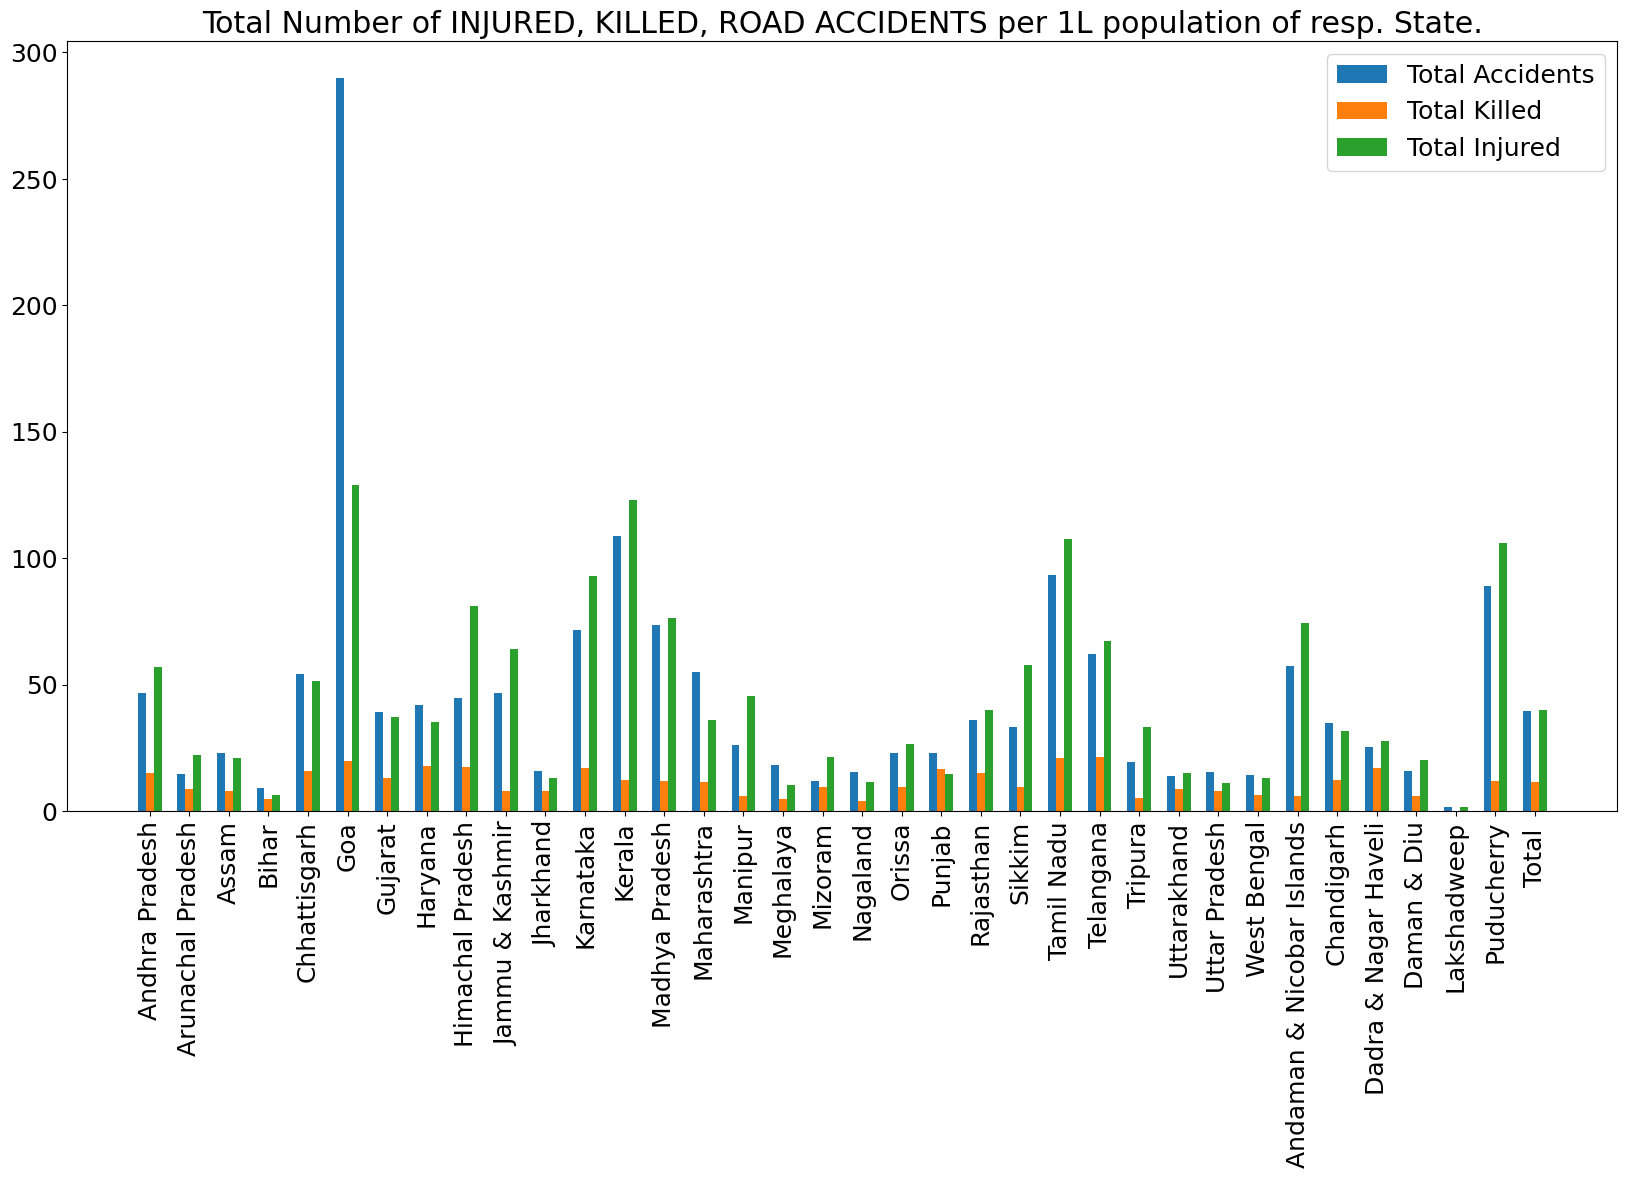

In [89]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size' : 18})

plt.bar(UT - 0.2, Total_accidents, width = 0.2, align = 'center' , label = 'Total Accidents')
plt.bar(UT , Total_Killed, width = 0.2, align = 'center', label = 'Total Killed')
plt.bar(UT + 0.2, Total_Injured, width = 0.2, align = 'center', label = 'Total Injured')

plt.xticks(UT, df4['State/UT'], rotation = 'vertical')
plt.title('Total Number of INJURED, KILLED, ROAD ACCIDENTS per 1L population of resp. State.')
plt.legend(loc = 'best')
plt.show()

Scatter plot showing Total Sum of Accidents vs Killed for all  types of lanes for the accident (dots represent each state)

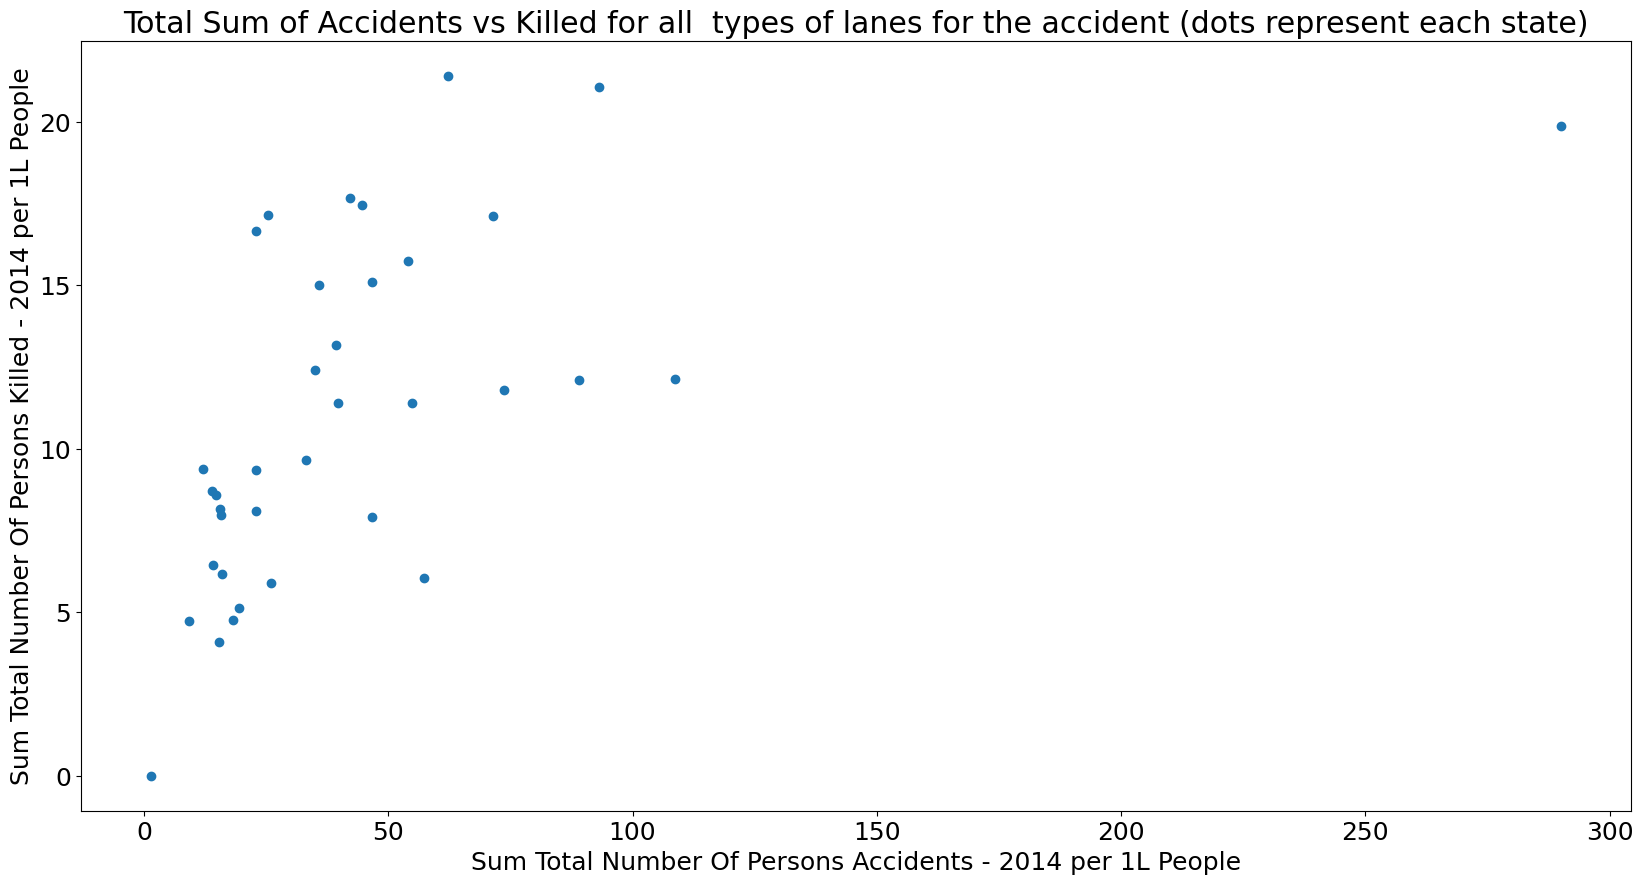

In [90]:
plt.figure(figsize = (20,10))
plt.rcParams.update = ({'font.size' : 18})

plt.scatter(df4['Sum Total Number Of Persons Accidents - 2014 per 1L People'],df4['Sum Total Number Of Persons Killed - 2014 per 1L People'])
plt.xlabel('Sum Total Number Of Persons Accidents - 2014 per 1L People')
plt.ylabel('Sum Total Number Of Persons Killed - 2014 per 1L People')
plt.title('Total Sum of Accidents vs Killed for all  types of lanes for the accident (dots represent each state)')
plt.show()


Scatter plot showing Total Sum of Accidents vs Injured for all  types of lanes for the accident (dots represent each state)¶


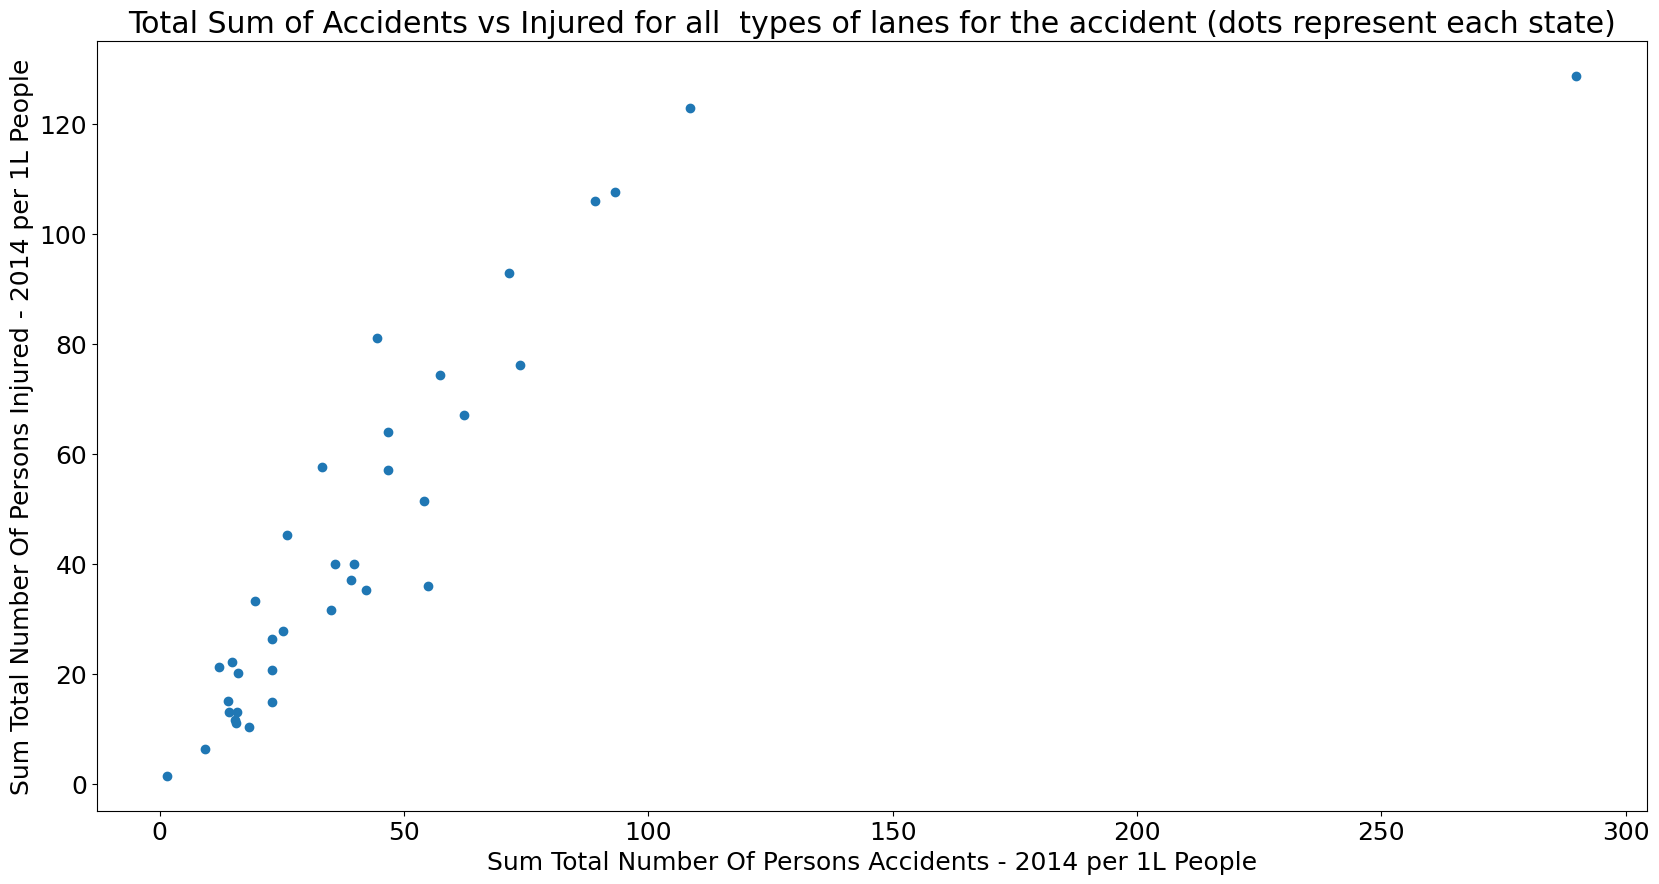

In [91]:
plt.figure(figsize = (20,10))
plt.rcParams.update = ({'font.size' : 18})

plt.scatter(df4['Sum Total Number Of Persons Accidents - 2014 per 1L People'],df4['Sum Total Number Of Persons Injured - 2014 per 1L People'])
plt.xlabel('Sum Total Number Of Persons Accidents - 2014 per 1L People')
plt.ylabel('Sum Total Number Of Persons Injured - 2014 per 1L People')
plt.title('Total Sum of Accidents vs Injured for all  types of lanes for the accident (dots represent each state)')
plt.show()

# DF5 -
**This dataset states the count of accidents, deaths, injuries occured due to various faults and reasons like Fault of Driver, weather condition, boulder, poor light etc.**

**df5 = reasonOfAccident.csv**

In [92]:
df5 = pd.read_csv(r"C:\Users\Prathamesh\Downloads\Databases-20231228T062726Z-001\Databases\reasonOfAccident.csv")

In [93]:
df5.head(2)

Sl. No         States/UTs  \
0      1     Andhra Pradesh   
1      2  Arunachal Pradesh   

   Fault of Driver-Total No. of Road Accidents - 2014  \
0                                            21359.0    
1                                               30.0    

   Fault of Driver-Total No. of Road Accidents - 2014 per 1L people  \
0                                          40.753165                  
1                                           2.168058                  

   Fault of Driver-Number of Persons-Killed - 2014  \
0                                             6743   
1                                               19   

   Fault of Driver-Number of Persons-Killed - 2014 per 1L people  \
0                                          12.865705               
1                                           1.373103               

   Fault of Driver-Number of Persons-Injured - 2014  \
0                                           26287.0   
1                                              30.0   

   Fault of Driver-Number of Persons-Injured - 2014 per 1L people  \
0                                          50.155834                
1                                           2.168058                

   Fault of Driver of other vehicles-Total No. of Road Accidents - 2014  \
0                                              288.0                      
1                                               20.0                      

   Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people  \
0                                           0.549507                                    
1                                           1.445372                                    

   ...  Falling of boulders-Number of Persons-Killed - 2014 per 1L people  \
0  ...                                           0.001908                   
1  ...                                           0.000000                   

   Falling of boulders-Number of Persons-Injured - 2014  \
0                                               12.0      
1                                                0.0      

   Falling of boulders-Number of Persons-Injured - 2014 per 1L people  \
0                                           0.022896                    
1                                           0.000000                    

   Other causes/causes not known-Total No. of Road Accidents - 2014  \
0                                             1530.0                  
1                                               34.0                  

   Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people  \
0                                           2.919254                                
1                                           2.457132                                

   Other causes/causes not known-Number of Persons-Killed - 2014  \
0                                                545               
1                                                 22               

   Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people  \
0                                           1.039865                             
1                                           1.589909                             

   Other causes/causes not known-Number of Persons-Injured - 2014  \
0                                             1617.0                
1                                               54.0                

   Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people  \
0                                           3.085251                              
1                                           3.902504                              

   Population  
0    52410653  
1     1383727  

[2 rows x 63 columns]

In [94]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 63 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Sl. No                                                                                 37 non-null     object 
 1   States/UTs                                                                             37 non-null     object 
 2   Fault of Driver-Total No. of Road Accidents - 2014                                     36 non-null     float64
 3   Fault of Driver-Total No. of Road Accidents - 2014 per 1L people                       36 non-null     float64
 4   Fault of Driver-Number of Persons-Killed - 2014                                        37 non-null     int64  
 5   Fault of Driver-Number of Persons-Killed - 2014 per 1L people                   

In [95]:
df5.dtypes

Sl. No                                                                           object
States/UTs                                                                       object
Fault of Driver-Total No. of Road Accidents - 2014                              float64
Fault of Driver-Total No. of Road Accidents - 2014 per 1L people                float64
Fault of Driver-Number of Persons-Killed - 2014                                   int64
                                                                                 ...   
Other causes/causes not known-Number of Persons-Killed - 2014                     int64
Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people     float64
Other causes/causes not known-Number of Persons-Injured - 2014                  float64
Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people    float64
Population                                                                       object
Length: 63, dtype: object

*Reasons for death due to Accidents :*
- Driver
- Other Driver's
- Pedestrian
- Condition of Vehicle
- Road Condition
- Weather Condition
- Passenger
- Poor Light
- Boulders
- Other Causes

In [99]:
DriverFault = df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people']
OtherDriversFault = df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people']
PedestrianFault = df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people']
Condition_of_Vehicle_Fault = df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people']
Road_Condition_Fault = df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people']
Weather_Condition_Fault = df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people']
Passenger_Fault = df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people']
Poor_Light_Fault = df5['Poor light-Number of Persons-Killed - 2014 per 1L people']
Boulders_Fault = df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people']
Other_causes_Fault = df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people']

Number of people KILLED for each different REASON per 1L population of that state.

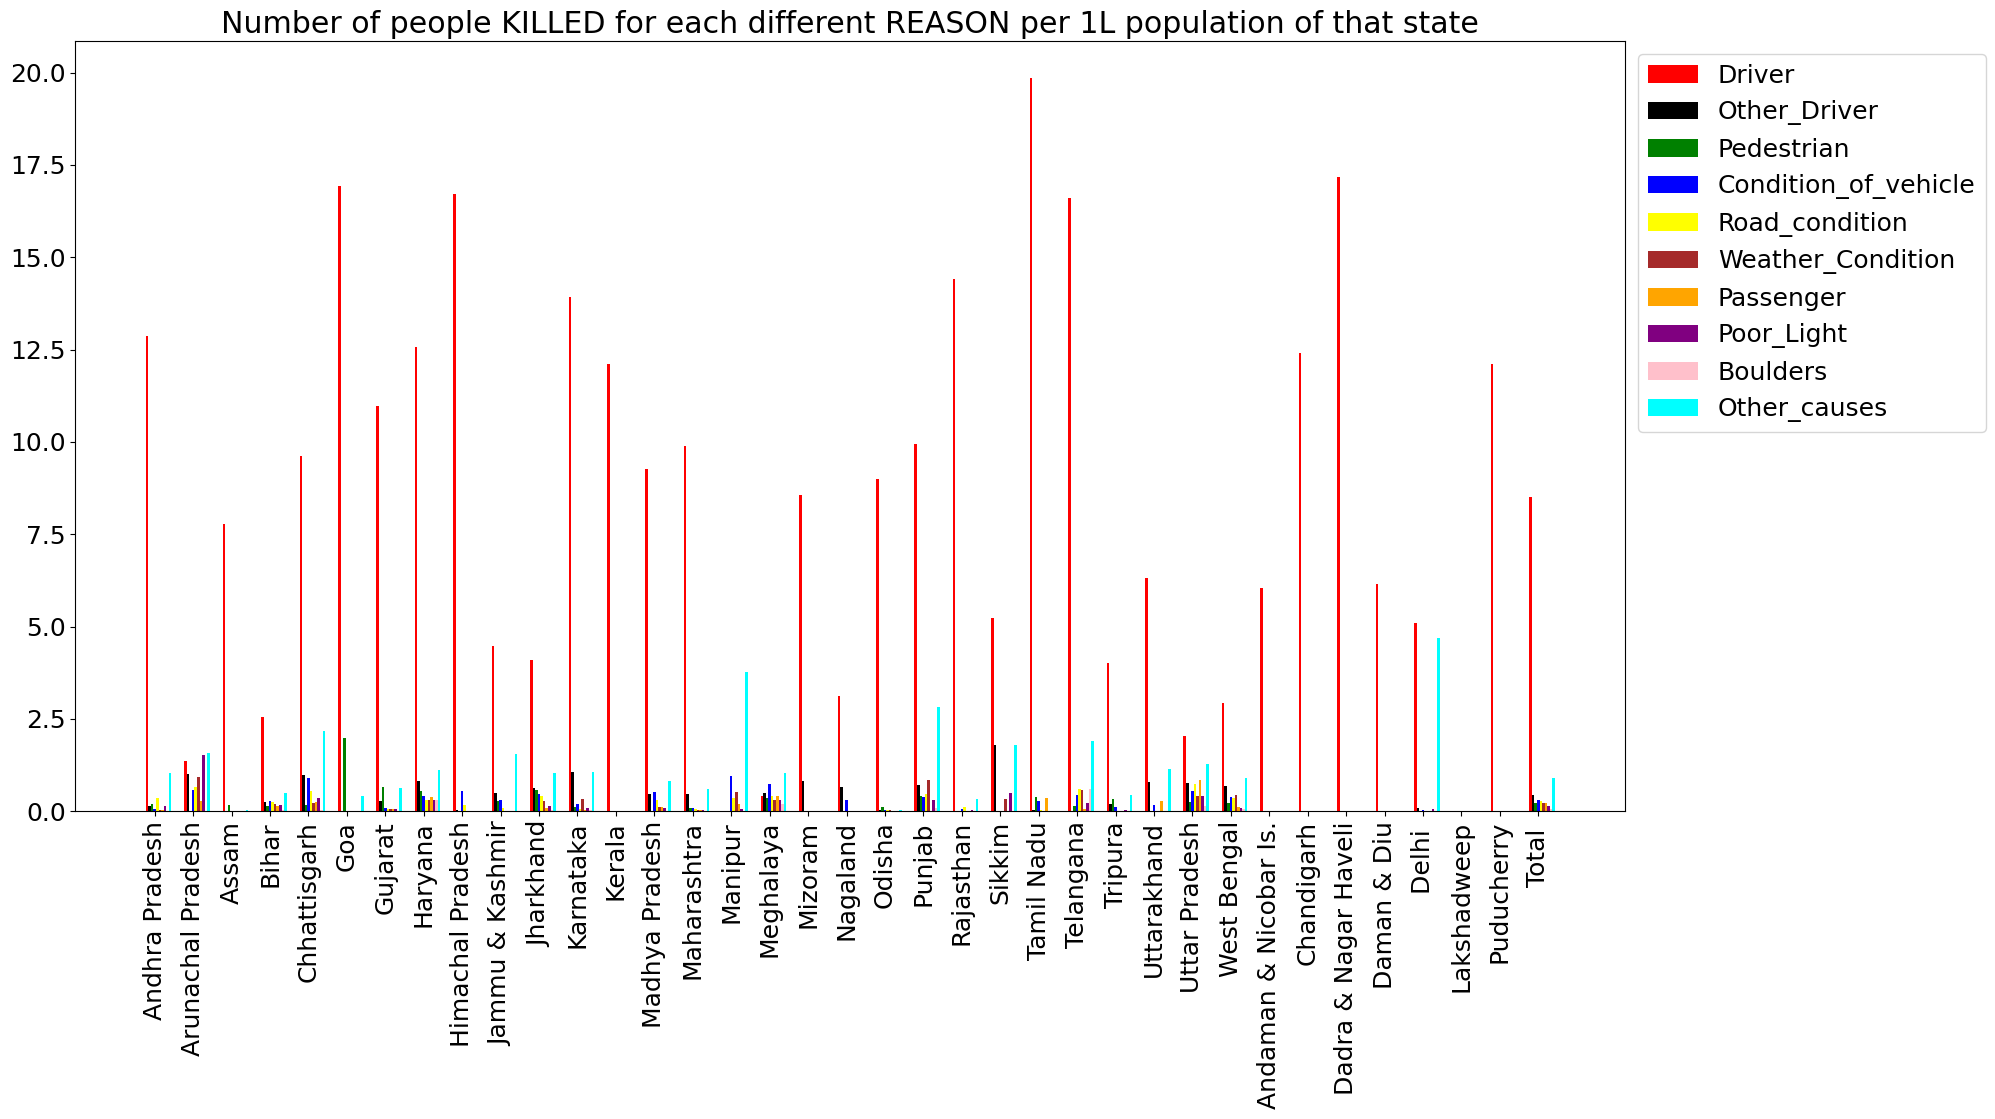

In [101]:
plt.figure(figsize =(20,10))
plt.rcParams.update = ({'font.size' : 18})

UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
UT=UT*3

plt.bar(UT -0.6,DriverFault, width = 0.2, color = 'r', align = 'center', label = 'Driver')
plt.bar(UT -0.4,OtherDriversFault, width = 0.2, color = 'black', align = 'center', label = 'Other_Driver')
plt.bar(UT -0.2,PedestrianFault, width = 0.2, color = 'green', align = 'center', label = 'Pedestrian')
plt.bar(UT,Condition_of_Vehicle_Fault, width = 0.2, color = 'b', align = 'center', label = 'Condition_of_vehicle')
plt.bar(UT+ 0.2,Road_Condition_Fault, width = 0.2, color = 'yellow', align = 'center', label = 'Road_condition')
plt.bar(UT +0.4,Weather_Condition_Fault, width = 0.2, color = 'brown', align = 'center', label = 'Weather_Condition')
plt.bar(UT + 0.6,Passenger_Fault, width = 0.2, color = 'orange', align = 'center', label = 'Passenger')
plt.bar(UT +0.8,Poor_Light_Fault, width = 0.2, color = 'purple', align = 'center', label = 'Poor_Light')
plt.bar(UT +1.0,Boulders_Fault, width = 0.2, color = 'pink', align = 'center', label = 'Boulders')
plt.bar(UT +1.2,Other_causes_Fault, width = 0.2, color = 'cyan', align = 'center', label = 'Other_causes')

plt.xticks(UT,df5['States/UTs'], rotation = 'vertical')
plt.legend(loc='upper left',bbox_to_anchor=(1,1))
plt.title('Number of people KILLED for each different REASON per 1L population of that state')
plt.show()










Number of people INJURED for each reason per 1L people of that state

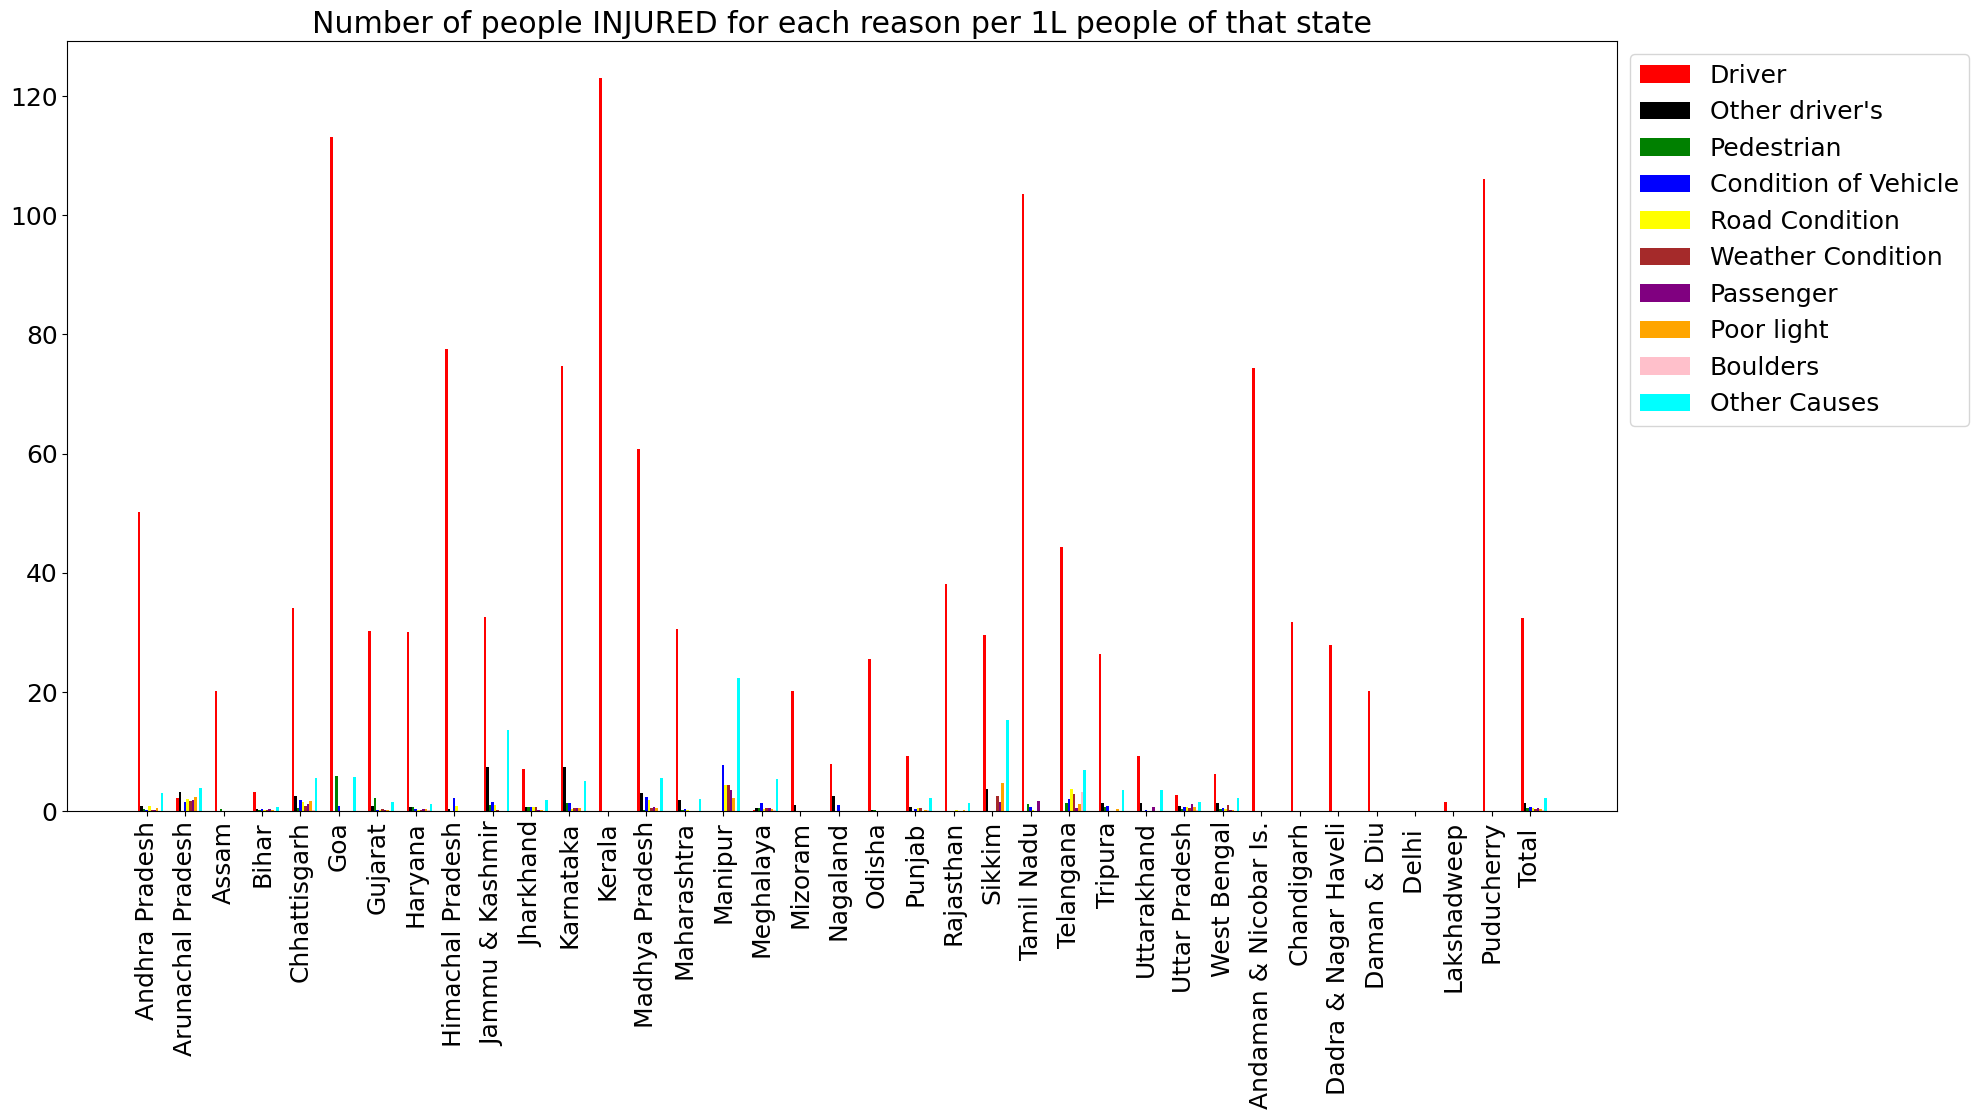

In [103]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})

plt.bar(UT-0.6, df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4, df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2, df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT, df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2, df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4, df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6, df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8, df5['Poor light-Number of Persons-Injured - 2014 per 1L people'], width=0.2, color='orange',align='center',label='Poor light')
plt.bar(UT+1.0, df5['Falling of boulders-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2, df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people'], width=0.2,color='cyan',align='center',label='Other Causes')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of people INJURED for each reason per 1L people of that state")
plt.show()


Number of ACCIDENTS for each reason per 1L people of that state.


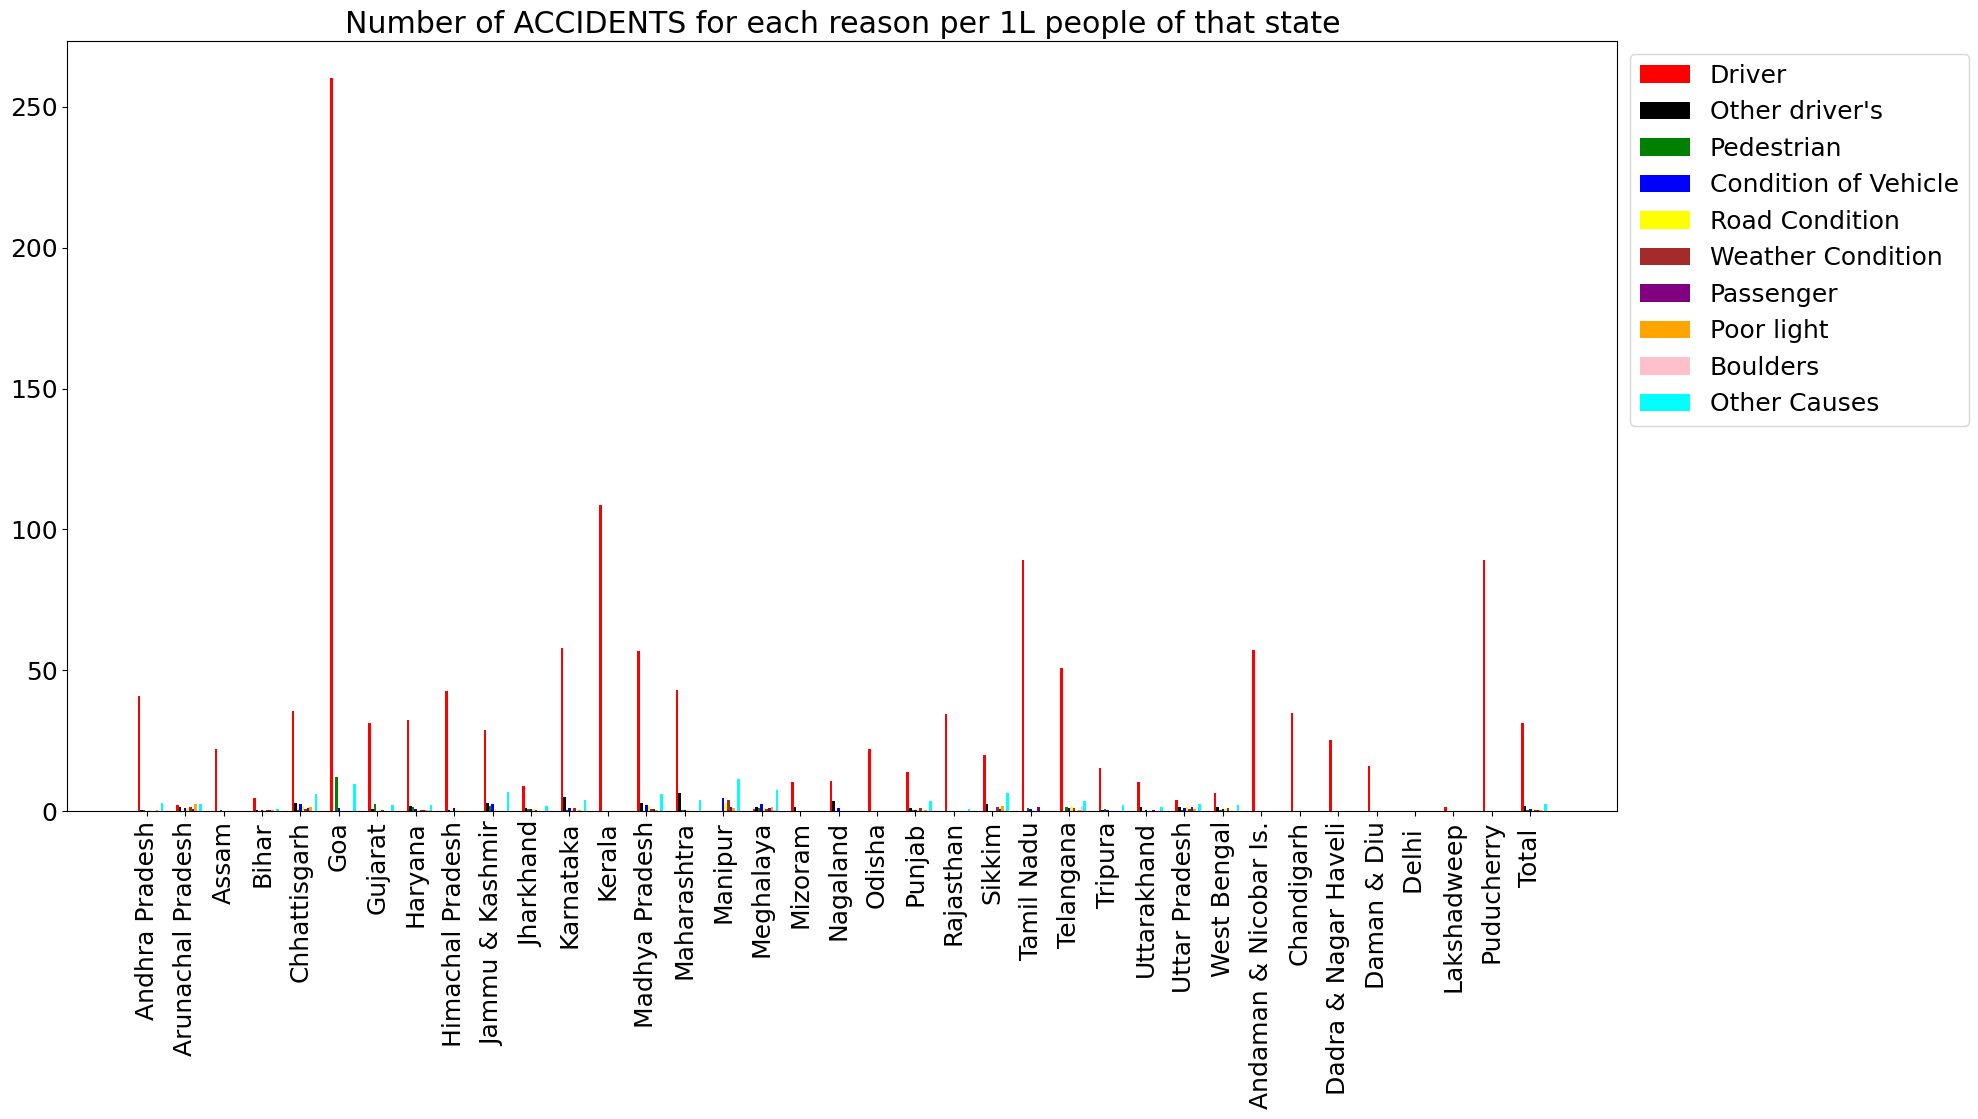

In [104]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})

plt.bar(UT-0.6,df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='r',align='center',label='Driver')
plt.bar(UT-0.4,df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='black',align='center',label='Other driver\'s')
plt.bar(UT-0.2,df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Pedestrian')
plt.bar(UT,df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Condition of Vehicle')
plt.bar(UT+0.2,df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Road Condition')
plt.bar(UT+0.4,df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Weather Condition')
plt.bar(UT+0.6,df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Passenger')
plt.bar(UT+0.8,df5['Poor light-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='orange',align='center',label='Poor light')
plt.bar(UT+1.0,df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='pink',align='center',label='Boulders')
plt.bar(UT+1.2,df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='cyan',align='center',label='Other Causes')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title("Number of ACCIDENTS for each reason per 1L people of that state")
plt.show()

Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FAULT OF THE DRIVER per 1L population of that state.

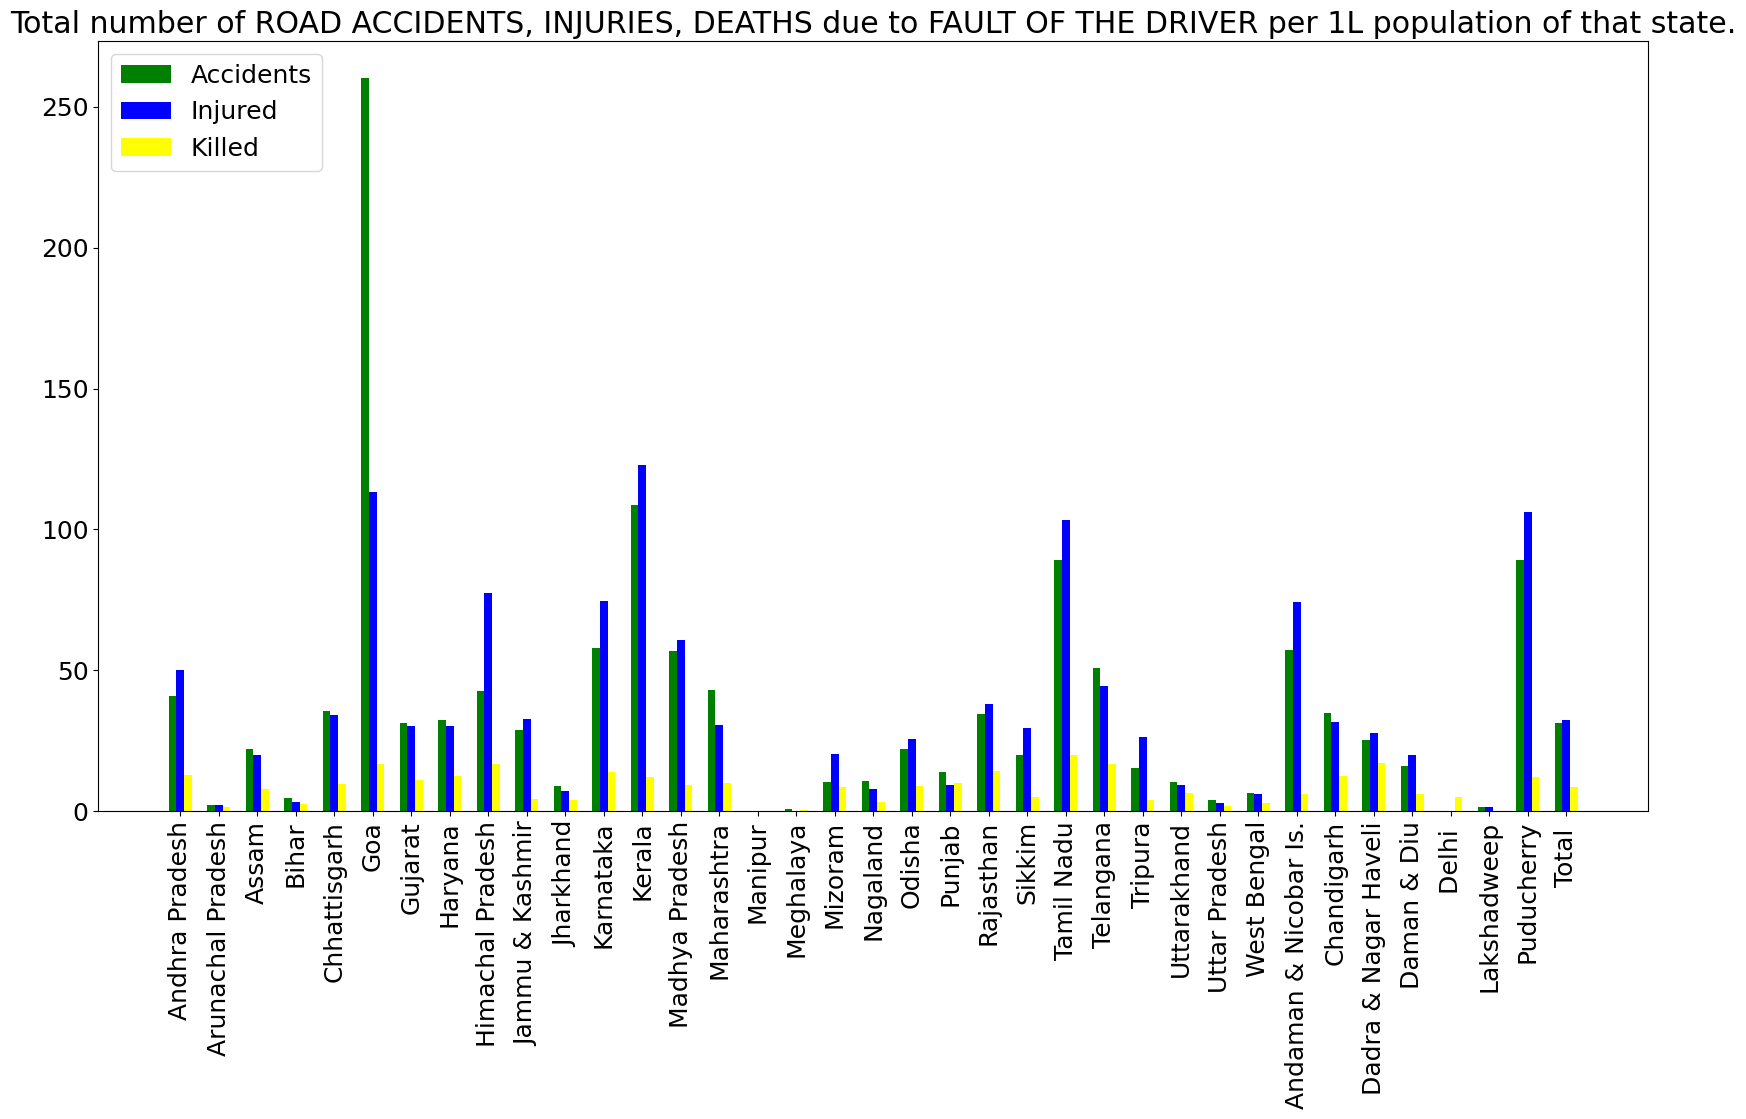

In [106]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])

plt.bar(UT-0.2,df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FAULT OF THE DRIVER per 1L population of that state.")
plt.show()

Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF DRIVER'S FROM OTHER VEHICLES per 1L people of that state

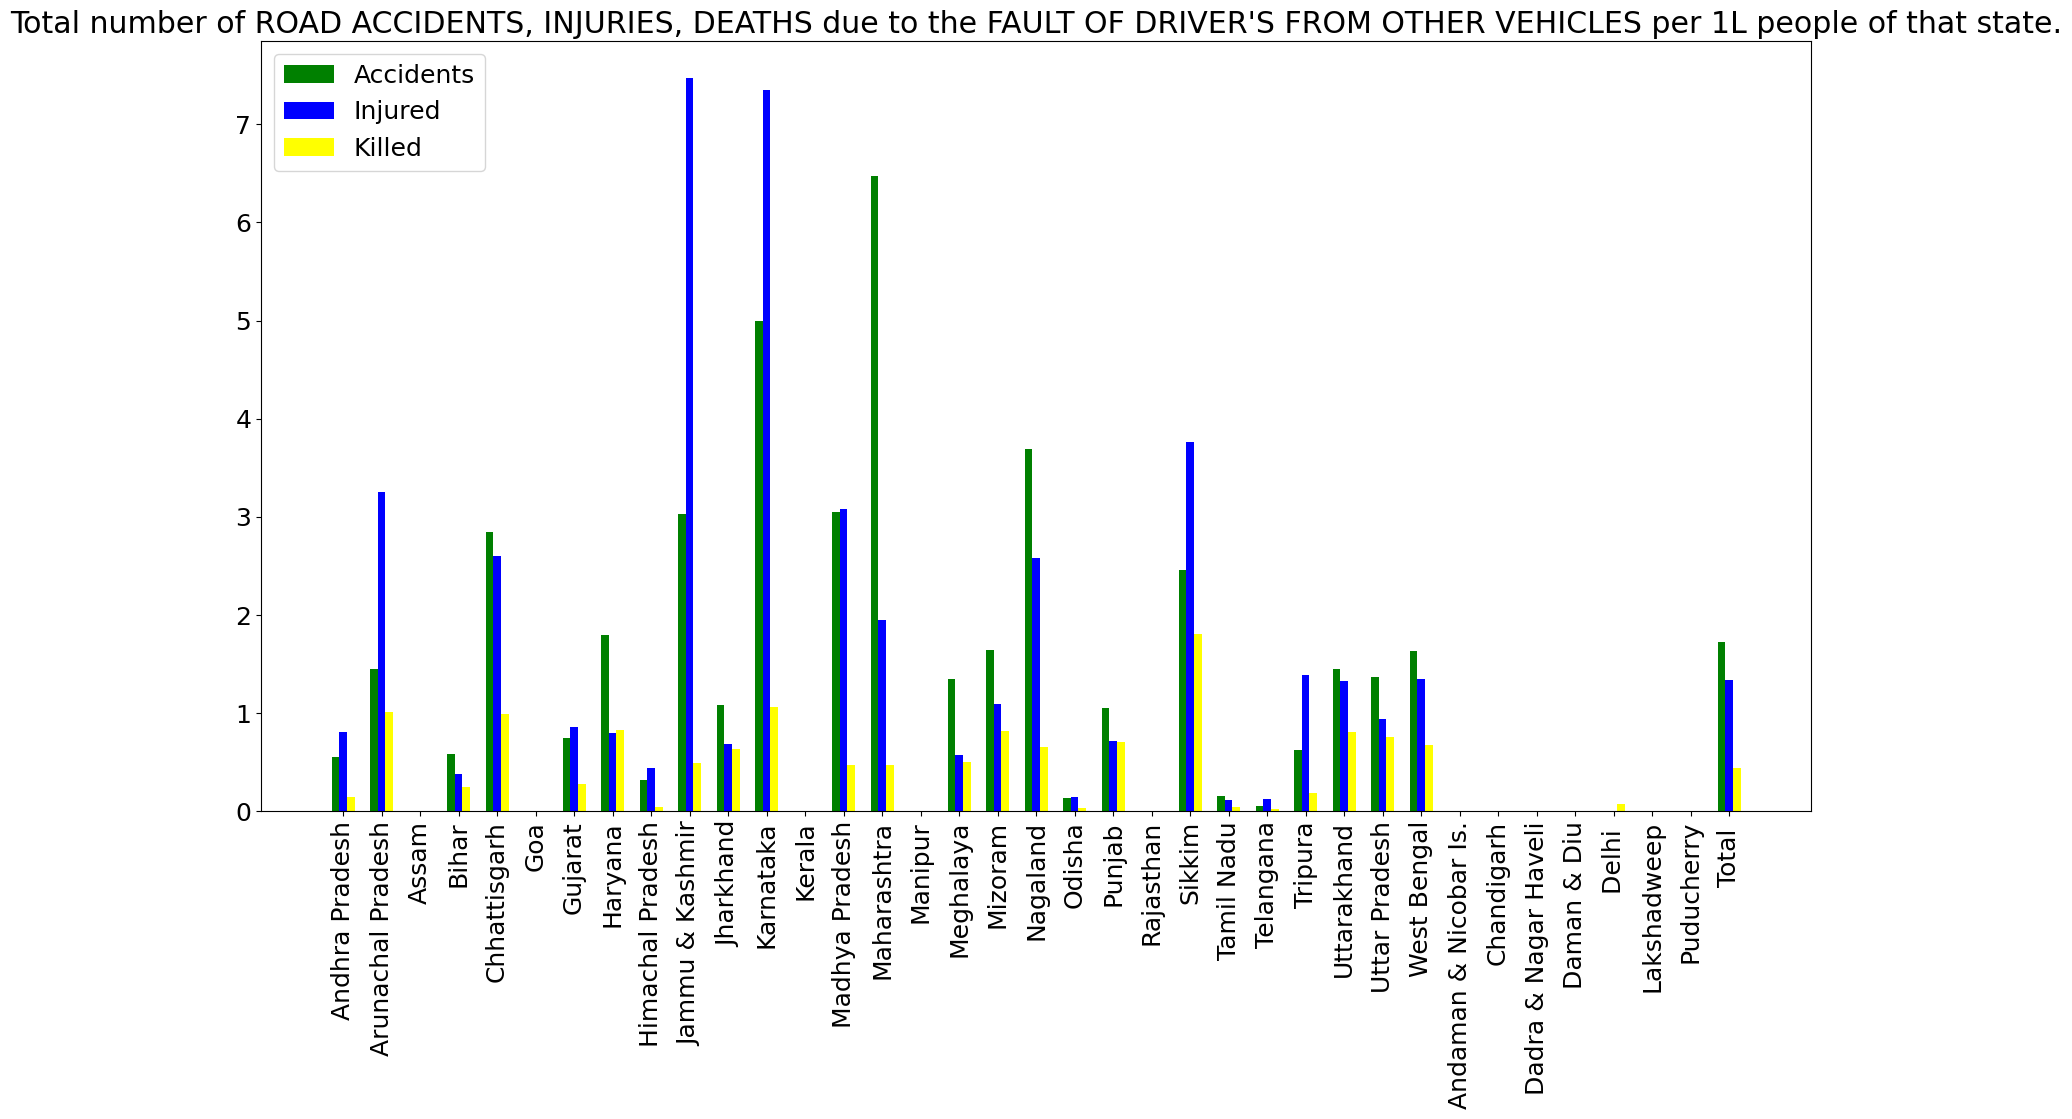

In [107]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})

plt.bar(UT-0.2,df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF DRIVER'S FROM OTHER VEHICLES per 1L people of that state.")
plt.show()

Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF PEDESTRIANS per 1L people of that state

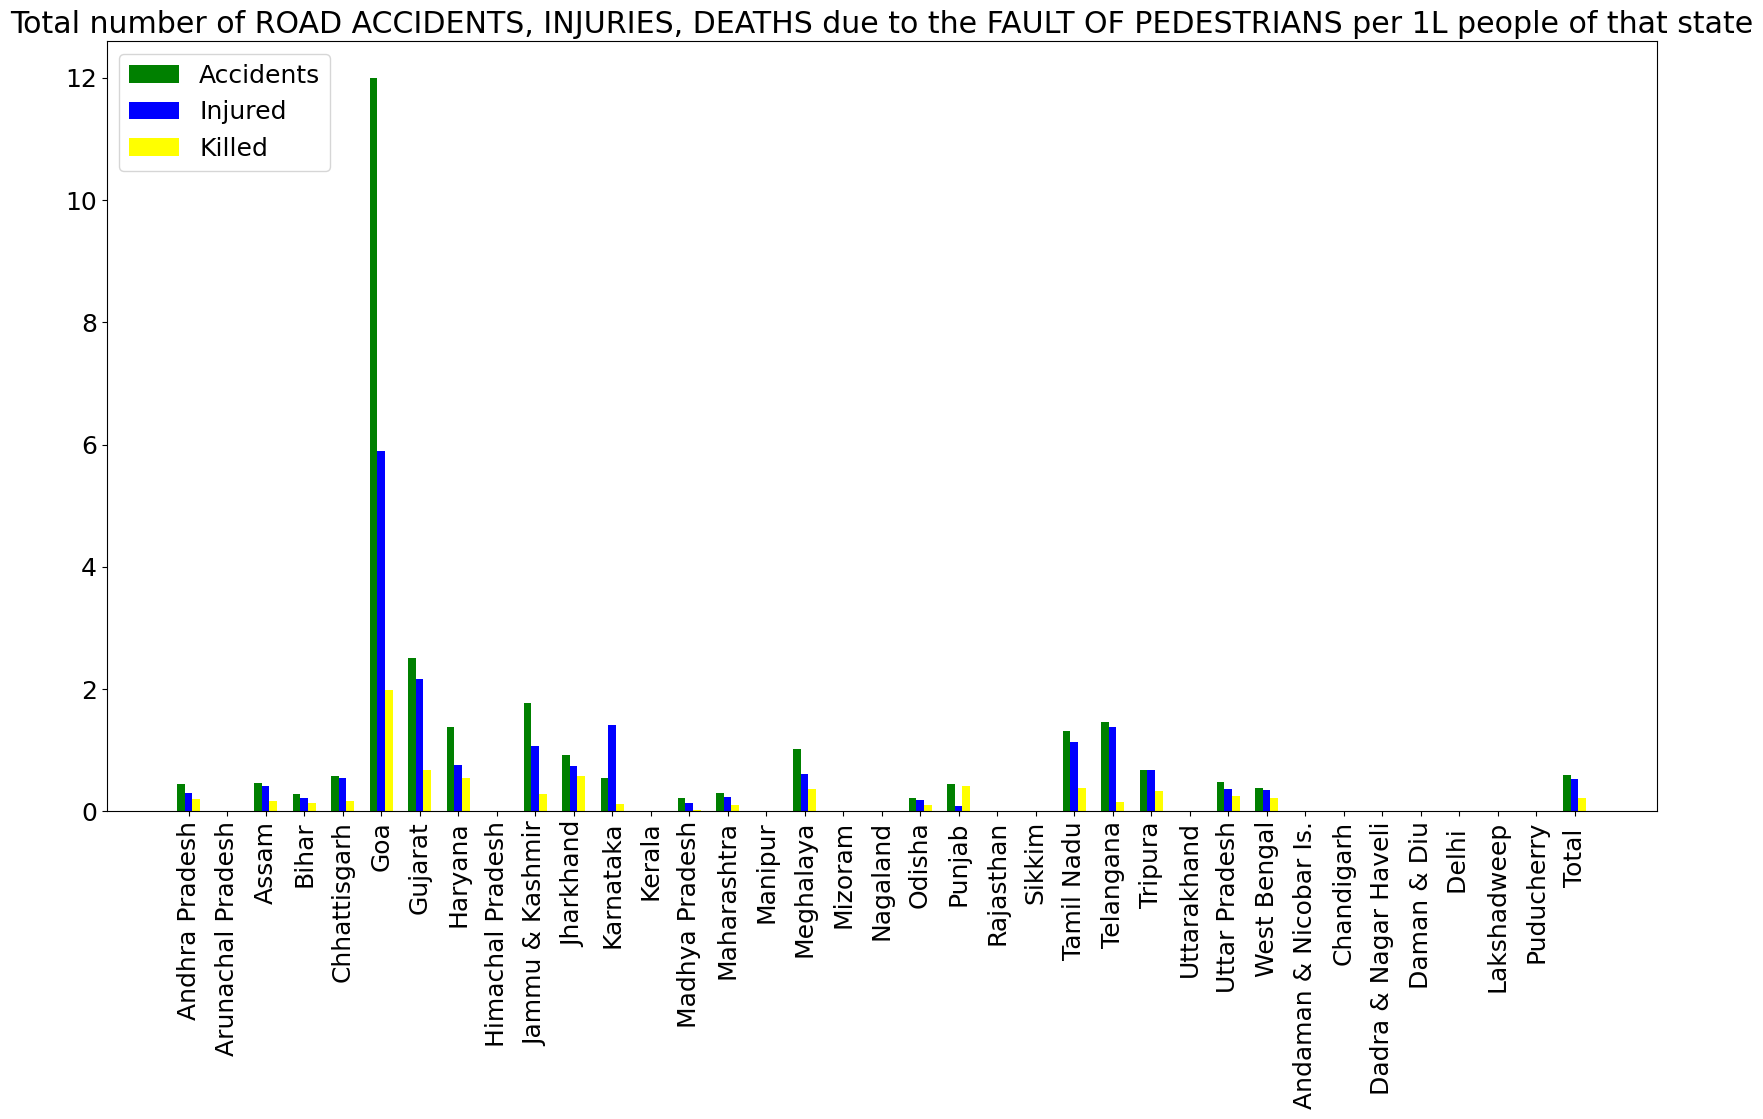

In [108]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})

plt.bar(UT-0.2,df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF PEDESTRIANS per 1L people of that state")
plt.show()

Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the DEFECTS IN THE VEHICLE per 1L people of that state

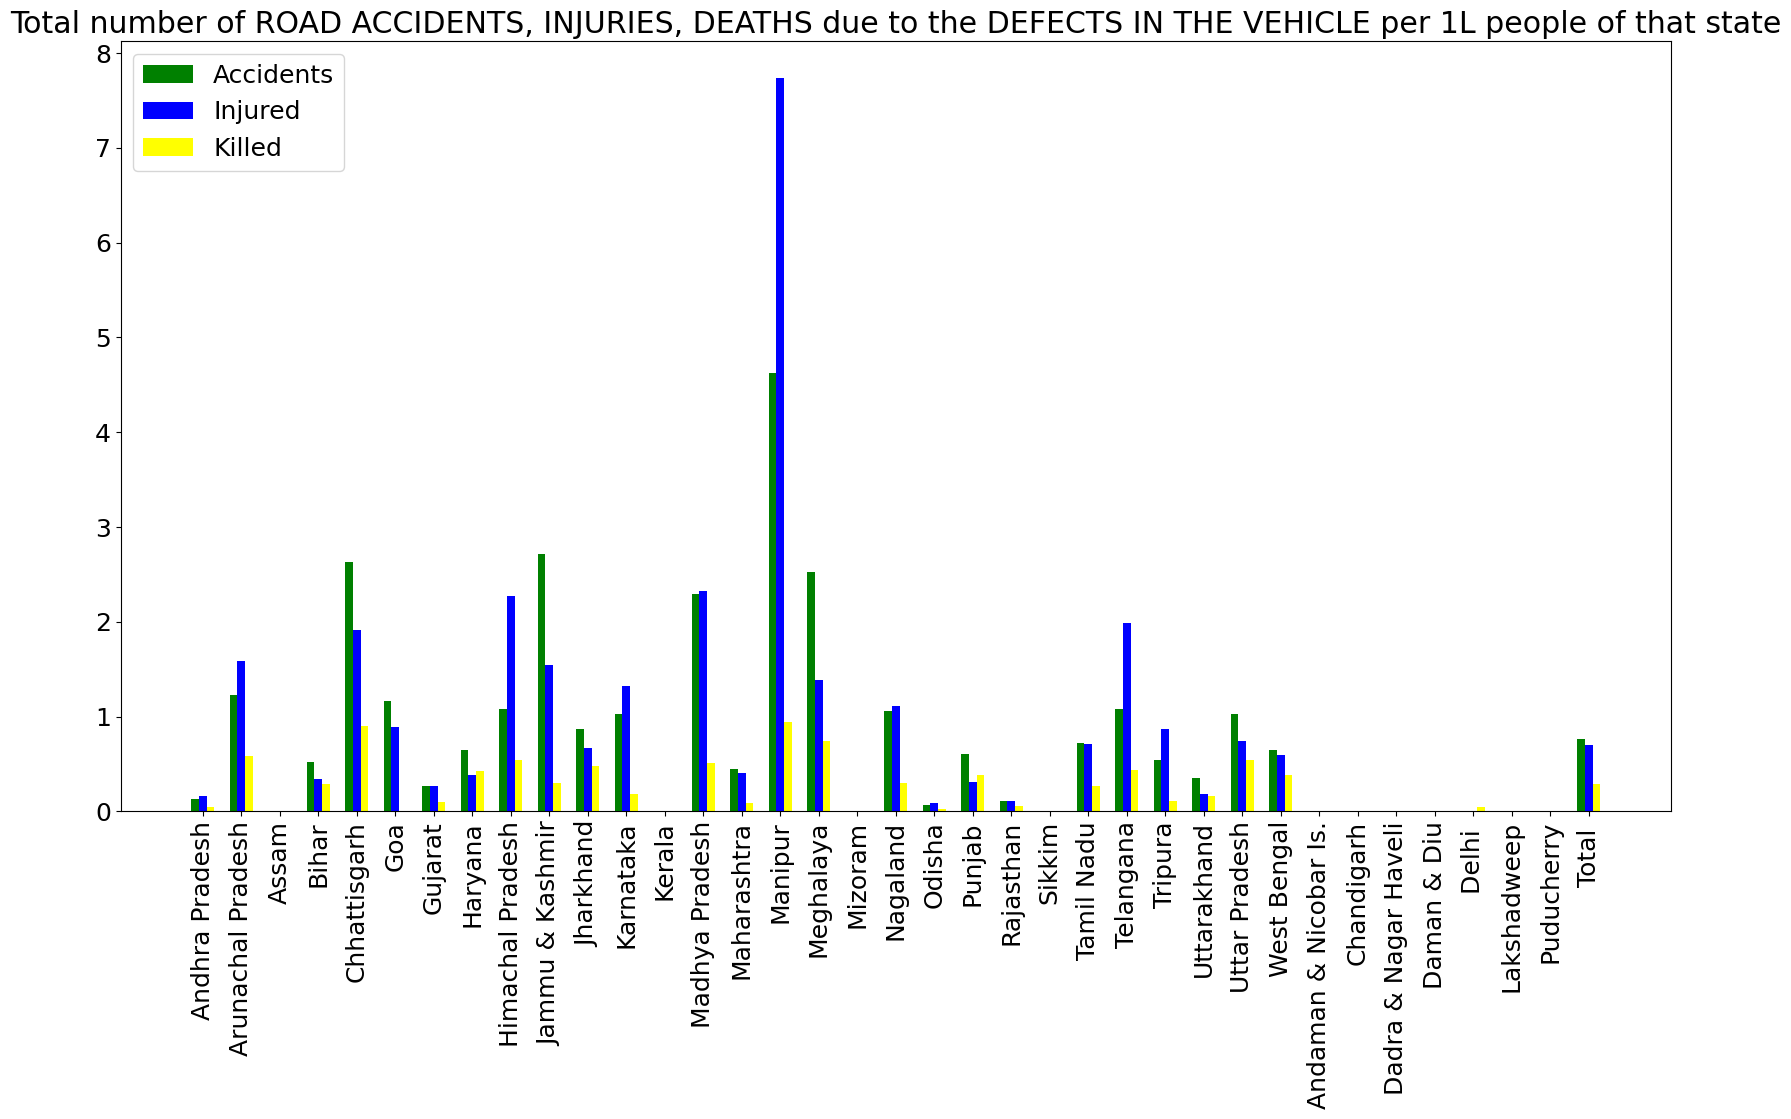

In [109]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})

plt.bar(UT-0.2,df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the DEFECTS IN THE VEHICLE per 1L people of that state")
plt.show()

Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to DEFECTS IN THE ROAD CONDITION per 1L people of that state.


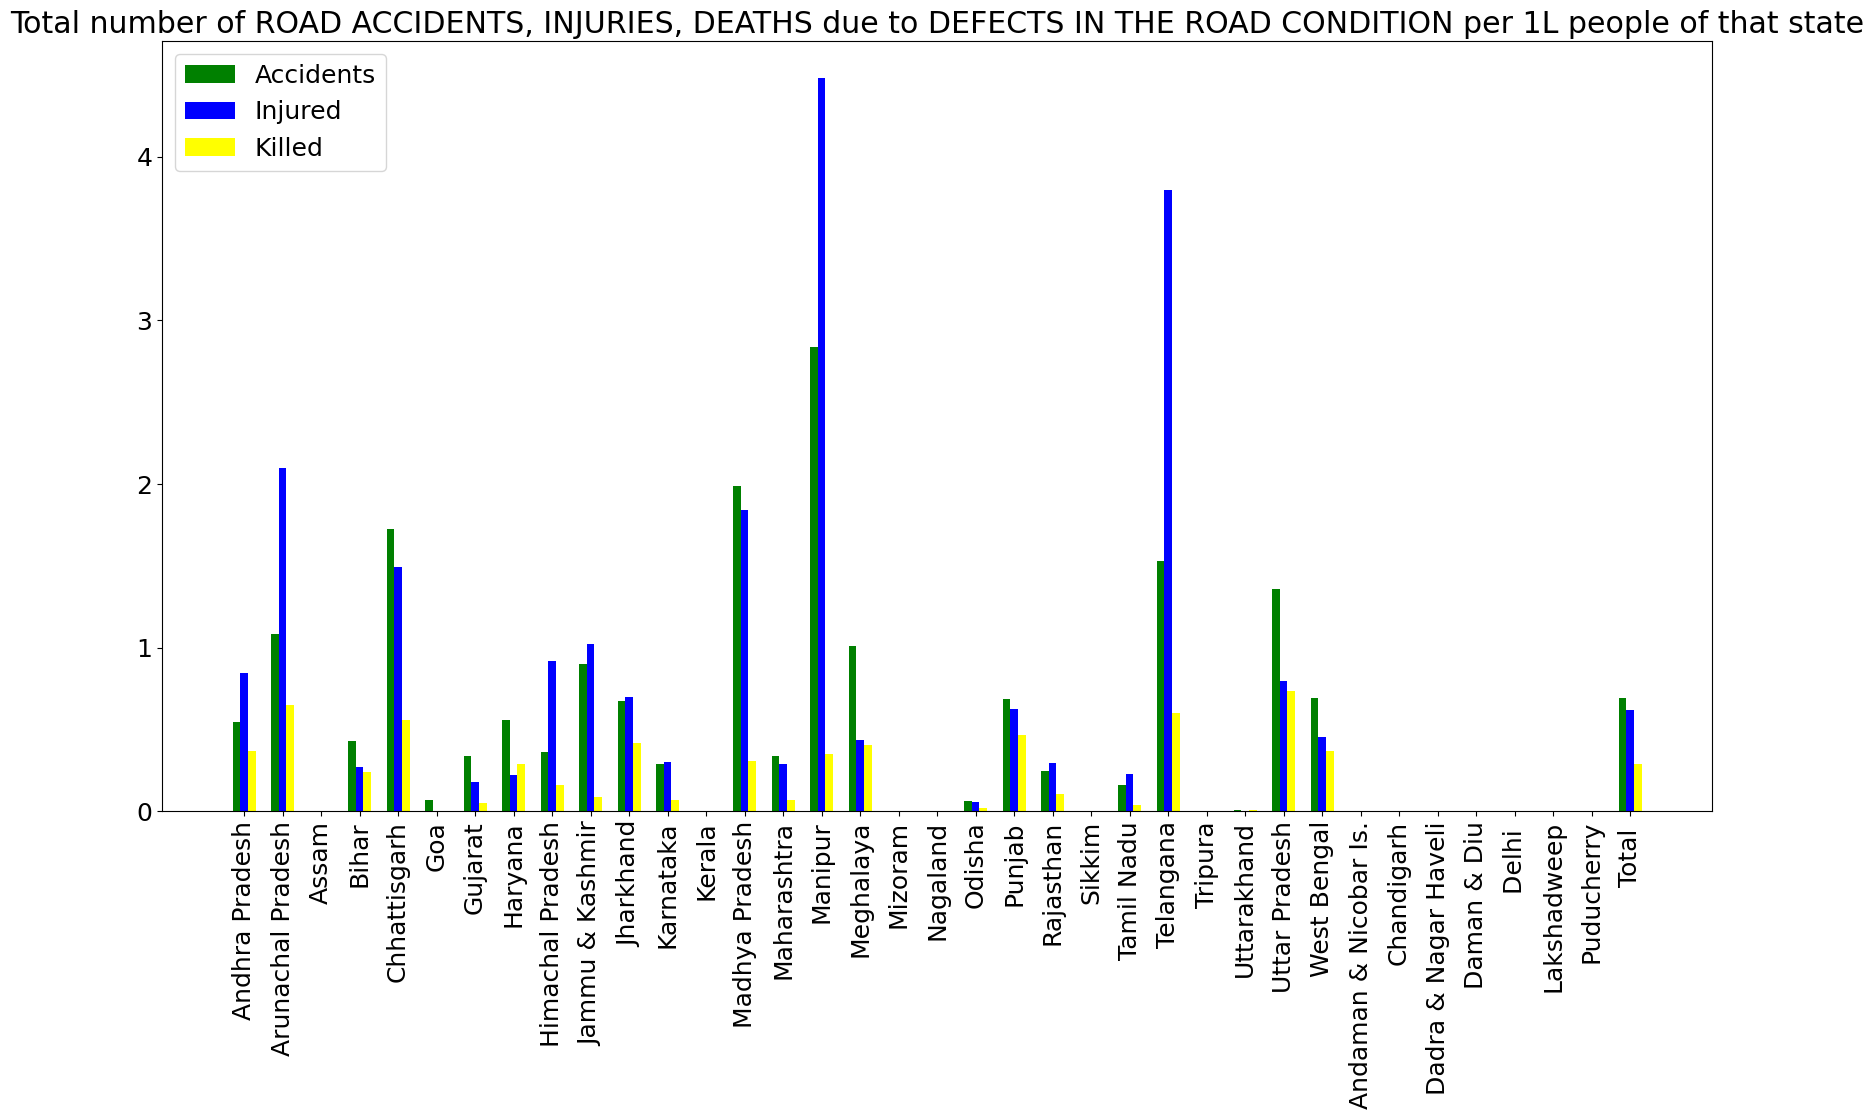

In [110]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})

plt.bar(UT-0.2,df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to DEFECTS IN THE ROAD CONDITION per 1L people of that state")
plt.show()

Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to WEATHER CONDITION per 1L people of that state.

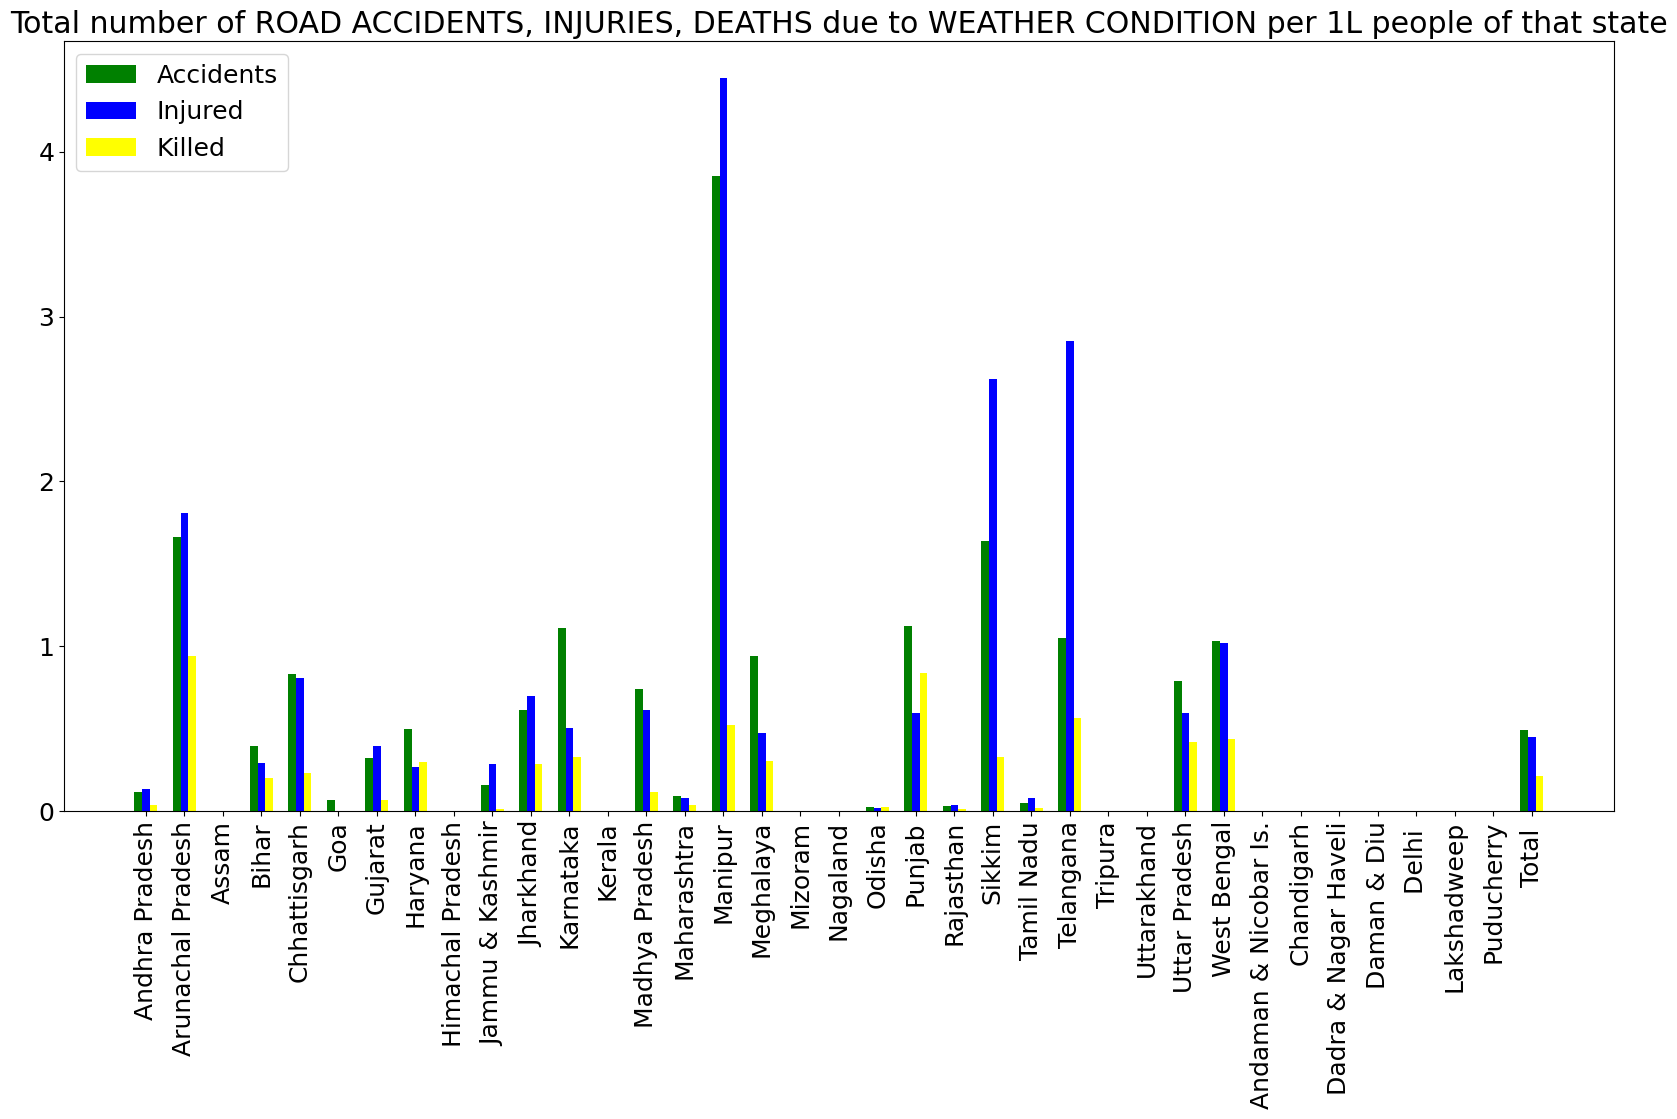

In [111]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})

plt.bar(UT-0.2,df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people'],width=0.2,color='g',align='center',label='Accidents')
plt.bar(UT,df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people'],width=0.2,color='b',align='center',label='Injured')
plt.bar(UT+0.2,df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to WEATHER CONDITION per 1L people of that state")
plt.show()

Total Accidents , Injured , Killed By all reasons in 2014 per 1L population

In [112]:
df5['Sum Total Road Accidents - 2014 per 1L people']=df5['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people']+df5['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people']+df5['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people']+\
    df5['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people']+df5['Weather Condition-Total No. of Road Accidents - 2014 per 1L people']+df5['Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people']+\
    df5['Poor light-Total No. of Road Accidents - 2014 per 1L people']+df5['Falling of boulders-Total No. of Road Accidents - 2014 per 1L people']+df5['Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people']+\
    df5['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people']

df5['Sum Total Number of Persons Killed - 2014 per 1L people']=df5['Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people']+df5['Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people']+df5['Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people']+\
    df5['Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people']+df5['Weather Condition-Number of Persons-Killed - 2014 per 1L people']+df5['Fault of Passenger-Number of Persons-Killed - 2014 per 1L people']+\
    df5['Poor light-Number of Persons-Killed - 2014 per 1L people']+df5['Falling of boulders-Number of Persons-Killed - 2014 per 1L people']+df5['Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people']+\
    df5['Fault of Driver-Number of Persons-Killed - 2014 per 1L people']

df5['Sum Total Number of Persons Injured - 2014 per 1L people']=df5['Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people']+df5['Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people']+df5['Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people']+\
    df5['Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people']+df5['Weather Condition-Number of Persons-Injured - 2014 per 1L people']+df5['Fault of Passenger-Number of Persons-Injured - 2014 per 1L people']+\
    df5['Poor light-Number of Persons-Injured - 2014 per 1L people']+df5['Falling of boulders-Number of Persons-Injured - 2014 per 1L people']+df5['Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people']+\
    df5['Fault of Driver-Number of Persons-Injured - 2014 per 1L people']

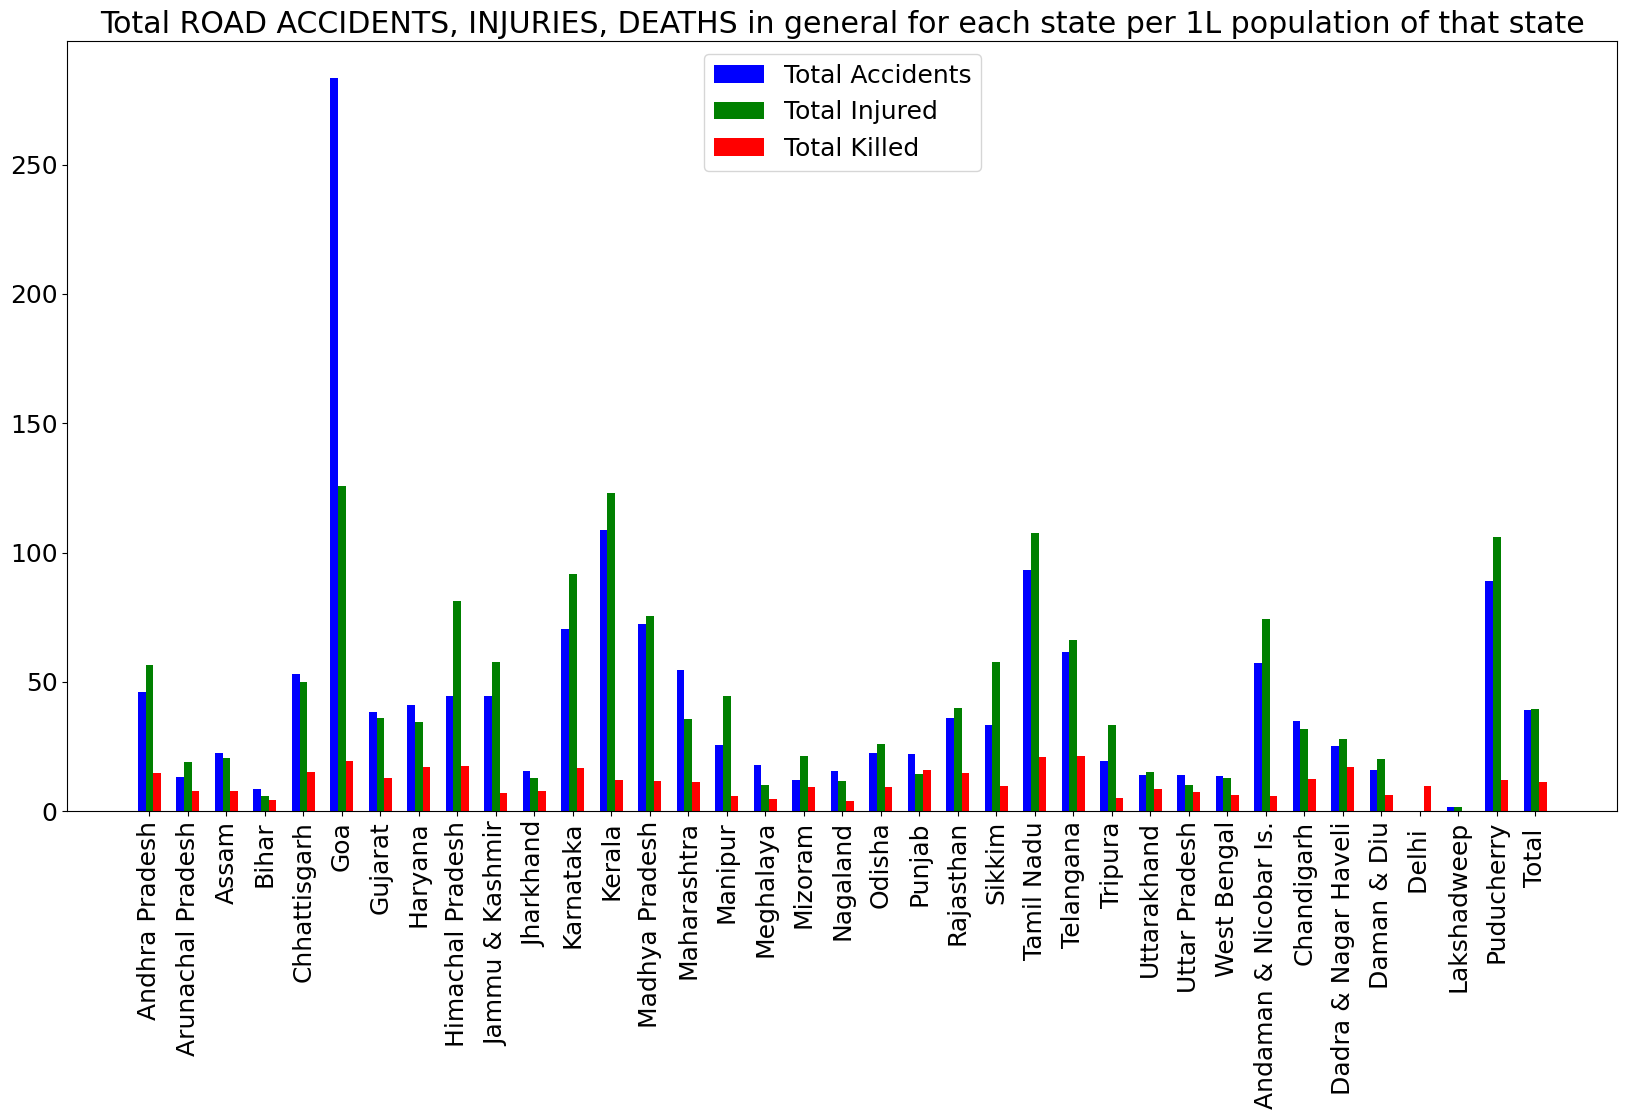

In [113]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})

plt.bar(UT-0.2,df5['Sum Total Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT,df5['Sum Total Number of Persons Injured - 2014 per 1L people'],width=0.2,color='g',align='center',label='Total Injured')
plt.bar(UT+0.2,df5['Sum Total Number of Persons Killed - 2014 per 1L people'],width=0.2,color='r',align='center',label='Total Killed')

plt.xticks(UT,df5['States/UTs'],rotation='vertical')
plt.title("Total ROAD ACCIDENTS, INJURIES, DEATHS in general for each state per 1L population of that state")
plt.legend(loc="best")
plt.show()

# DF6 -
#This dataset tells about the number of accidents happening along different types of vehicles.

#df6 = typeOfVehicle.csv

In [114]:
df6 = pd.read_csv(r"C:\Users\Prathamesh\Downloads\Databases-20231228T062726Z-001\Databases\typeOfVehicle.csv")
df6.head()

Sl. No.         States/UTs  \
0       1     Andhra Pradesh   
1       2  Arunachal Pradesh   
2       3              Assam   
3       4              Bihar   
4       5       Chhattisgarh   

   Two-Wheelers - Number of Road Accidents - Fatal - 2014  \
0                                               1961        
1                                                 15        
2                                                489        
3                                                769        
4                                               1074        

   Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people  \
0                                           3.741606                      
1                                           1.084029                      
2                                           1.567028                      
3                                           0.738717                      
4                                           4.204313                      

   Two-Wheelers - Number of Road Accidents - Total - 2014  \
0                                               7239        
1                                                 34        
2                                               1508        
3                                               1750        
4                                               4787        

   Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people  \
0                                          13.812077                      
1                                           2.457132                      
2                                           4.832470                      
3                                           1.681085                      
4                                          18.739334                      

   Two-Wheelers - Number of Persons - Killed - 2014  \
0                                              2003   
1                                                21   
2                                               537   
3                                               820   
4                                              1126   

   Two-Wheelers - Number of Persons - Killed - 2014 per 1L people  \
0                                           3.821742                
1                                           1.517640                
2                                           1.720846                
3                                           0.787708                
4                                           4.407873                

   Two-Wheelers - Number of Persons - Injured - 2014  \
0                                               7333   
1                                                 30   
2                                               1342   
3                                               1131   
4                                               4295   

   Two-Wheelers - Number of Persons - Injured - 2014 per 1L people  ...  \
0                                          13.991430                ...   
1                                           2.168058                ...   
2                                           4.300513                ...   
3                                           1.086461                ...   
4                                          16.813336                ...   

   Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people  \
0                                           2.520480                         
1                                           0.000000                         
2                                           2.868077                         
3                                           0.425555                         
4                                           4.662324                         

   Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014  \
0                                                466                  
1                           

In [115]:
row, column = df6.shape
round(((row - df6.isnull().sum())/row)*100)

Sl. No.                                                                                 100.0
States/UTs                                                                              100.0
Two-Wheelers - Number of Road Accidents - Fatal - 2014                                  100.0
Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people                    100.0
Two-Wheelers - Number of Road Accidents - Total - 2014                                  100.0
Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people                    100.0
Two-Wheelers - Number of Persons - Killed - 2014                                        100.0
Two-Wheelers - Number of Persons - Killed - 2014 per 1L people                          100.0
Two-Wheelers - Number of Persons - Injured - 2014                                       100.0
Two-Wheelers - Number of Persons - Injured - 2014 per 1L people                         100.0
Auto-Rickshaws - Number of Road Accidents - Fatal - 2014    

In [116]:
df6.dropna(axis = 0, how = 'any', inplace = True)

Number of Total Accidents for each vehicle type per 1L people of that state.

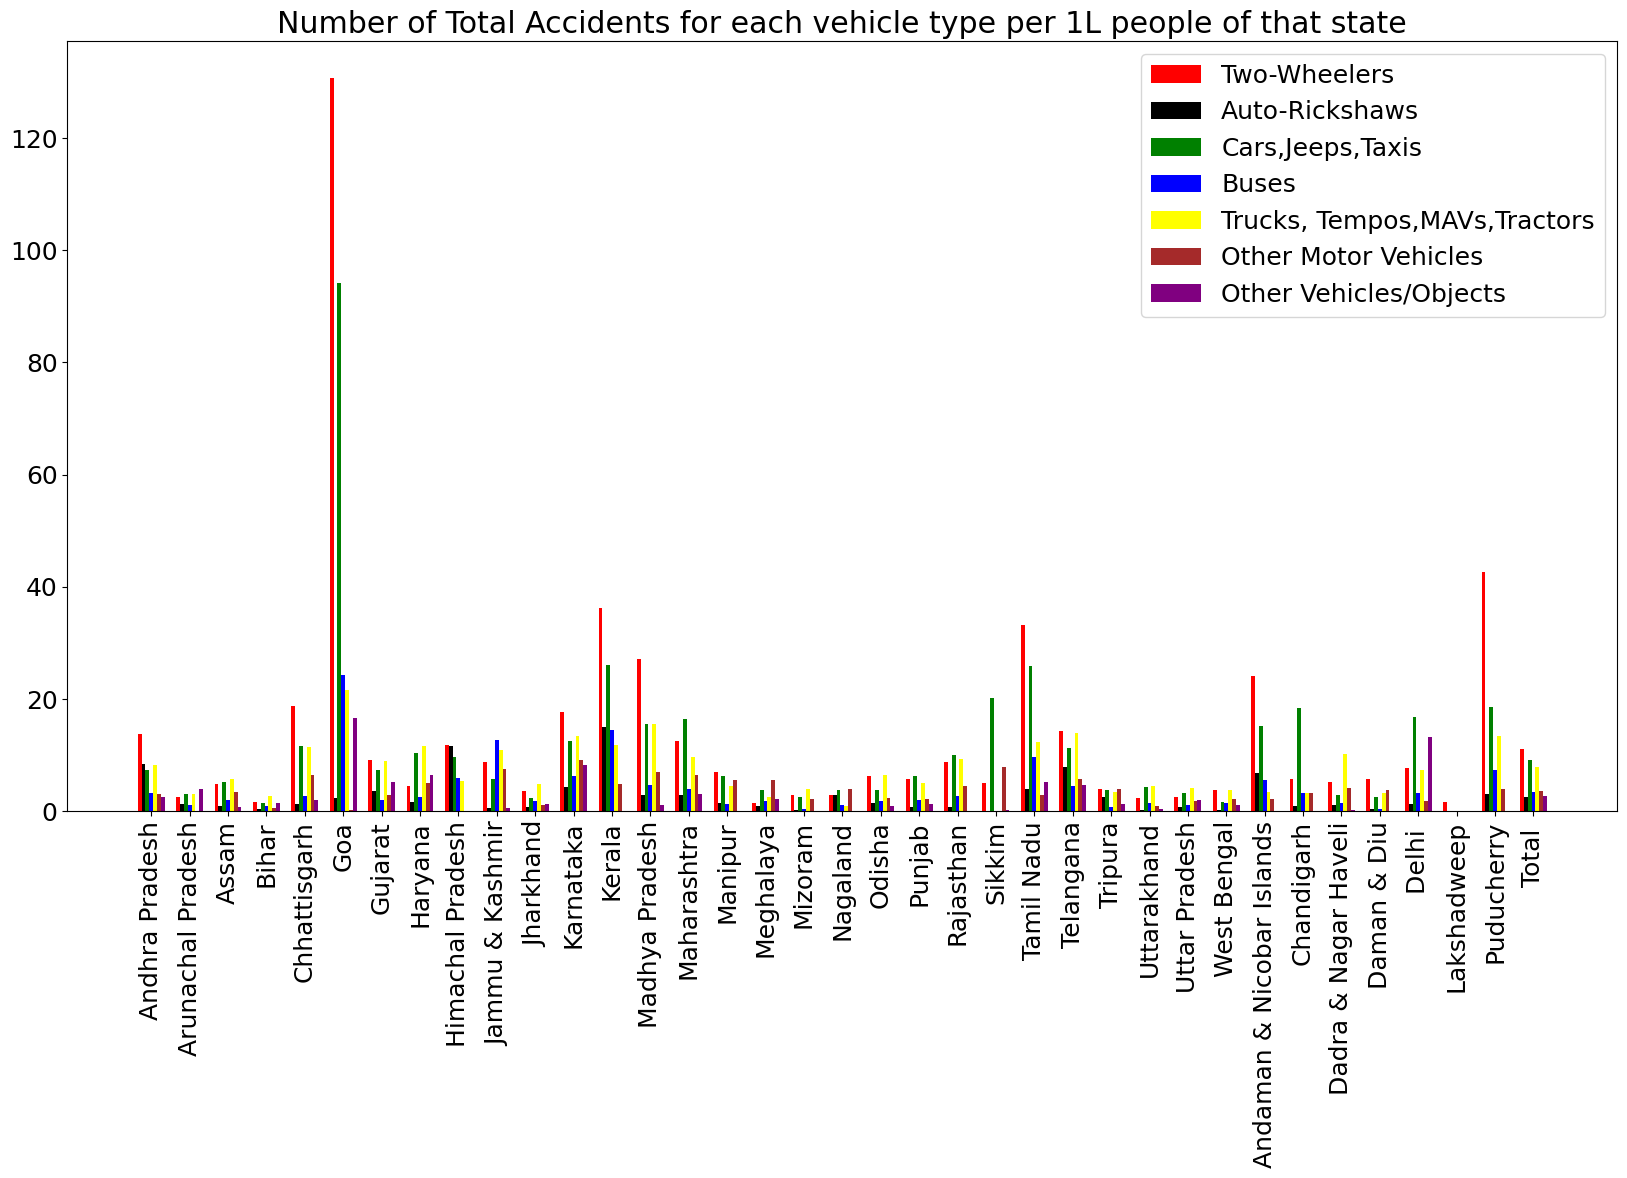

In [117]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])
UT=UT*2

plt.bar(UT-0.6,df6['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='r',align='center',label='Two-Wheelers')
plt.bar(UT-0.4,df6['Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='black',align='center',label='Auto-Rickshaws')
plt.bar(UT-0.2,df6['Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='g',align='center',label='Cars,Jeeps,Taxis')
plt.bar(UT,df6['Buses - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Buses')
plt.bar(UT+0.2,df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Trucks, Tempos,MAVs,Tractors')
plt.bar(UT+0.4,df6['Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Other Motor Vehicles')
plt.bar(UT+0.6,df6['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Other Vehicles/Objects')

plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Total Accidents for each vehicle type per 1L people of that state")
plt.show()

Number of Persons Killed for each vehicle type per 1L people of that state.

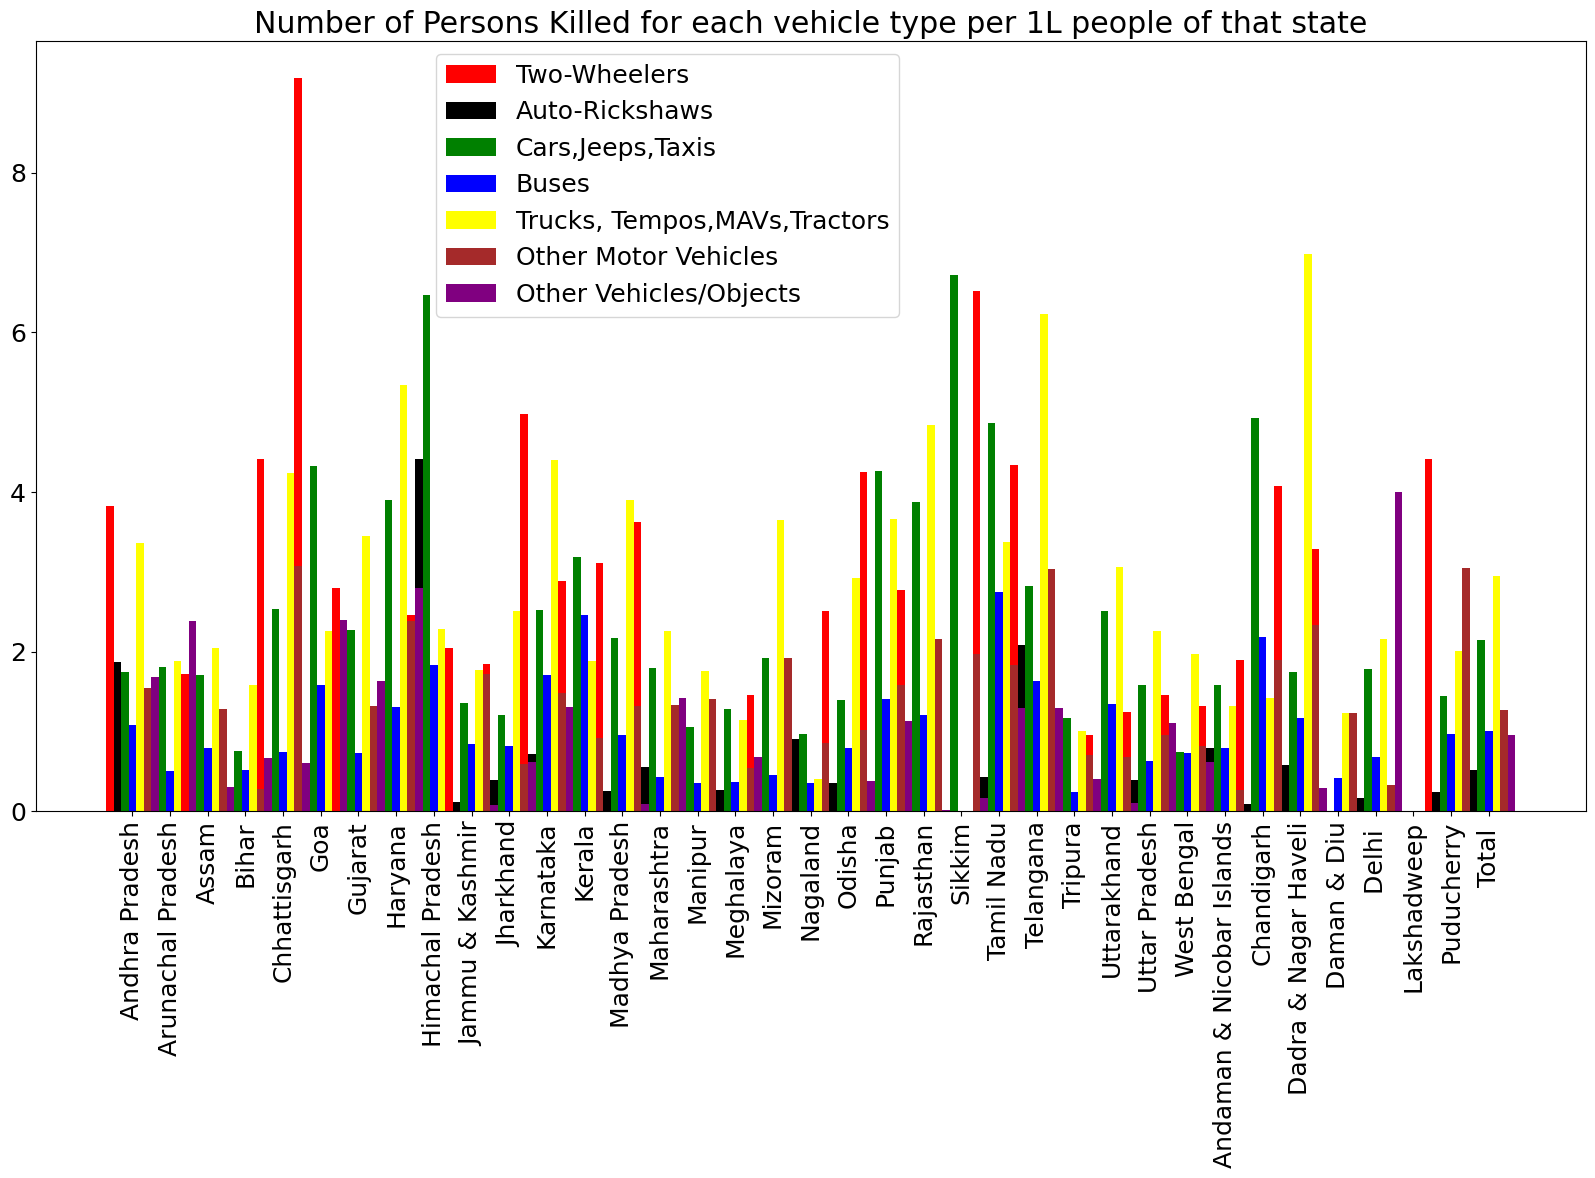

In [120]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})

plt.bar(UT-0.6,df6['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='r',align='center',label='Two-Wheelers')
plt.bar(UT-0.4,df6['Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='black',align='center',label='Auto-Rickshaws')
plt.bar(UT-0.2,df6['Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Cars,Jeeps,Taxis')
plt.bar(UT,df6['Buses - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='b',align='center',label='Buses')
plt.bar(UT+0.2,df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Trucks, Tempos,MAVs,Tractors')
plt.bar(UT+0.4,df6['Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='brown',align='center',label='Other Motor Vehicles')
plt.bar(UT+0.6,df6['Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='purple',align='center',label='Other Vehicles/Objects')

plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc='upper left', bbox_to_anchor=(0.25,1))
plt.title("Number of Persons Killed for each vehicle type per 1L people of that state")
plt.show()

Total accidents, fatal accidents, killed and injured for each state per 1L people of that state.

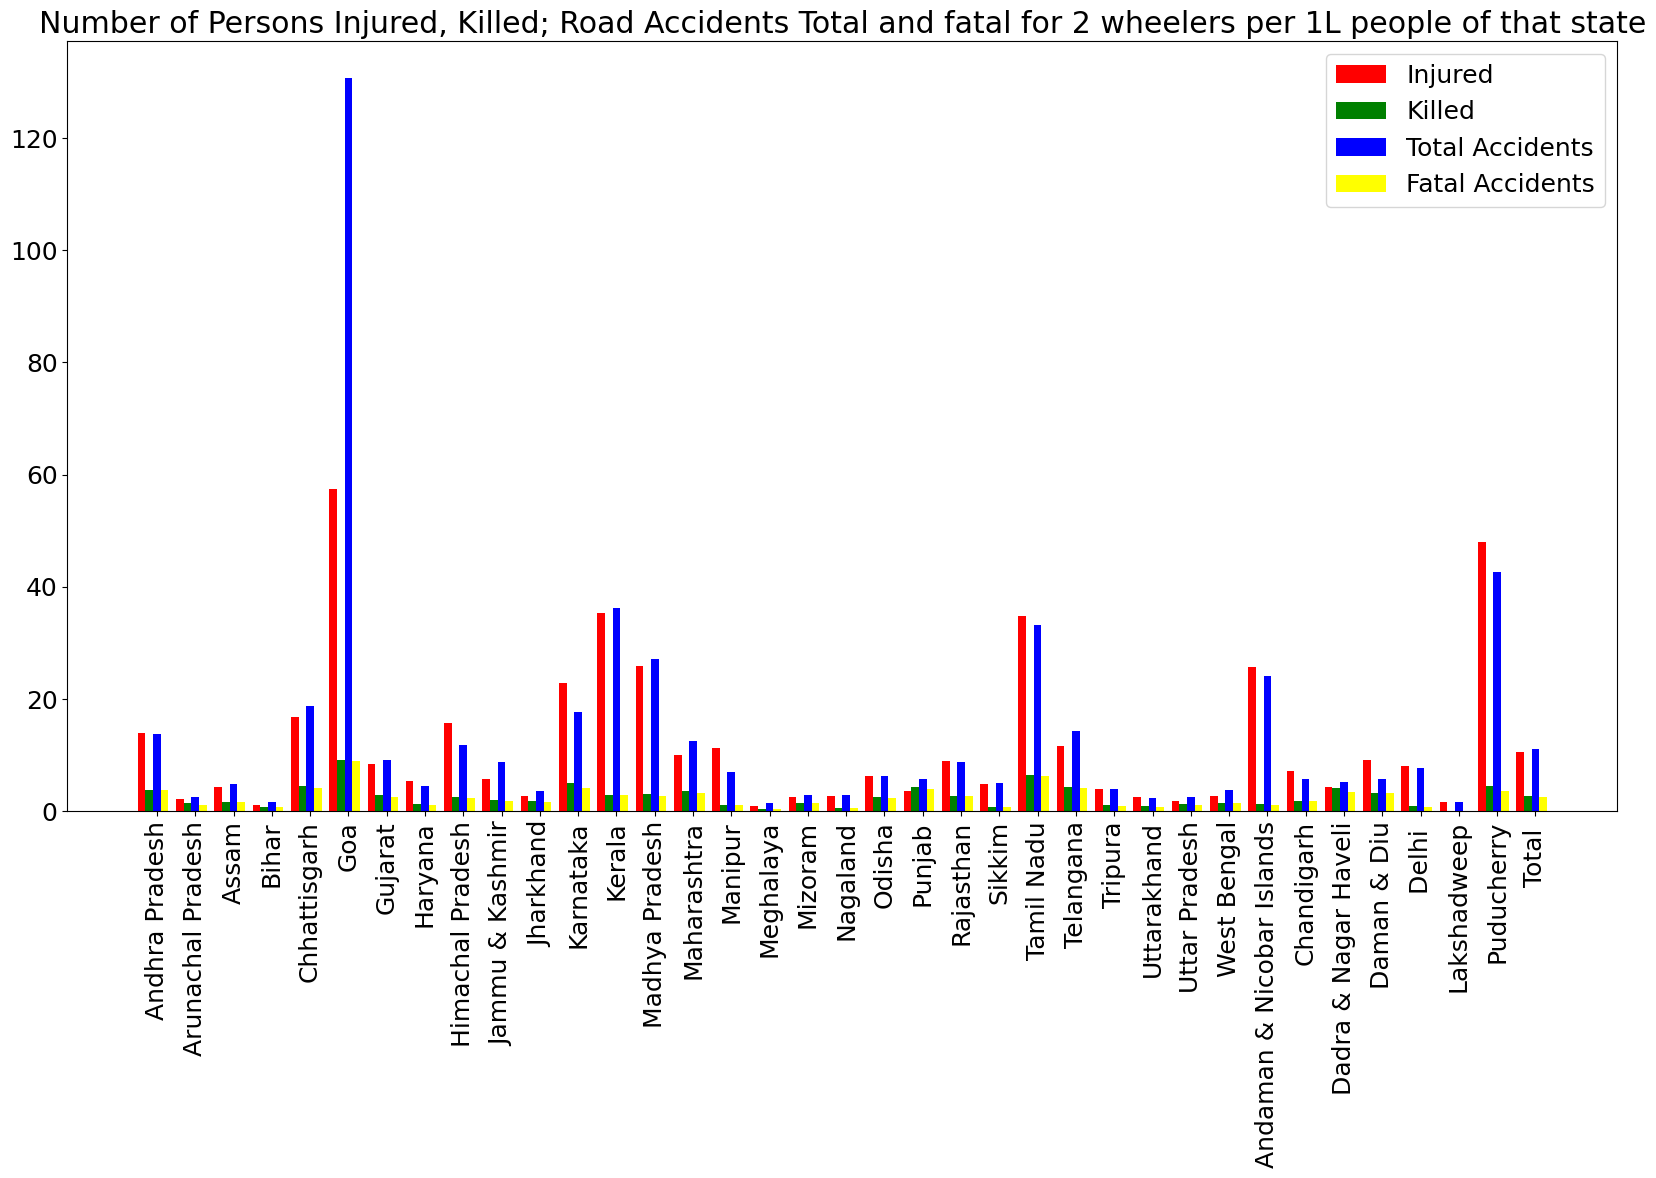

In [119]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})
UT=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])

plt.bar(UT-0.4,df6['Two-Wheelers - Number of Persons - Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Injured')
plt.bar(UT-0.2,df6['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Killed')
plt.bar(UT,df6['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Accidents')
plt.bar(UT+0.2,df6['Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Fatal Accidents')

plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Number of Persons Injured, Killed; Road Accidents Total and fatal for 2 wheelers per 1L people of that state")
plt.show()

Total accidents, fatal accidents, killed and injured for each state per 1L people of that state.

In [121]:
df6['Sum Total Road Accidents - 2014 per 1L people']=df6['Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people']+df6['Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people']+df6['Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people']+\
    df6['Buses - Number of Road Accidents - Total - 2014 per 1L people']+df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people']+df6['Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people']+\
    df6['Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people']

df6['Sum Total Number of Persons Killed - 2014 per 1L people']=df6['Two-Wheelers - Number of Persons - Killed - 2014 per 1L people']+df6['Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people']+df6['Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people']+\
    df6['Buses - Number of Persons - Killed - 2014 per 1L people']+df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people']+df6['Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people']+\
    df6['Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people']

df6['Sum Total Number of Persons Injured - 2014 per 1L people']=df6['Two-Wheelers - Number of Persons - Injured - 2014 per 1L people']+df6['Auto-Rickshaws - Number of Persons - Injured - 2014 per 1L people']+df6['Cars, Jeeps,Taxis - Number of Persons - Injured - 2014 per 1L people']+\
    df6['Buses - Number of Persons - Injured - 2014 per 1L people']+df6['Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014 per 1L people']+df6['Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people']+\
    df6['Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people']

df6['Sum Total Fatal Road Accidents - 2014 per 1L people']=df6['Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people']+df6['Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people']+df6['Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people']+\
    df6['Buses - Number of Road Accidents - Fatal - 2014 per 1L people']+df6['Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people']+df6['Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people']+\
    df6['Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people']

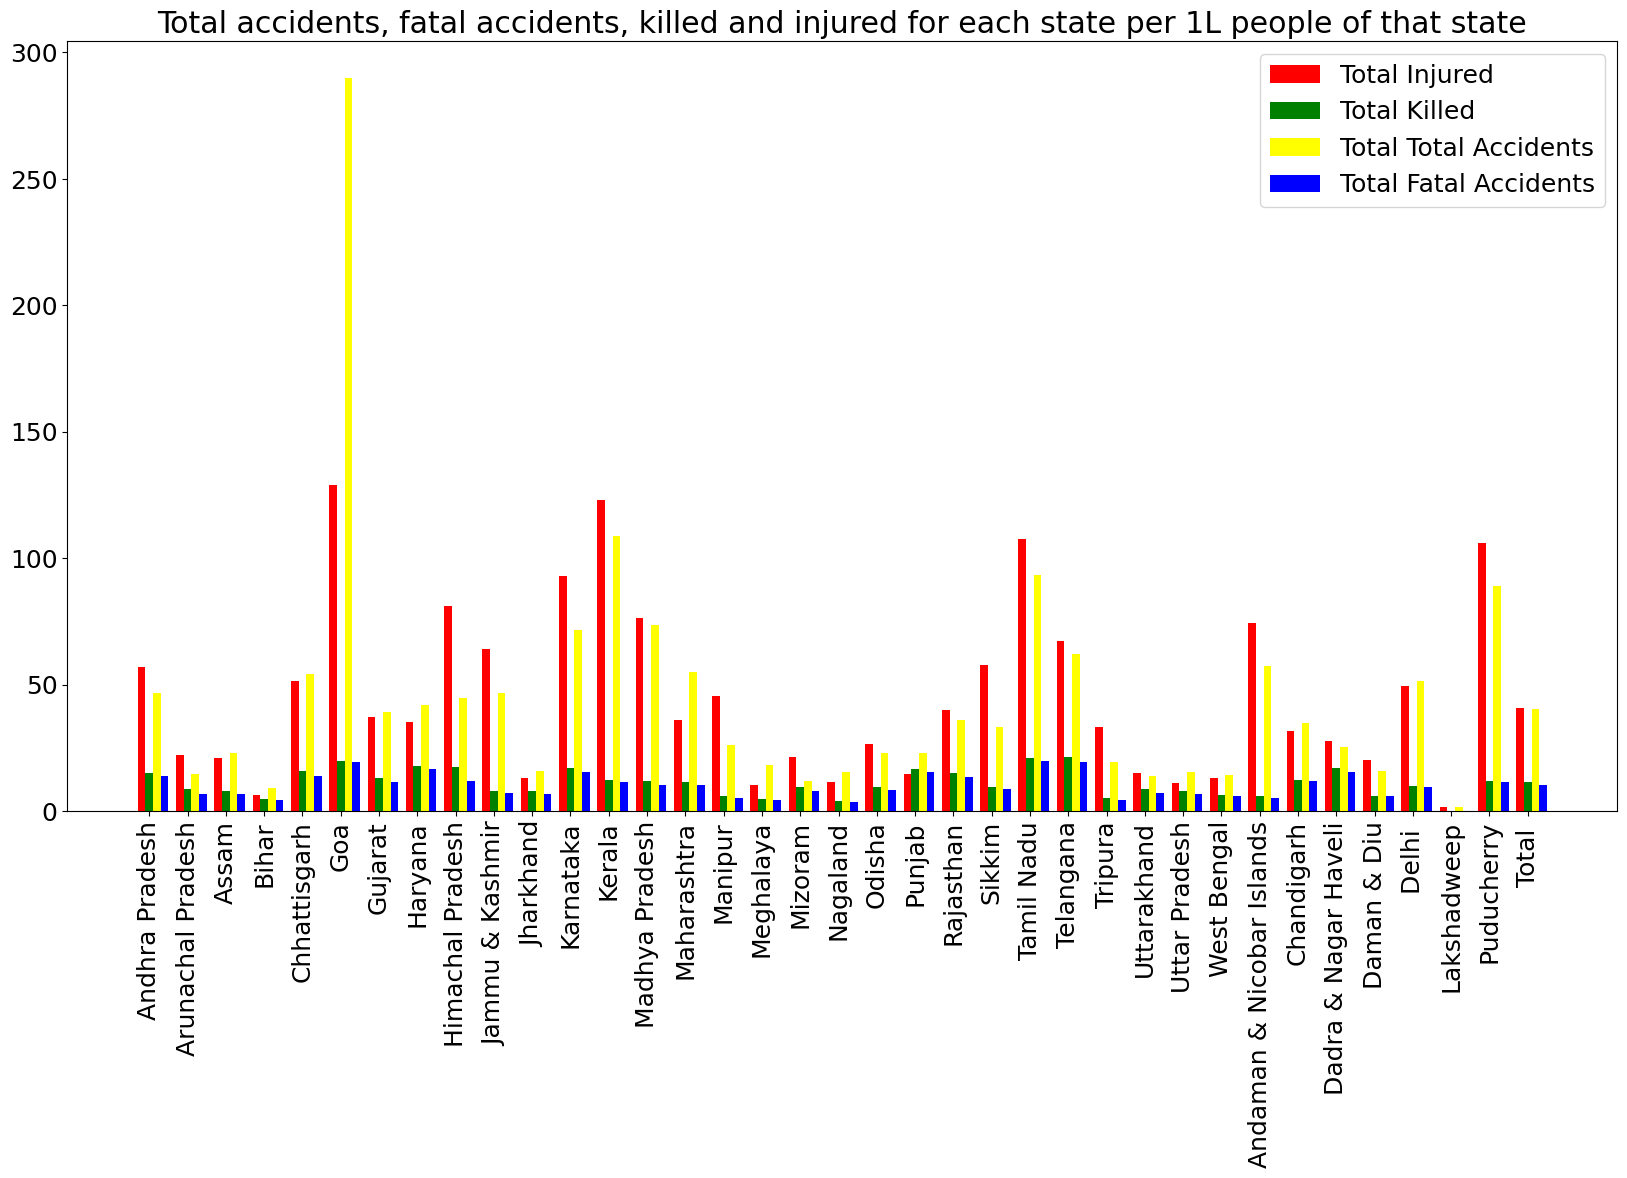

In [122]:
plt.figure(figsize=(20,10))
plt.rcParams.update = ({'font.size':18})

plt.bar(UT-0.2,df6['Sum Total Number of Persons Injured - 2014 per 1L people'],width=0.2,color='r',align='center',label='Total Injured')
plt.bar(UT,df6['Sum Total Number of Persons Killed - 2014 per 1L people'],width=0.2,color='g',align='center',label='Total Killed')
plt.bar(UT+0.2,df6['Sum Total Road Accidents - 2014 per 1L people'],width=0.2,color='yellow',align='center',label='Total Total Accidents')
plt.bar(UT+0.4,df6['Sum Total Fatal Road Accidents - 2014 per 1L people'],width=0.2,color='b',align='center',label='Total Fatal Accidents')

plt.xticks(UT,df6['States/UTs'],rotation='vertical')
plt.legend(loc="best")
plt.title("Total accidents, fatal accidents, killed and injured for each state per 1L people of that state")
plt.show()

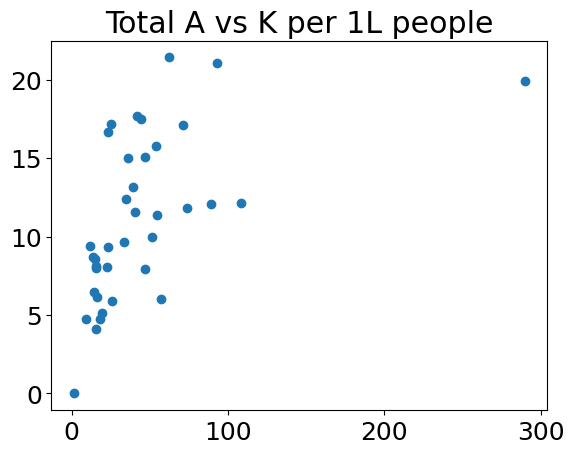

In [123]:
plt.scatter(df6['Sum Total Road Accidents - 2014 per 1L people'],df6['Sum Total Number of Persons Killed - 2014 per 1L people'])
plt.title("Total A vs K per 1L people")
plt.show()

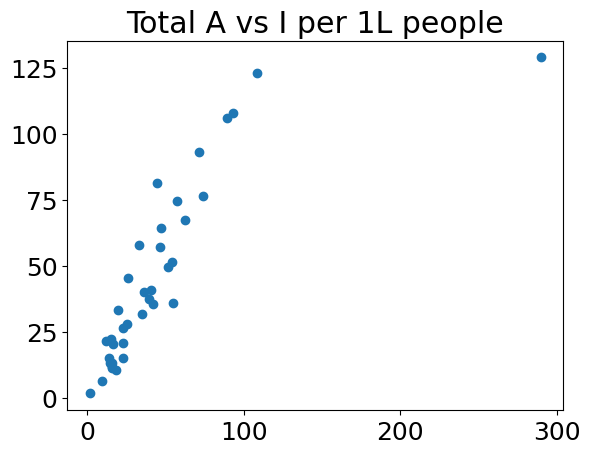

In [124]:
plt.scatter(df6['Sum Total Road Accidents - 2014 per 1L people'],df6['Sum Total Number of Persons Injured - 2014 per 1L people'])
plt.title("Total A vs I per 1L people")
plt.show()

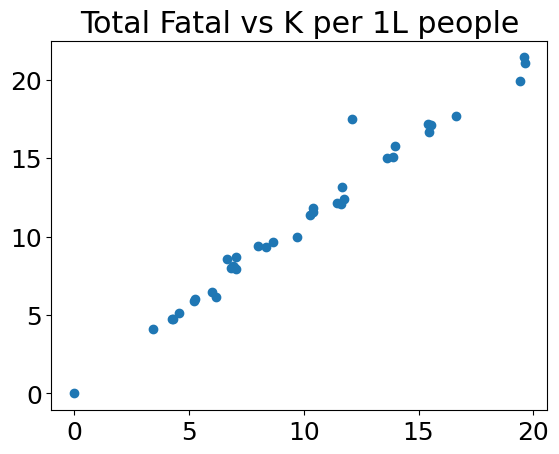

In [125]:
plt.scatter(df6['Sum Total Fatal Road Accidents - 2014 per 1L people'],df6['Sum Total Number of Persons Killed - 2014 per 1L people'])
plt.title("Total Fatal vs K per 1L people")
plt.show()

# DF7 -
#This dataset tells how many accidents happen according to the time of occurence in different states.

#df7 = timeOfOccurence.csv

In [126]:
df7 = pd.read_excel(r"C:\Users\Prathamesh\Downloads\Databases-20231228T062726Z-001\Databases\timeOfOccurence.xls")
df7.info()

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   S. No.                       37 non-null     object
 1   States/Uts                   37 non-null     object
 2   06-900hrs - Day - 2014       37 non-null     int64 
 3   09-1200hrs - Day - 2014      37 non-null     int64 
 4   12-1500hrs - Day - 2014      37 non-null     int64 
 5   15-1800hrs - Day - 2014      37 non-null     int64 
 6   18-2100hrs - Night - 2014    37 non-null     int64 
 7   21-2400hrs - Night - 2014    37 non-null     int64 
 8   00-300hrs - Night - 2014     37 non-null     int64 
 9   03-600hrs - Night - 2014     37 non-null     int64 
 10  Total Accidents - 2014       37 non-null     int64 
 11  06-900hrs - (Day) - 2016     37 non-null     int64 
 12  09-1200hrs - (Day) - 

In [127]:
df7.head(2)

S. No.         States/Uts  06-900hrs - Day - 2014  09-1200hrs - Day - 2014  \
0      1     Andhra Pradesh                    2548                     3448   
1      2  Arunachal Pradesh                      43                       30   

   12-1500hrs - Day - 2014  15-1800hrs - Day - 2014  \
0                     3491                     3606   
1                       28                       20   

   18-2100hrs - Night - 2014  21-2400hrs - Night - 2014  \
0                       4058                       2989   
1                         16                         23   

   00-300hrs - Night - 2014  03-600hrs - Night - 2014  Total Accidents - 2014  \
0                      2031                      2269                   24440   
1                        19                        26                     205   

   06-900hrs - (Day) - 2016  09-1200hrs - (Day) - 2016  \
0                      2707                       3516   
1                        50                         37   

   12-1500hrs - (Day) - 2016  15-1800hrs - (Day) - 2016  \
0                       3617                       4348   
1                         33                         38   

   18-2100hrs - (Night) - 2016  21-2400hrs - (Night) - 2016  \
0                         4742                         2774   
1                           25                           20   

   00-300hrs - (Night) - 2016  03-600hrs - (Night) - 2016  \
0                        1461                        1723   
1                          19                          27   

   Total Accidents - 2016  
0                   24888  
1                     249

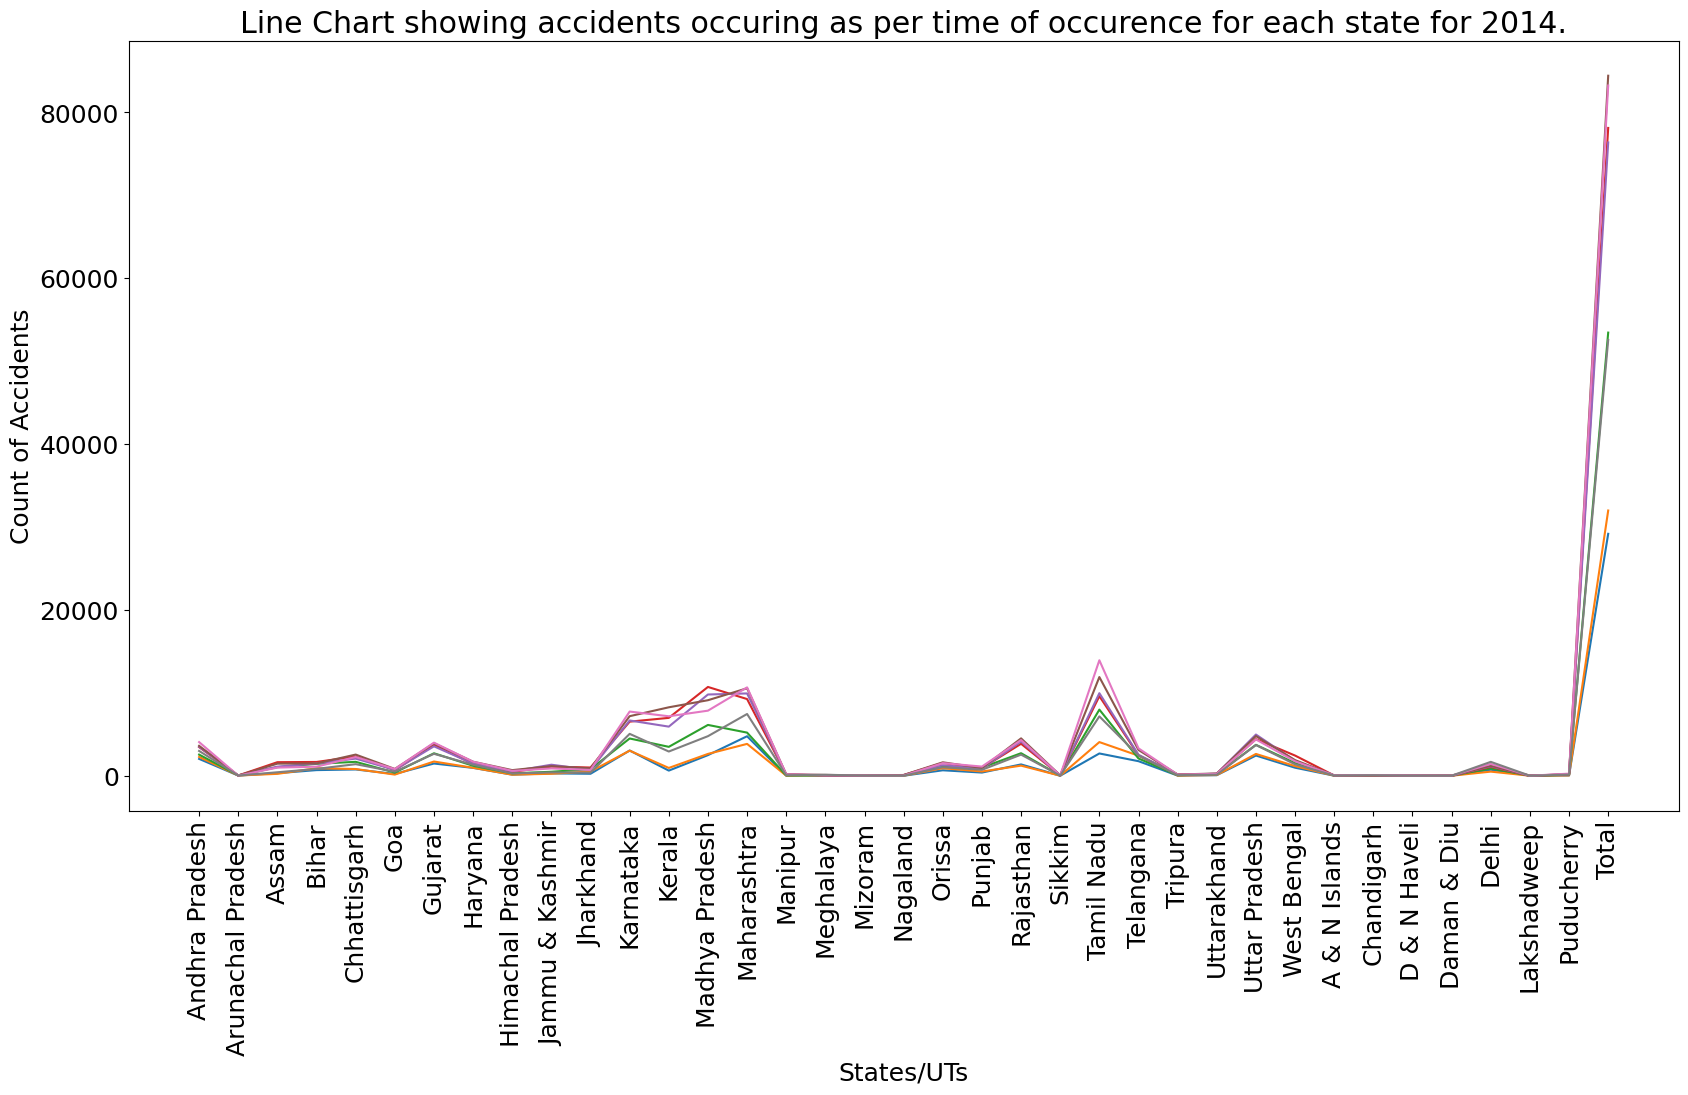

In [130]:
plt.rcParams.update=({'font.size'  : 18})
plt.figure(figsize = (20,10))

plt.plot(df7['States/Uts'], df7['00-300hrs - Night - 2014'] )
plt.plot(df7['03-600hrs - Night - 2014'])
plt.plot(df7['06-900hrs - Day - 2014'])
plt.plot(df7['09-1200hrs - Day - 2014'])
plt.plot(df7['12-1500hrs - Day - 2014'])
plt.plot(df7['15-1800hrs - Day - 2014'])
plt.plot(df7['18-2100hrs - Night - 2014'])
plt.plot(df7['21-2400hrs - Night - 2014'])

plt.title("Line Chart showing accidents occuring as per time of occurence for each state for 2014.")
plt.xlabel("States/UTs")
plt.ylabel("Count of Accidents")
plt.xticks(rotation = 90)
plt.show()

In [131]:
dayTime2014 = df7['03-600hrs - Night - 2014']+ df7['06-900hrs - Day - 2014'] + \
              df7['09-1200hrs - Day - 2014']+df7['12-1500hrs - Day - 2014']+df7['15-1800hrs - Day - 2014']
nightTime2014 = df7['00-300hrs - Night - 2014'] + df7['18-2100hrs - Night - 2014']+df7['21-2400hrs - Night - 2014']

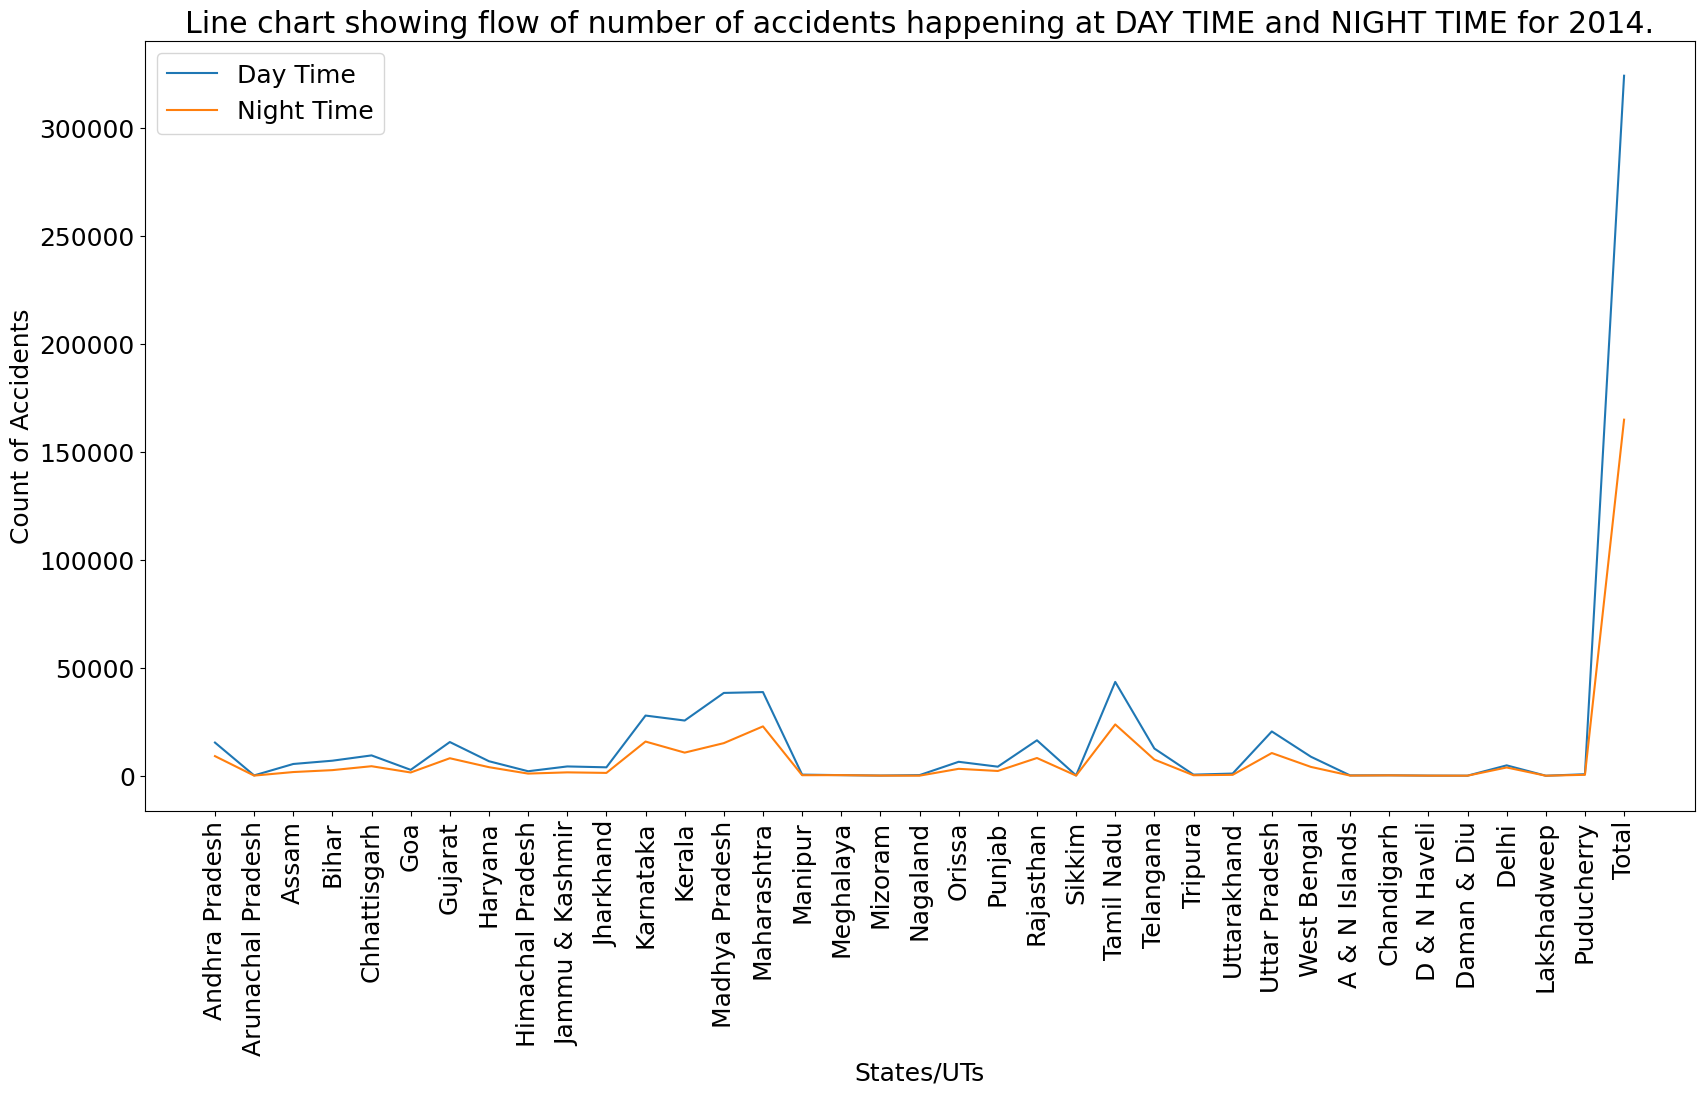

In [132]:
plt.rcParams.update = ({'font.size'  : 18})
plt.figure(figsize = (20,10))

plt.plot(df7['States/Uts'], dayTime2014, label = 'Day Time')
plt.plot(nightTime2014, label = 'Night Time')

plt.title("Line chart showing flow of number of accidents happening at DAY TIME and NIGHT TIME for 2014.")
plt.xlabel("States/UTs")
plt.ylabel("Count of Accidents")
plt.xticks(rotation = 90)
plt.legend( loc = 'best')
plt.show()

In [133]:
dayTime2016 = df7['03-600hrs - (Night) - 2016']+ df7['06-900hrs - (Day) - 2016'] + \
              df7['09-1200hrs - (Day) - 2016']+df7['12-1500hrs - (Day) - 2016']+df7['15-1800hrs - (Day) - 2016']
nightTime2016 = df7['00-300hrs - (Night) - 2016'] + df7['18-2100hrs - (Night) - 2016']+df7['21-2400hrs - (Night) - 2016']

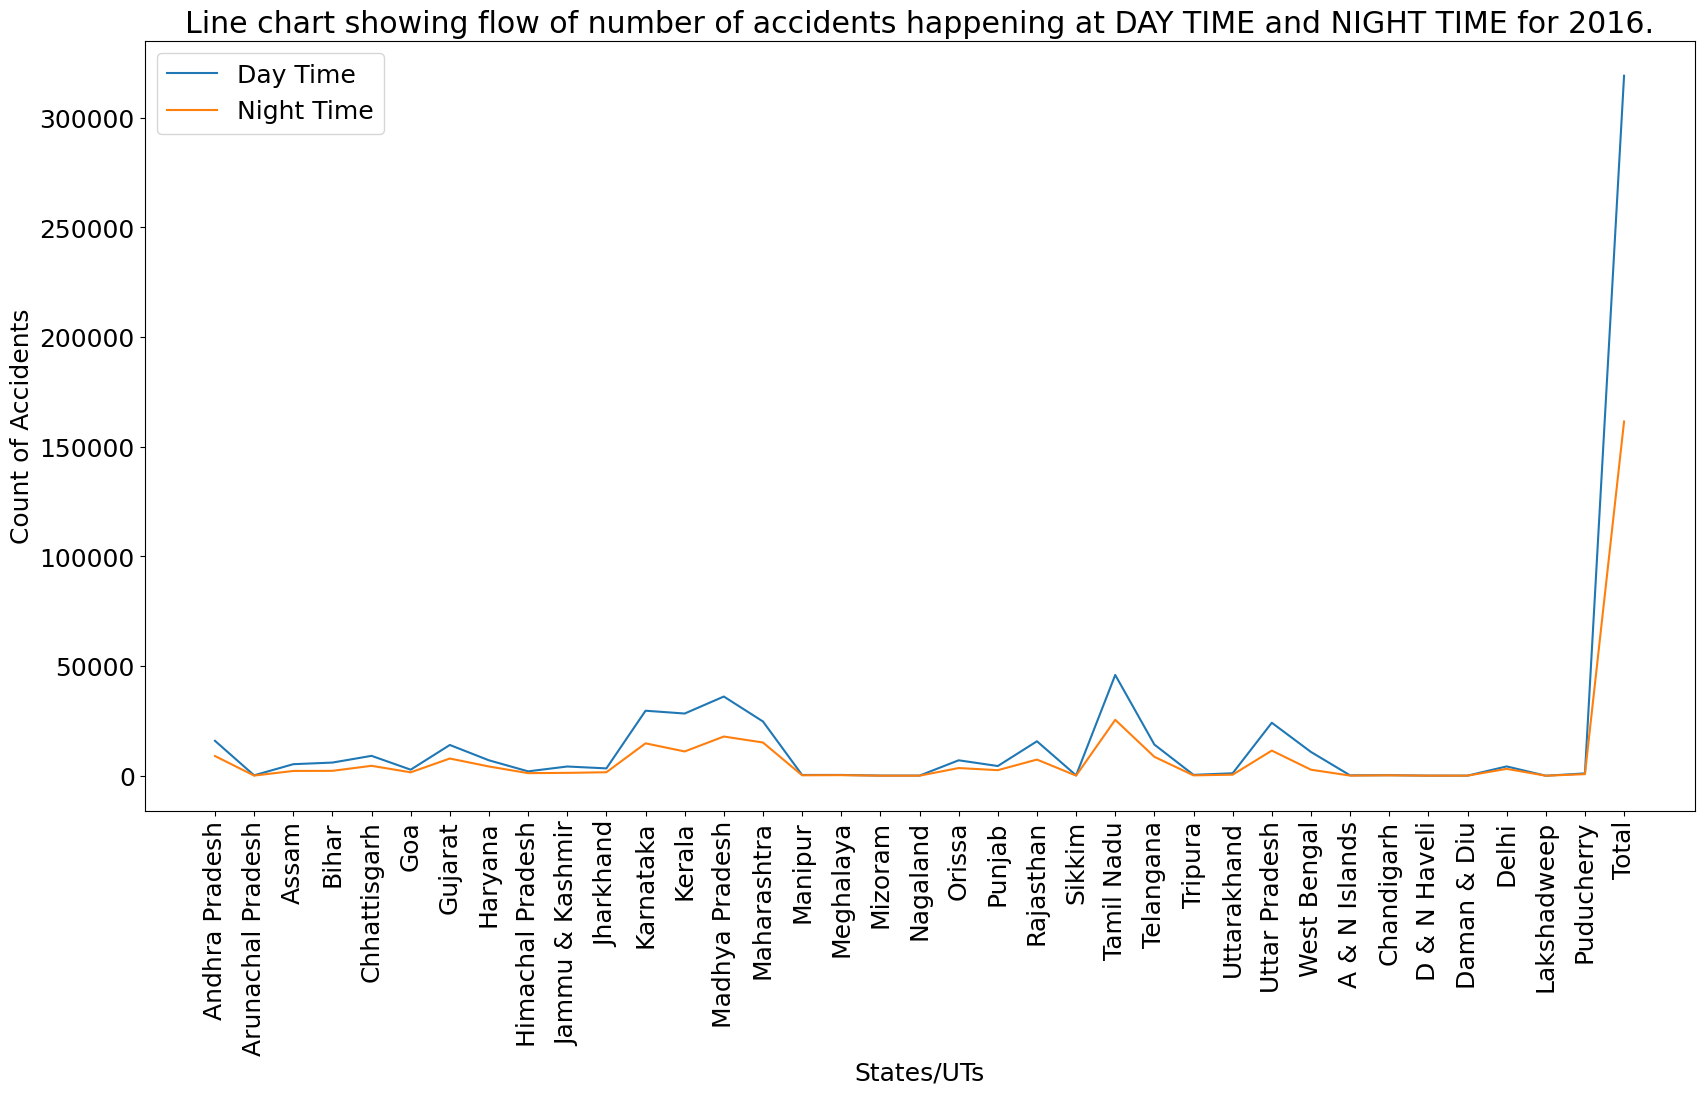

In [134]:
plt.rcParams.update = ({'font.size'  : 18})
plt.figure(figsize = (20,10))

plt.plot(df7['States/Uts'], dayTime2016, label = 'Day Time')
plt.plot(nightTime2016, label = 'Night Time')

plt.title("Line chart showing flow of number of accidents happening at DAY TIME and NIGHT TIME for 2016.")
plt.xlabel("States/UTs")
plt.ylabel("Count of Accidents")
plt.xticks(rotation = 90)
plt.legend( loc = 'best')
plt.show()

Number of Accidents happening in DAY and NIGHT TIME for 2014 and 2016

In [139]:
# see the little diference in both graph

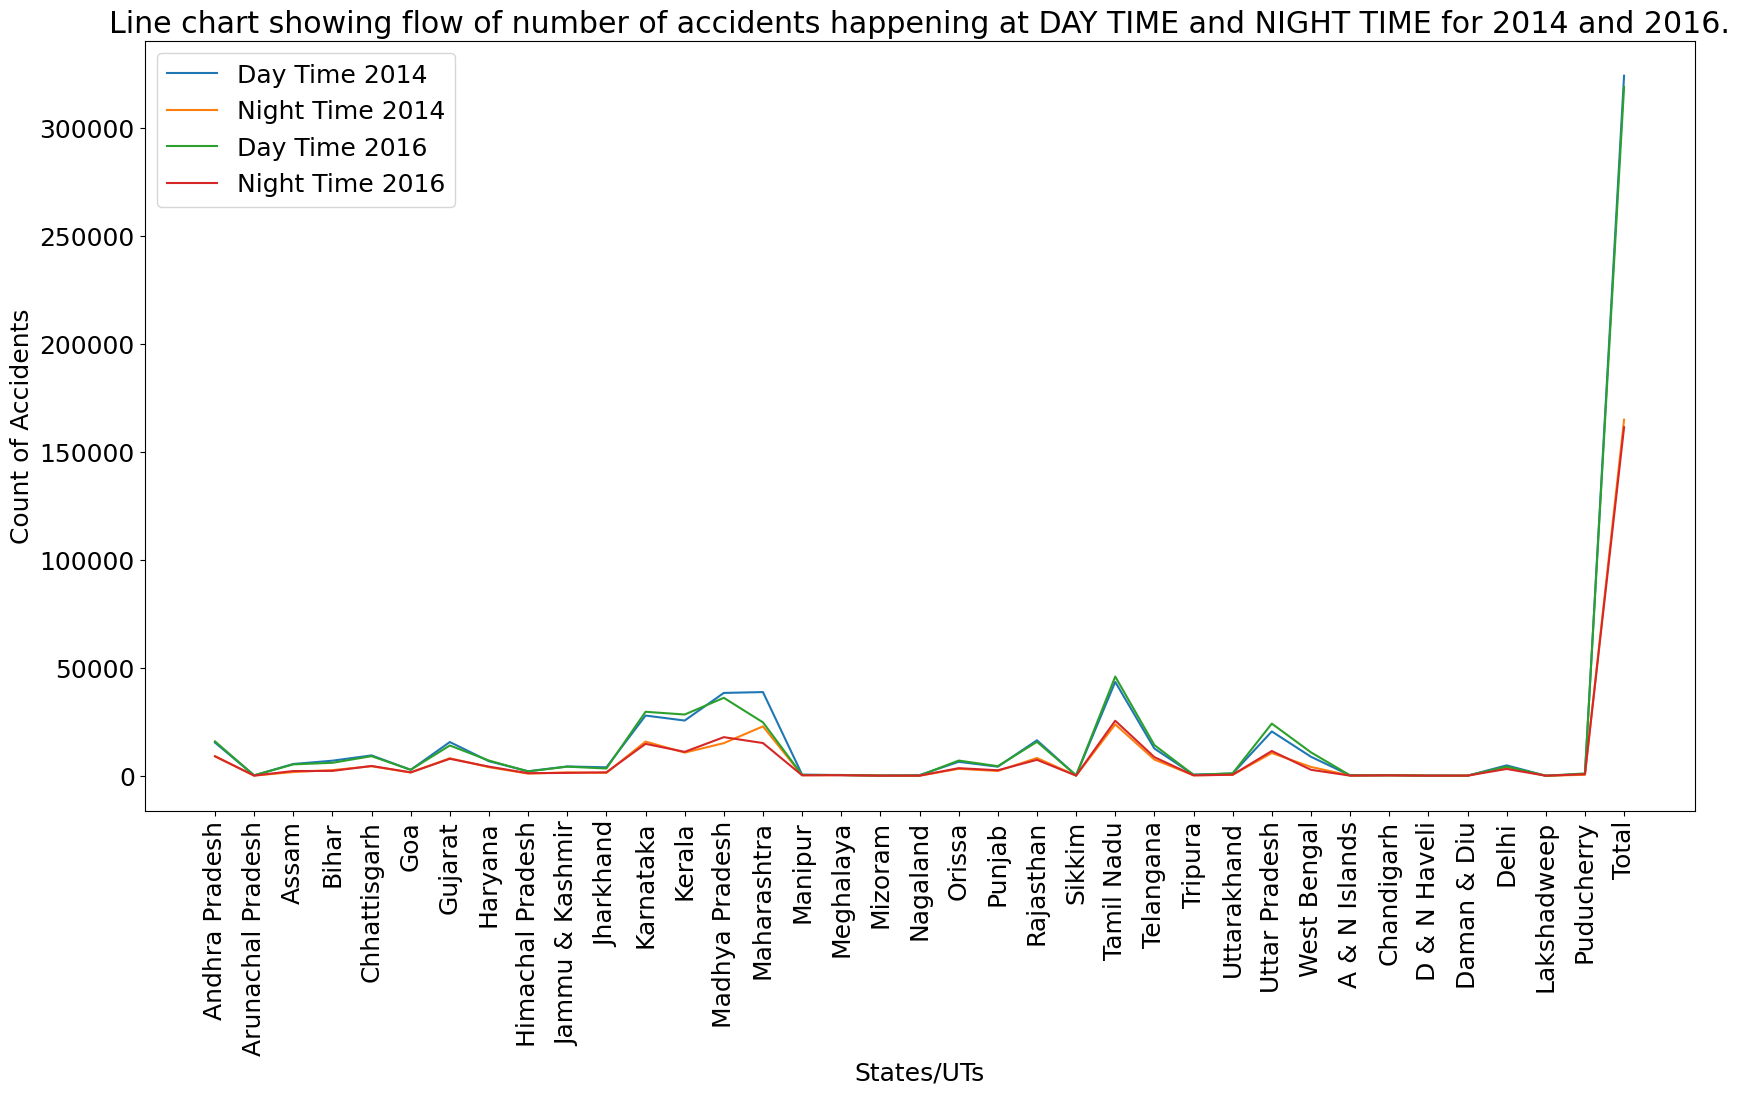

In [135]:
plt.rcParams.update = ({'font.size'  : 18})
plt.figure(figsize = (20,10))

plt.plot(df7['States/Uts'], dayTime2014, label = 'Day Time 2014')
plt.plot(nightTime2014, label = 'Night Time 2014')
plt.plot(dayTime2016, label = 'Day Time 2016')
plt.plot(nightTime2016, label = 'Night Time 2016')

plt.title("Line chart showing flow of number of accidents happening at DAY TIME and NIGHT TIME for 2014 and 2016.")
plt.xlabel("States/UTs")
plt.ylabel("Count of Accidents")
plt.xticks(rotation = 90)
plt.legend( loc = 'best')
plt.show()

In [ ]:
# see the little diference in both graph

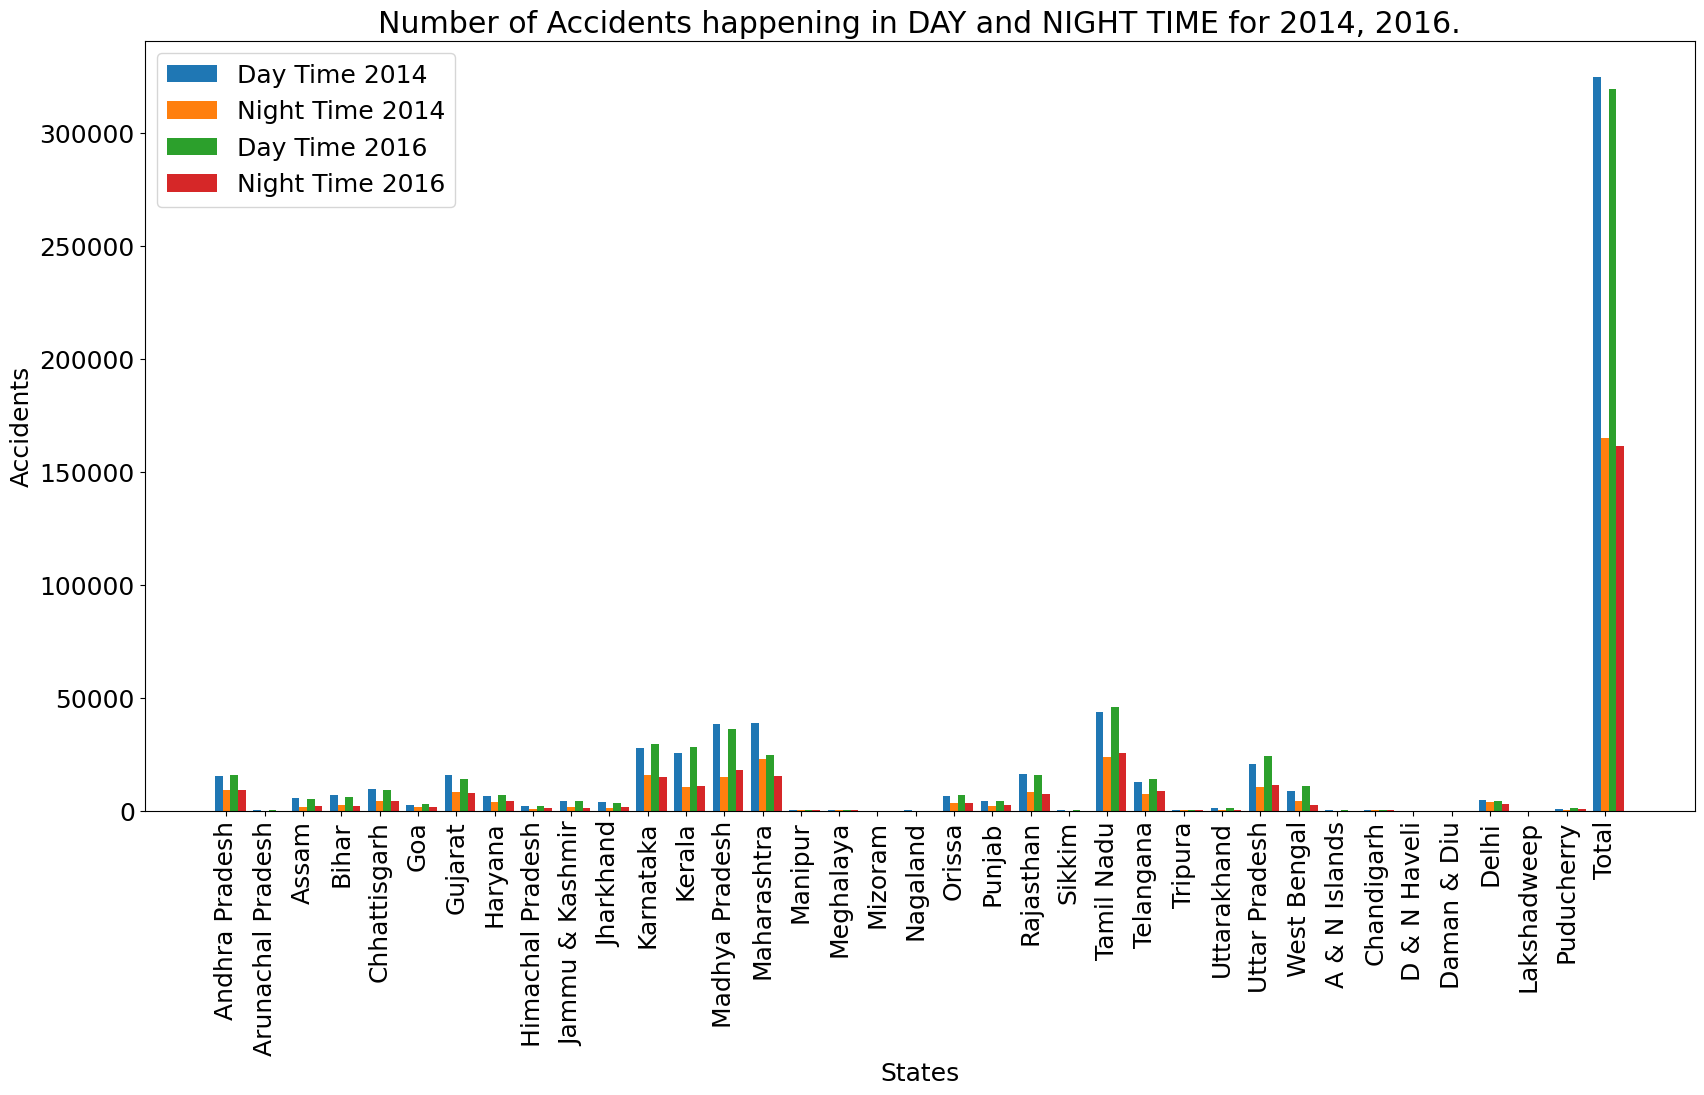

In [138]:
plt.rcParams.update = ({'font.size'  : 18})
plt.figure(figsize = (20,10))
UT = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37])

plt.bar(UT-0.2, dayTime2014, width = 0.2,label = 'Day Time 2014')
plt.bar(UT, nightTime2014, width = 0.2, label = 'Night Time 2014')
plt.bar(UT+0.2, dayTime2016, width = 0.2, label = 'Day Time 2016')
plt.bar(UT+0.4, nightTime2016, width = 0.2, label = 'Night Time 2016')

plt.xlabel("States")
plt.ylabel("Accidents")
plt.legend(loc = 'best')
plt.title("Number of Accidents happening in DAY and NIGHT TIME for 2014, 2016.")
plt.xticks(UT, df7['States/Uts'], rotation=90)
plt.show()